# CBA Paper

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Part 1: Data Exploration and Research Questions

In [6]:
df = pd.read_csv('sleep.csv')
df.head()

ID  Age  Gender              Bedtime          Wakeup time  Sleep duration  \
0   1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00             6.0   
1   2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00             7.0   
2   3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00             8.0   
3   4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00             6.0   
4   5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00             8.0   

   Sleep efficiency  REM sleep percentage  Deep sleep percentage  \
0              0.88                    18                     70   
1              0.66                    19                     28   
2              0.89                    20                     70   
3              0.51                    23                     25   
4              0.76                    27                     55   

   Light sleep percentage  Awakenings  Caffeine consumption  \
0                      12           0                     0   
1                      53           3                     0   
2                      10           1                     0   
3                      52           3                    50   
4                      18           3                     0   

   Alcohol consumption Smoking status  Exercise frequency  Daily Steps  
0                    0            Yes                   3         3400  
1                    3            Yes                   3         6400  
2                    0             No                   3         4800  
3                    5            Yes                   1         7800  
4                    3             No                   3         4000

In [7]:
df.describe()

ID         Age  Sleep duration  Sleep efficiency  \
count  452.000000  452.000000      452.000000        452.000000   
mean   226.500000   40.285398        7.465708          0.788916   
std    130.625419   13.172250        0.866625          0.135237   
min      1.000000    9.000000        5.000000          0.500000   
25%    113.750000   29.000000        7.000000          0.697500   
50%    226.500000   40.000000        7.500000          0.820000   
75%    339.250000   52.000000        8.000000          0.900000   
max    452.000000   69.000000       10.000000          0.990000   

       REM sleep percentage  Deep sleep percentage  Light sleep percentage  \
count            452.000000             452.000000              452.000000   
mean              22.615044              52.823009               24.561947   
std                3.525963              15.654235               15.313665   
min               15.000000              18.000000                7.000000   
25%               20.000000              48.250000               15.000000   
50%               22.000000              58.000000               18.000000   
75%               25.000000              63.000000               32.500000   
max               30.000000              75.000000               63.000000   

       Awakenings  Caffeine consumption  Alcohol consumption  \
count  452.000000            452.000000           452.000000   
mean     1.568584             22.345133             1.137168   
std      1.368698             29.848626             1.608938   
min      0.000000              0.000000             0.000000   
25%      0.000000              0.000000             0.000000   
50%      1.000000              0.000000             0.000000   
75%      3.000000             50.000000             2.000000   
max      4.000000            200.000000             5.000000   

       Exercise frequency   Daily Steps  
count          452.000000    452.000000  
mean             1.767699   6539.159292  
std              1.433375   2062.922002  
min              0.000000   3000.000000  
25%              0.000000   4700.000000  
50%              2.000000   6600.000000  
75%              3.000000   8300.000000  
max              5.000000  10000.000000

Data appears to be very clean. But we still have to pre-process it to make it more meaningful. We add some datetime features

In [8]:
time_cols = ['Bedtime', 'Wakeup time']
for c in time_cols:
    df[c] = pd.to_datetime(df[c]).dt.hour
    df[f'{c} day'] = pd.to_datetime(df[c]).dt.isocalendar().day

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    int64  
 4   Wakeup time             452 non-null    int64  
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              452 non-null    int64  
 11  Caffeine consumption    452 non-null    int64  
 12  Alcohol consumption     452 non-null    int64  
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      452 non-null    in

Data appears to be very clean. Just need to change categorical data types to the appropriate formats. The following can be seen as categorical types:
- Gender
- Bedtime
- Wakeup time
- Sleep duration
- Awakenings
- Caffeine consumption
- Alcohol consumption
- Smoking status
- Exercise frequency
- Bedtime day
- Wakeup time day

In [10]:
df.drop('ID', axis=1, inplace=True)
numerical_cols = ['Age', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
                 'Light sleep percentage', 'Daily Steps']
categorical_cols = list(set(df.columns) - set(numerical_cols))

for c in categorical_cols:
    print(df[c].value_counts())
    print()
    df[c] = df[c].astype('category')

df.info()

7.0     154
8.0     103
7.5      88
6.0      34
8.5      28
9.0      26
10.0      8
5.0       8
5.5       3
Name: Sleep duration, dtype: int64

0     110
22     83
21     73
1      67
2      64
23     55
Name: Bedtime, dtype: int64

No     298
Yes    154
Name: Smoking status, dtype: int64

0      236
50     107
25      79
75      25
200      4
100      1
Name: Caffeine consumption, dtype: int64

Male      228
Female    224
Name: Gender, dtype: int64

3    130
0    122
1     97
2     54
4     41
5      8
Name: Exercise frequency, dtype: int64

4    452
Name: Bedtime day, dtype: Int64

5     80
7     78
9     74
6     64
8     60
4     43
10    35
3     10
11     6
12     2
Name: Wakeup time, dtype: int64

0    260
1     54
3     48
2     37
5     30
4     23
Name: Alcohol consumption, dtype: int64

1    154
0    115
3     63
4     63
2     57
Name: Awakenings, dtype: int64

4    452
Name: Wakeup time day, dtype: Int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 

## Data exploration

### Explore individual variables

In [11]:
def plot_numerical_dist(df, col):
    f, ax = plt.subplots(2, 1, figsize=(12, 5), dpi=200, sharex=True, gridspec_kw={'height_ratios': [1, 3]}) 
    sns.boxplot(data=df, x=col, ax=ax[0])
    sns.histplot(data=df, x=col, kde=True, ax=ax[1])
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    plt.suptitle(f'{col} distribution\nsd: {df[col].std():.2f} iqr: {iqr:.2f}')
    plt.tight_layout()
    plt.show()
    
def plot_categorical_dist(df, col):
    f, ax = plt.subplots(figsize=(6,6))
    df[col].value_counts().sort_index().plot.bar(ax=ax)
    ax.set_title(f'{col} distribution')
    ax.set_ylabel('Count')
    plt.tight_layout()
    plt.show();

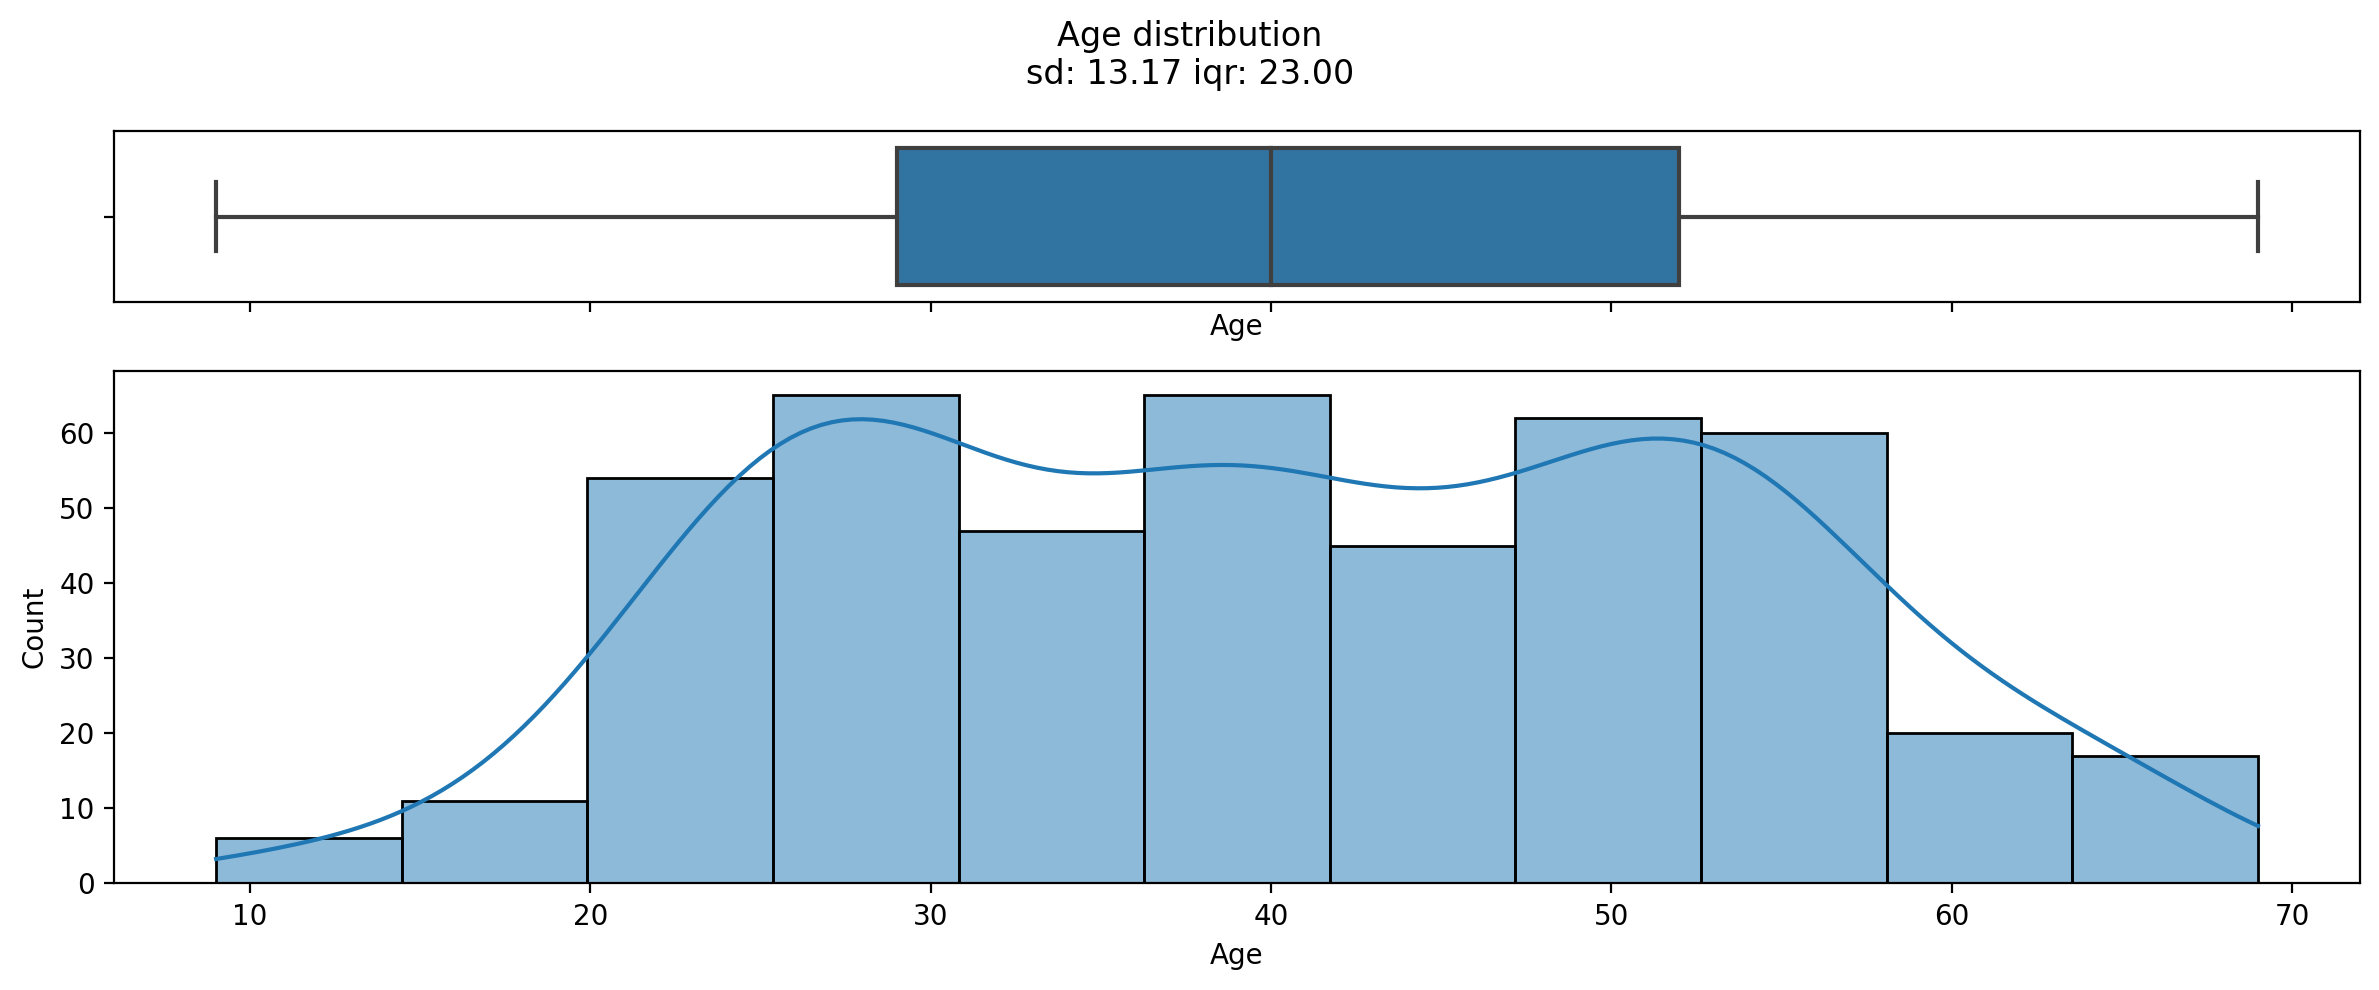

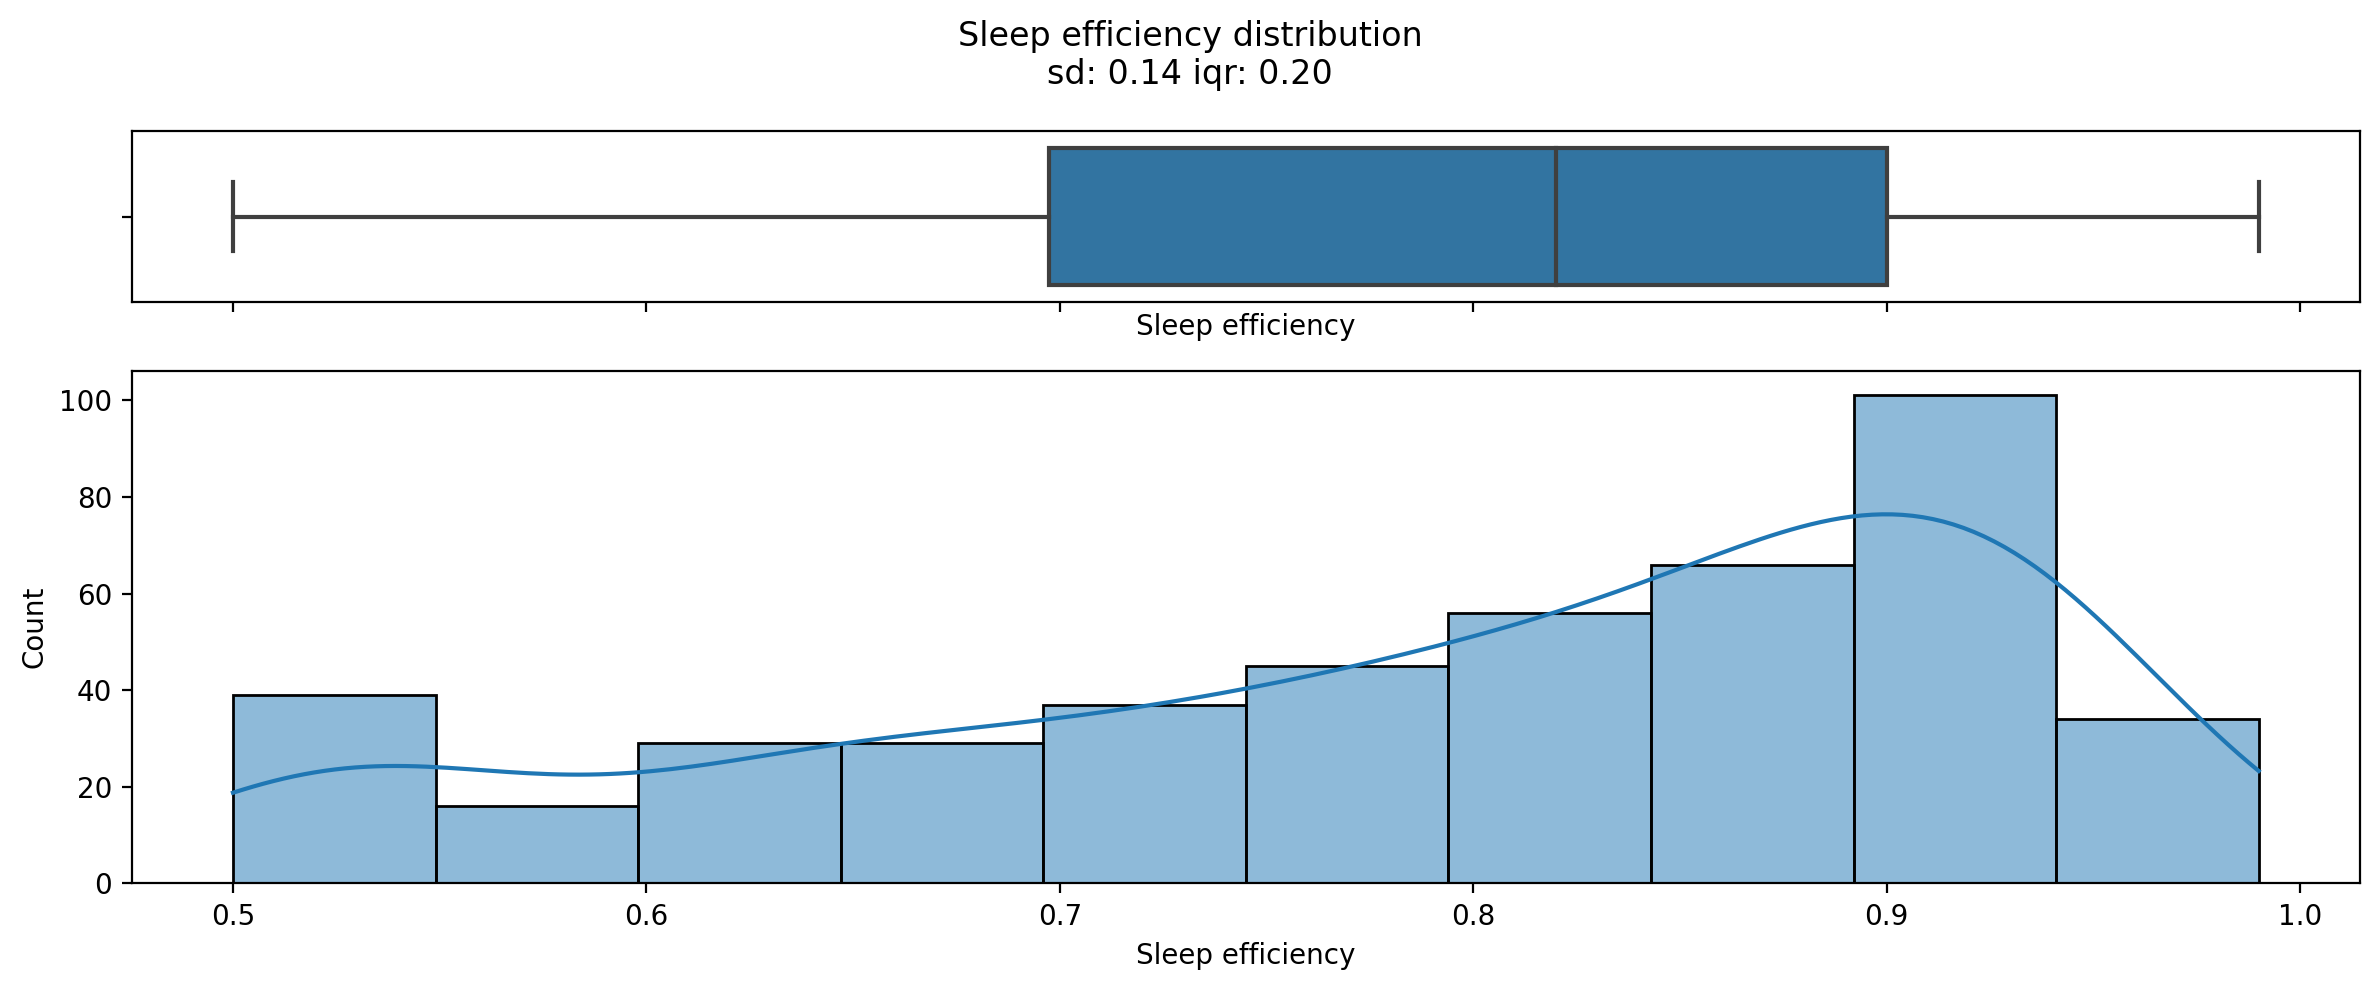

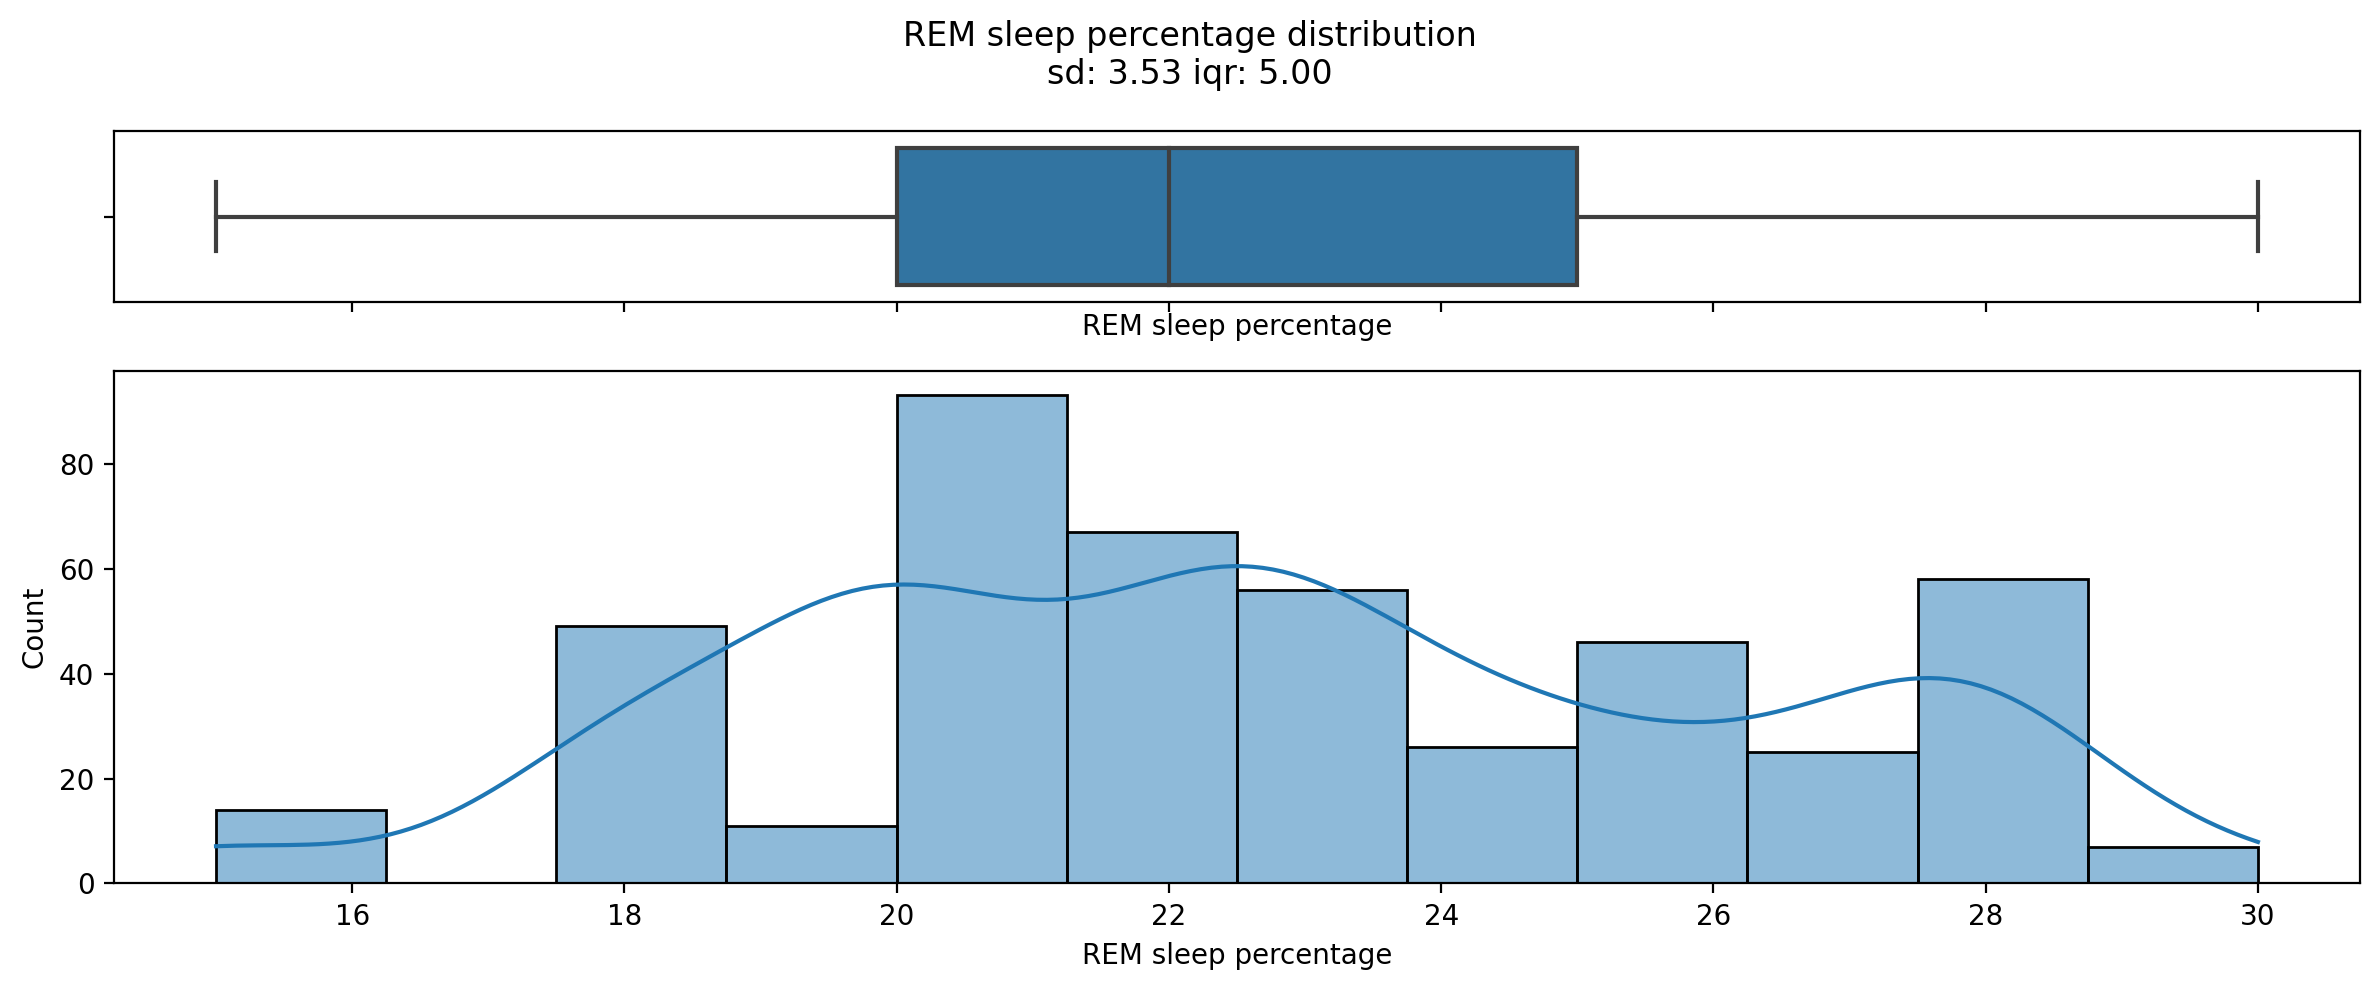

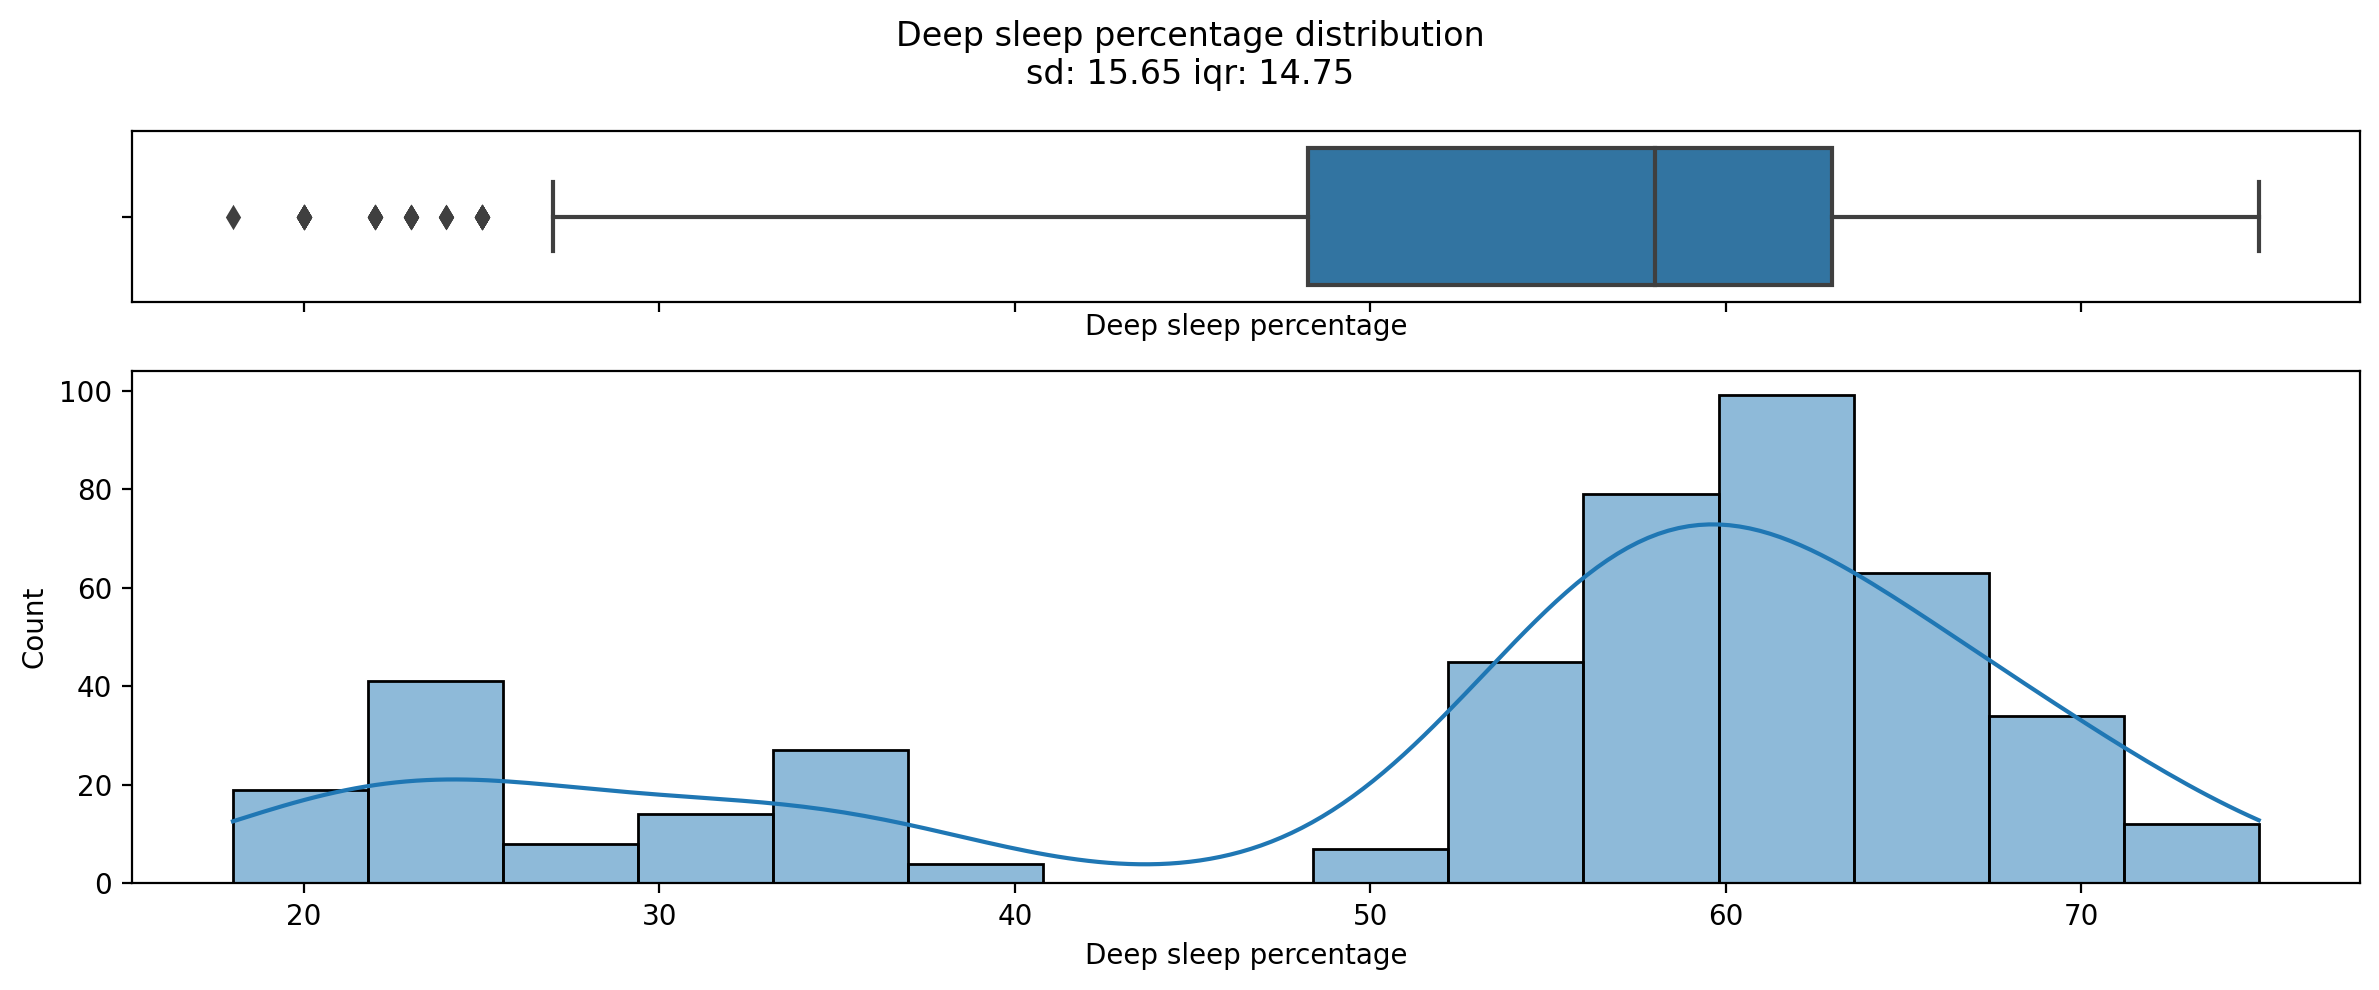

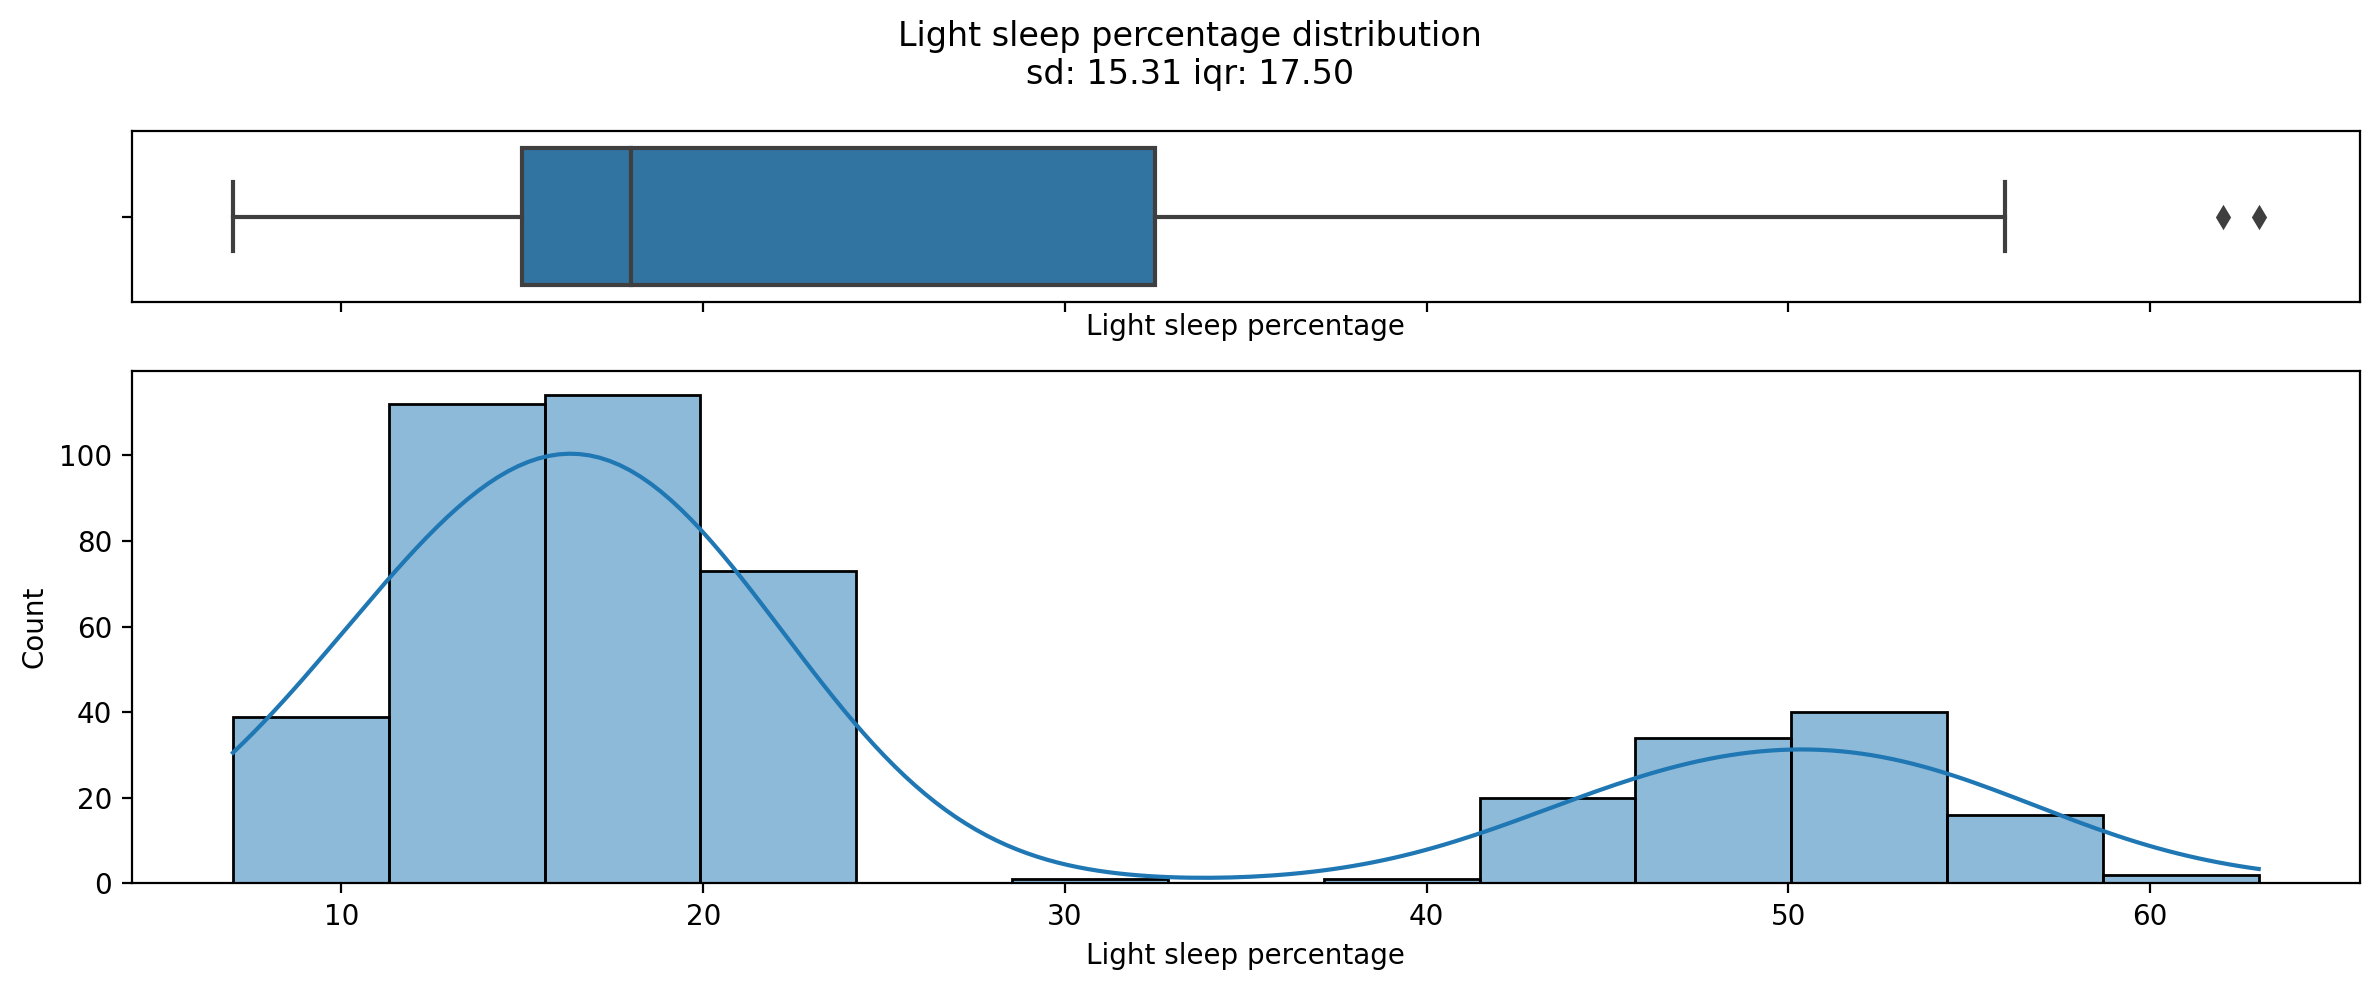

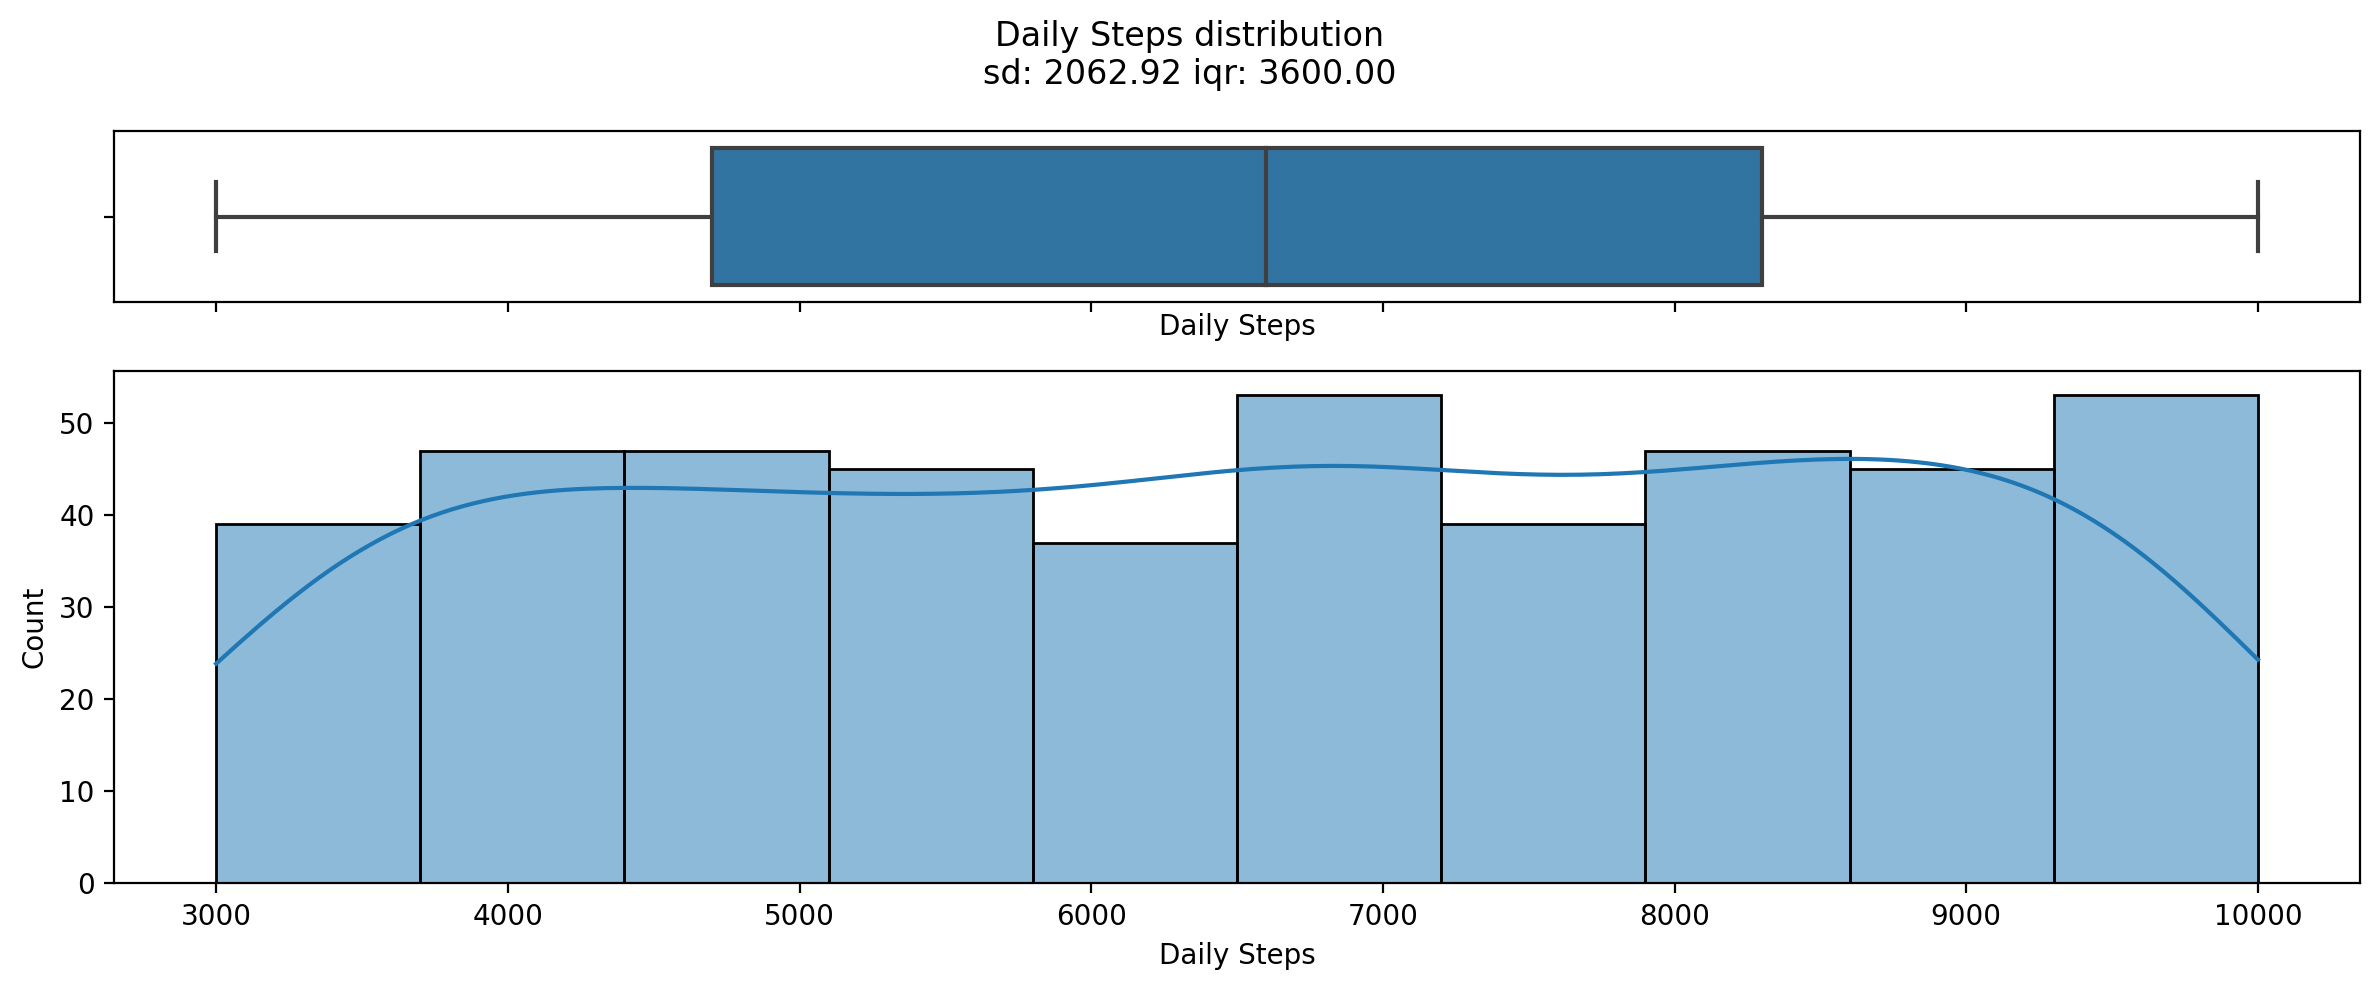

In [12]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for c in numeric_cols:
    plot_numerical_dist(df, c)

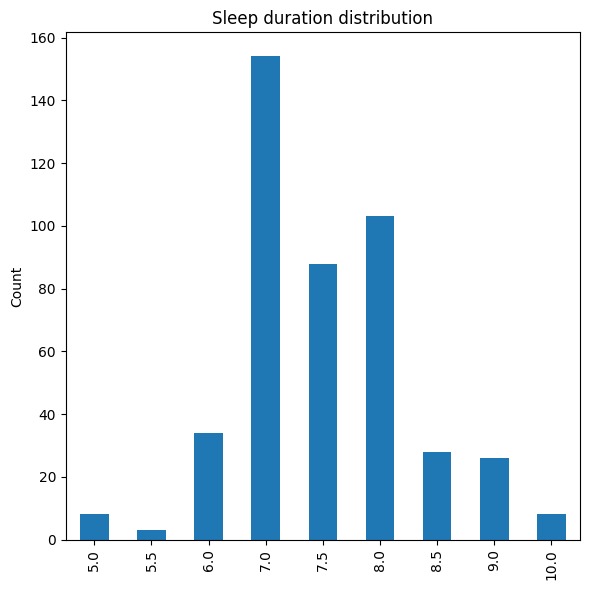

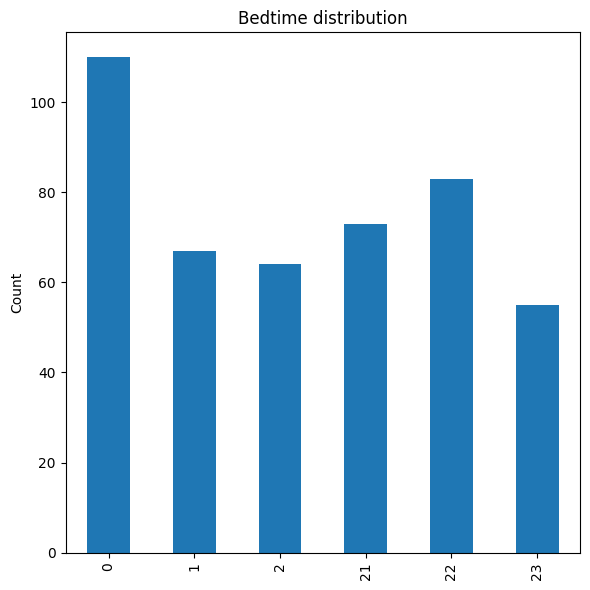

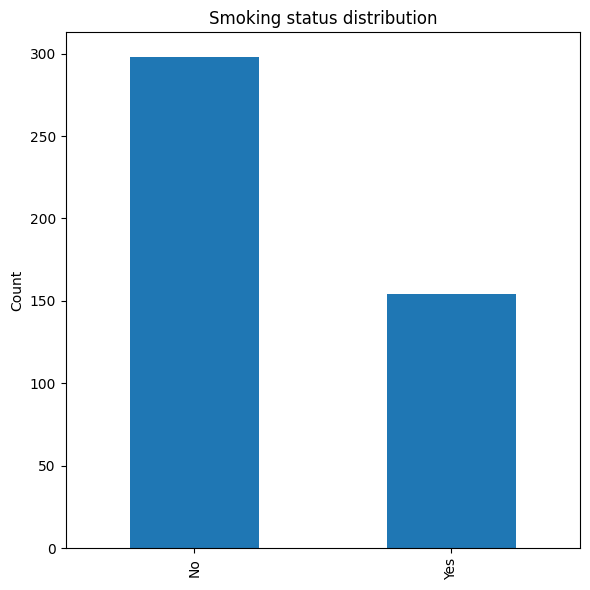

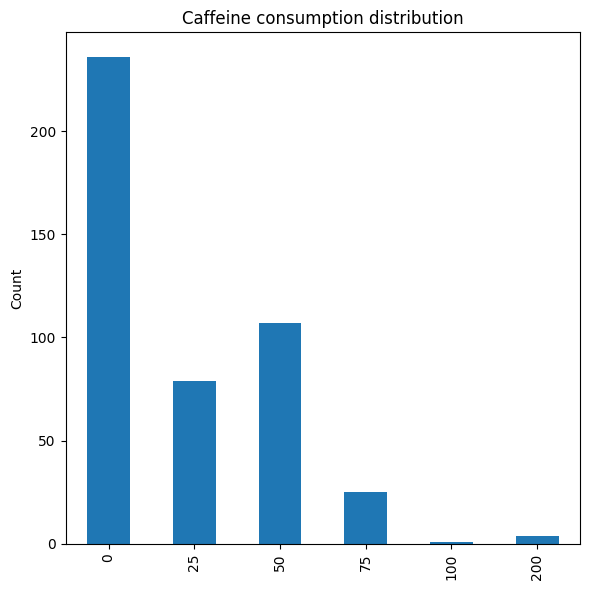

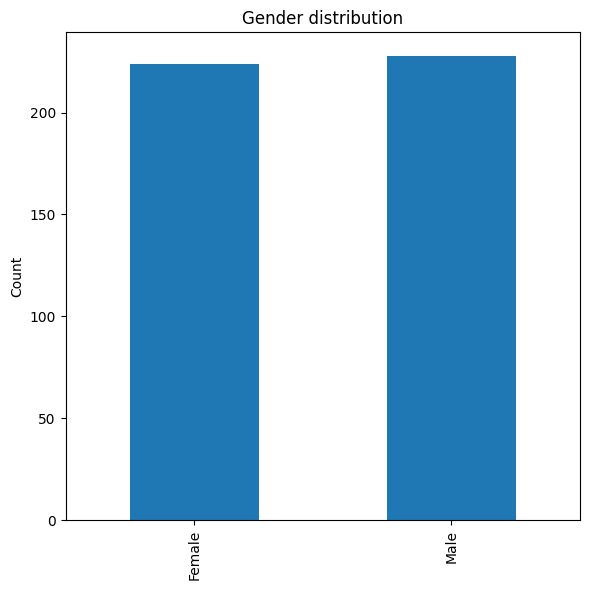

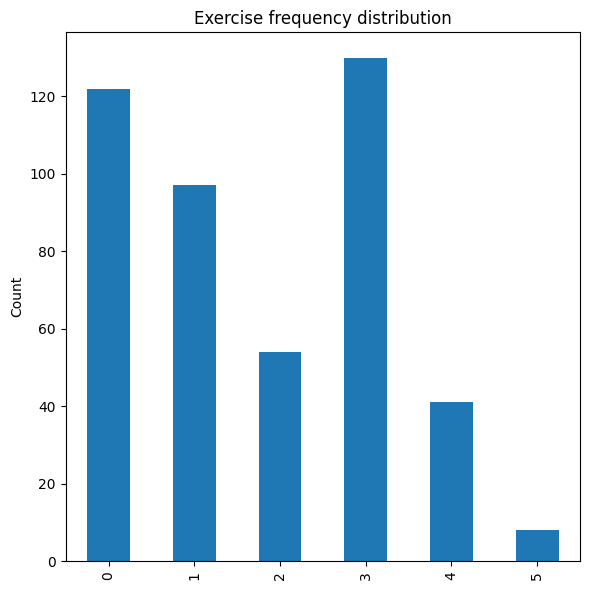

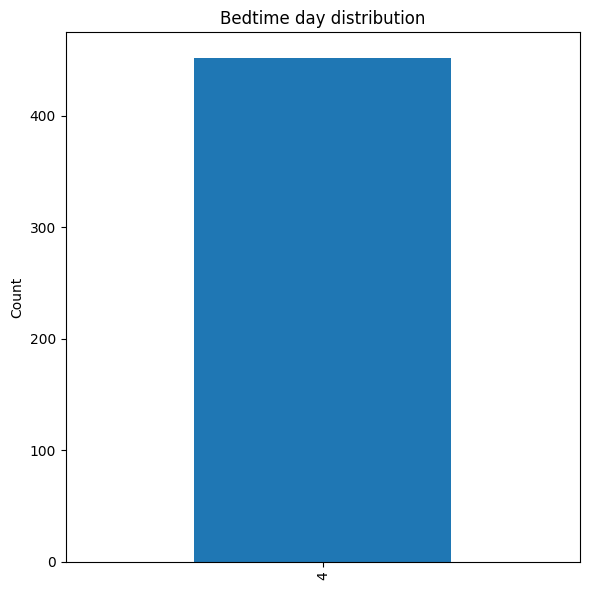

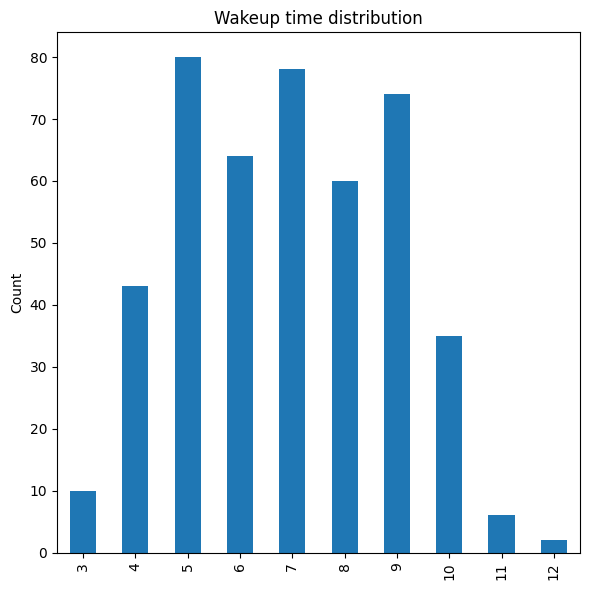

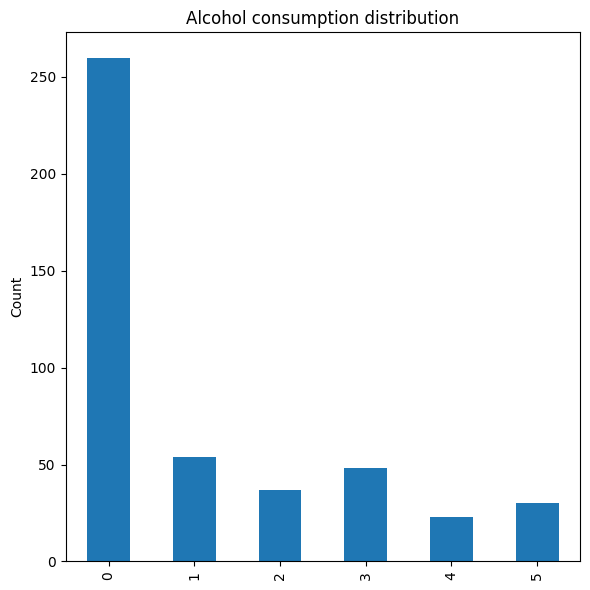

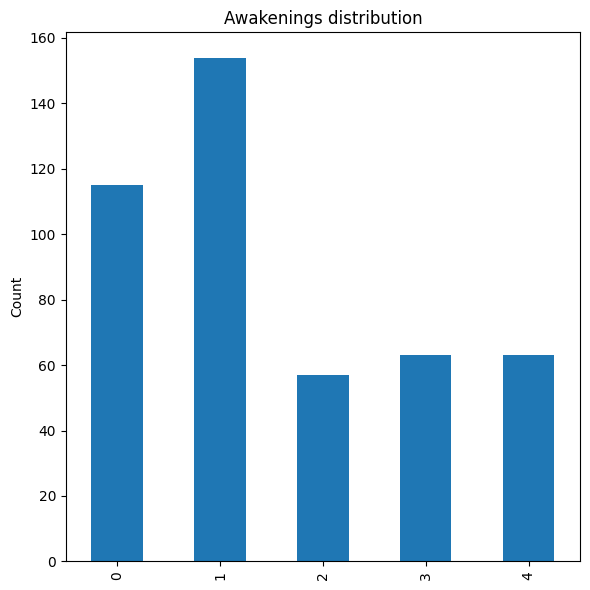

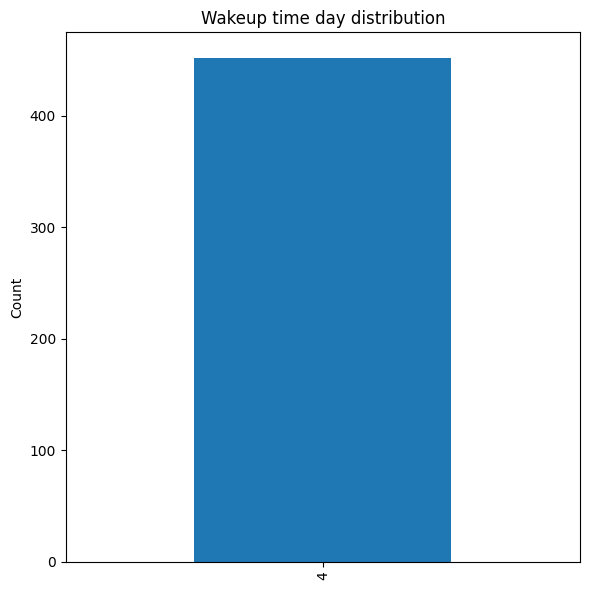

In [13]:
for c in categorical_cols:
    plot_categorical_dist(df, c)

### Inter-variable relationships

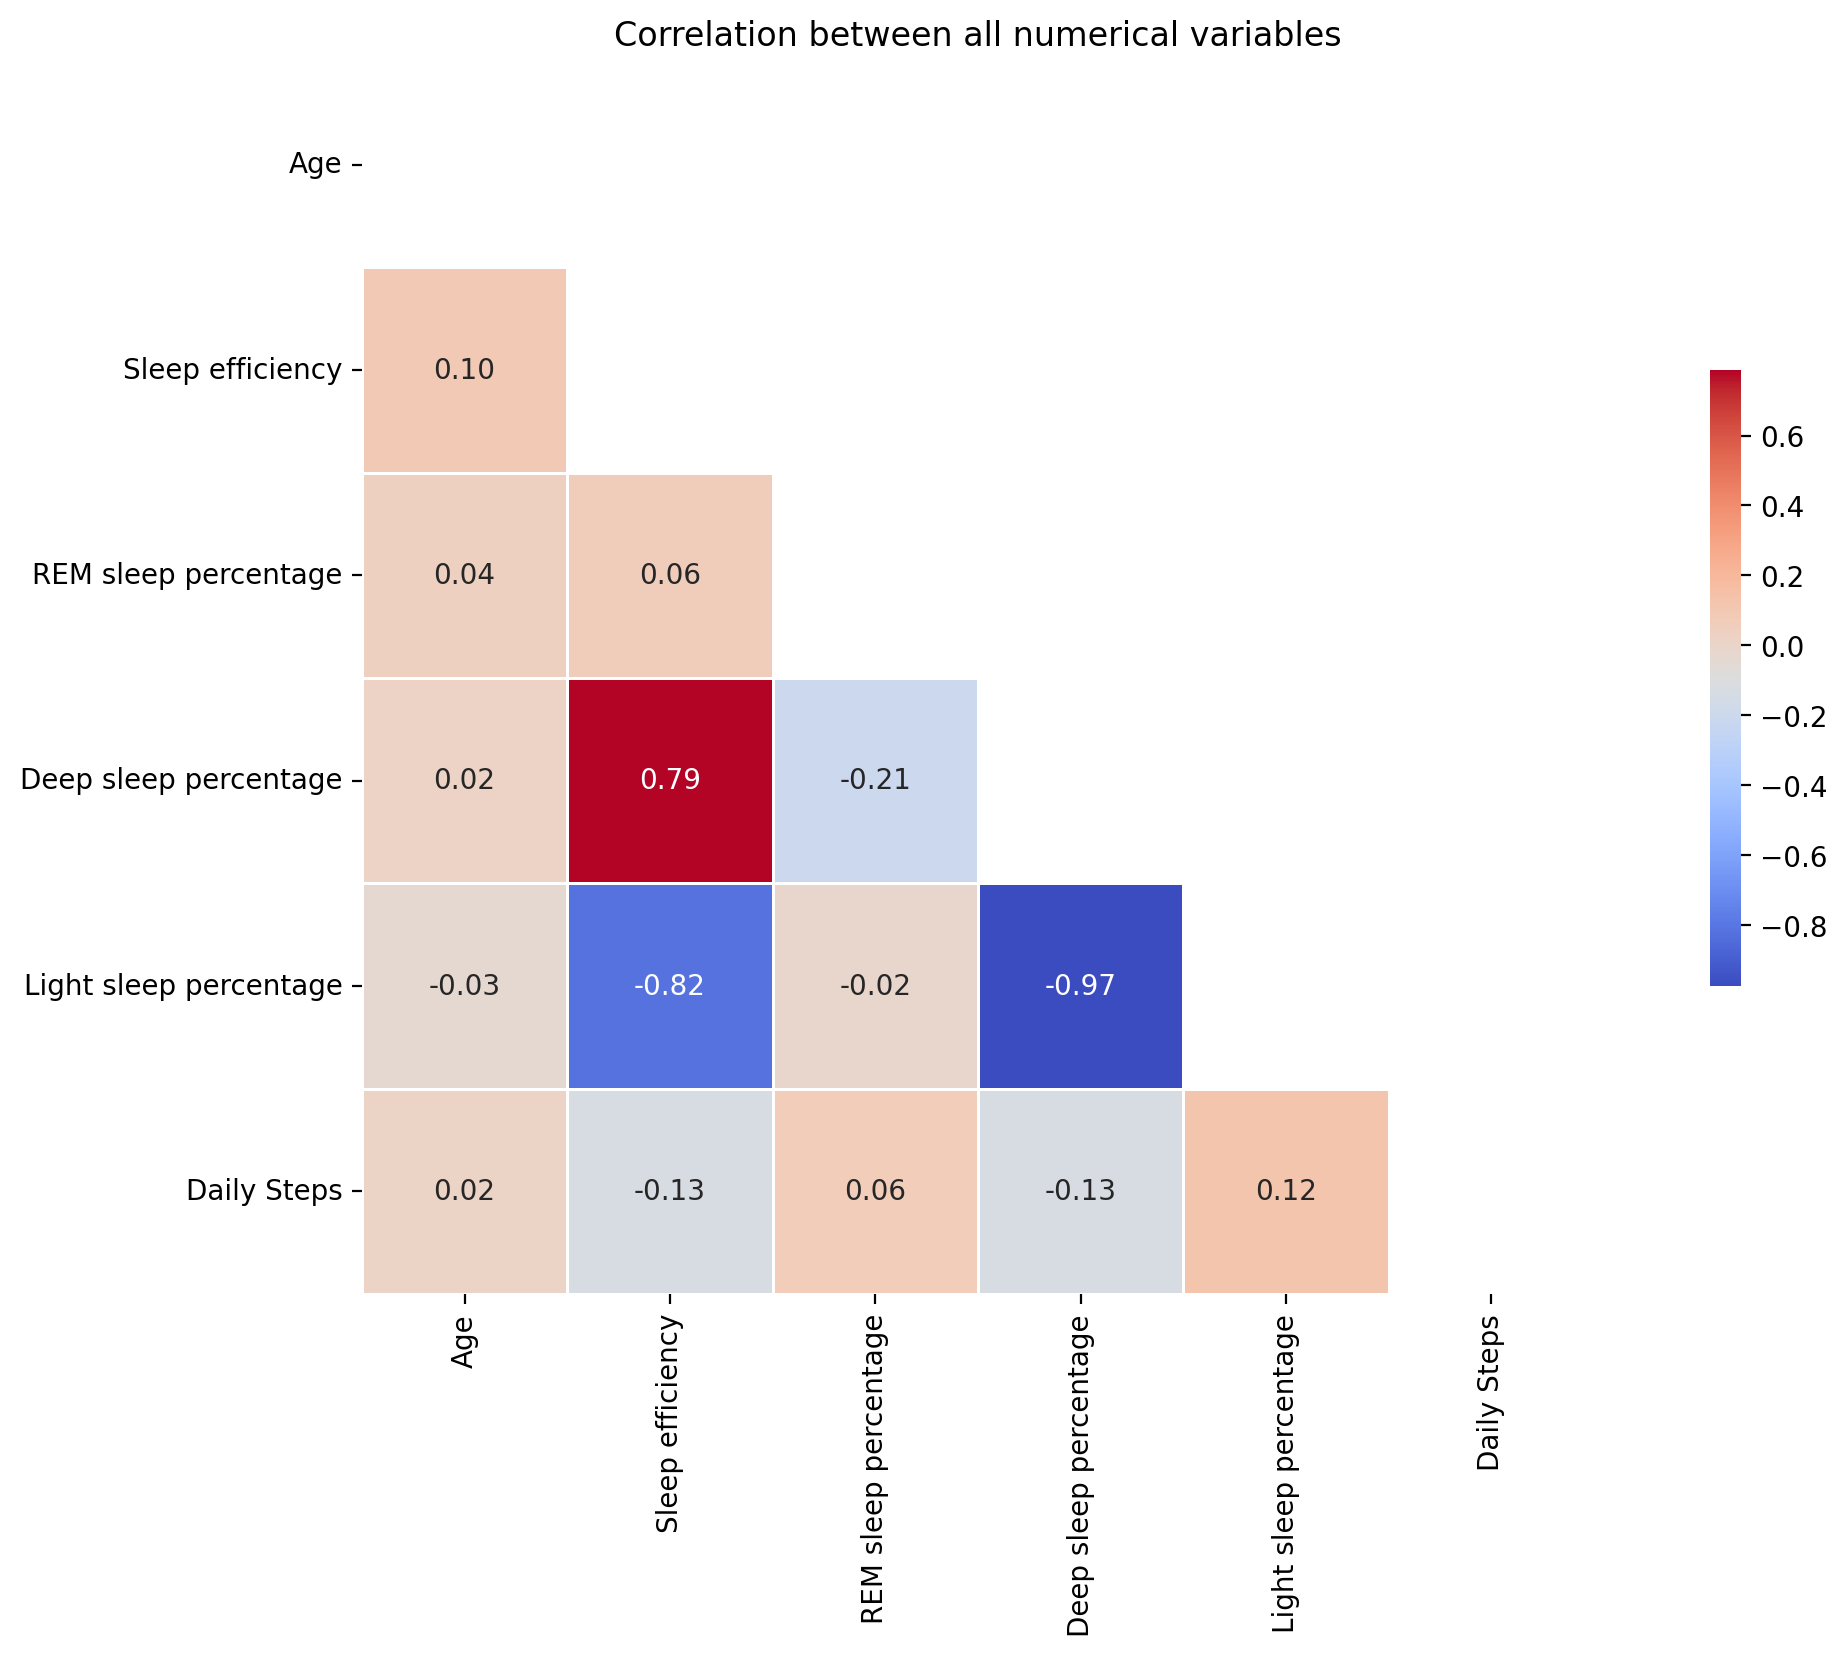

In [14]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
fig = plt.figure(figsize=(15,8), dpi=200)
corr = numerical_df.corr()
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

cmap = sns.diverging_palette(230, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation between all numerical variables')
plt.show()

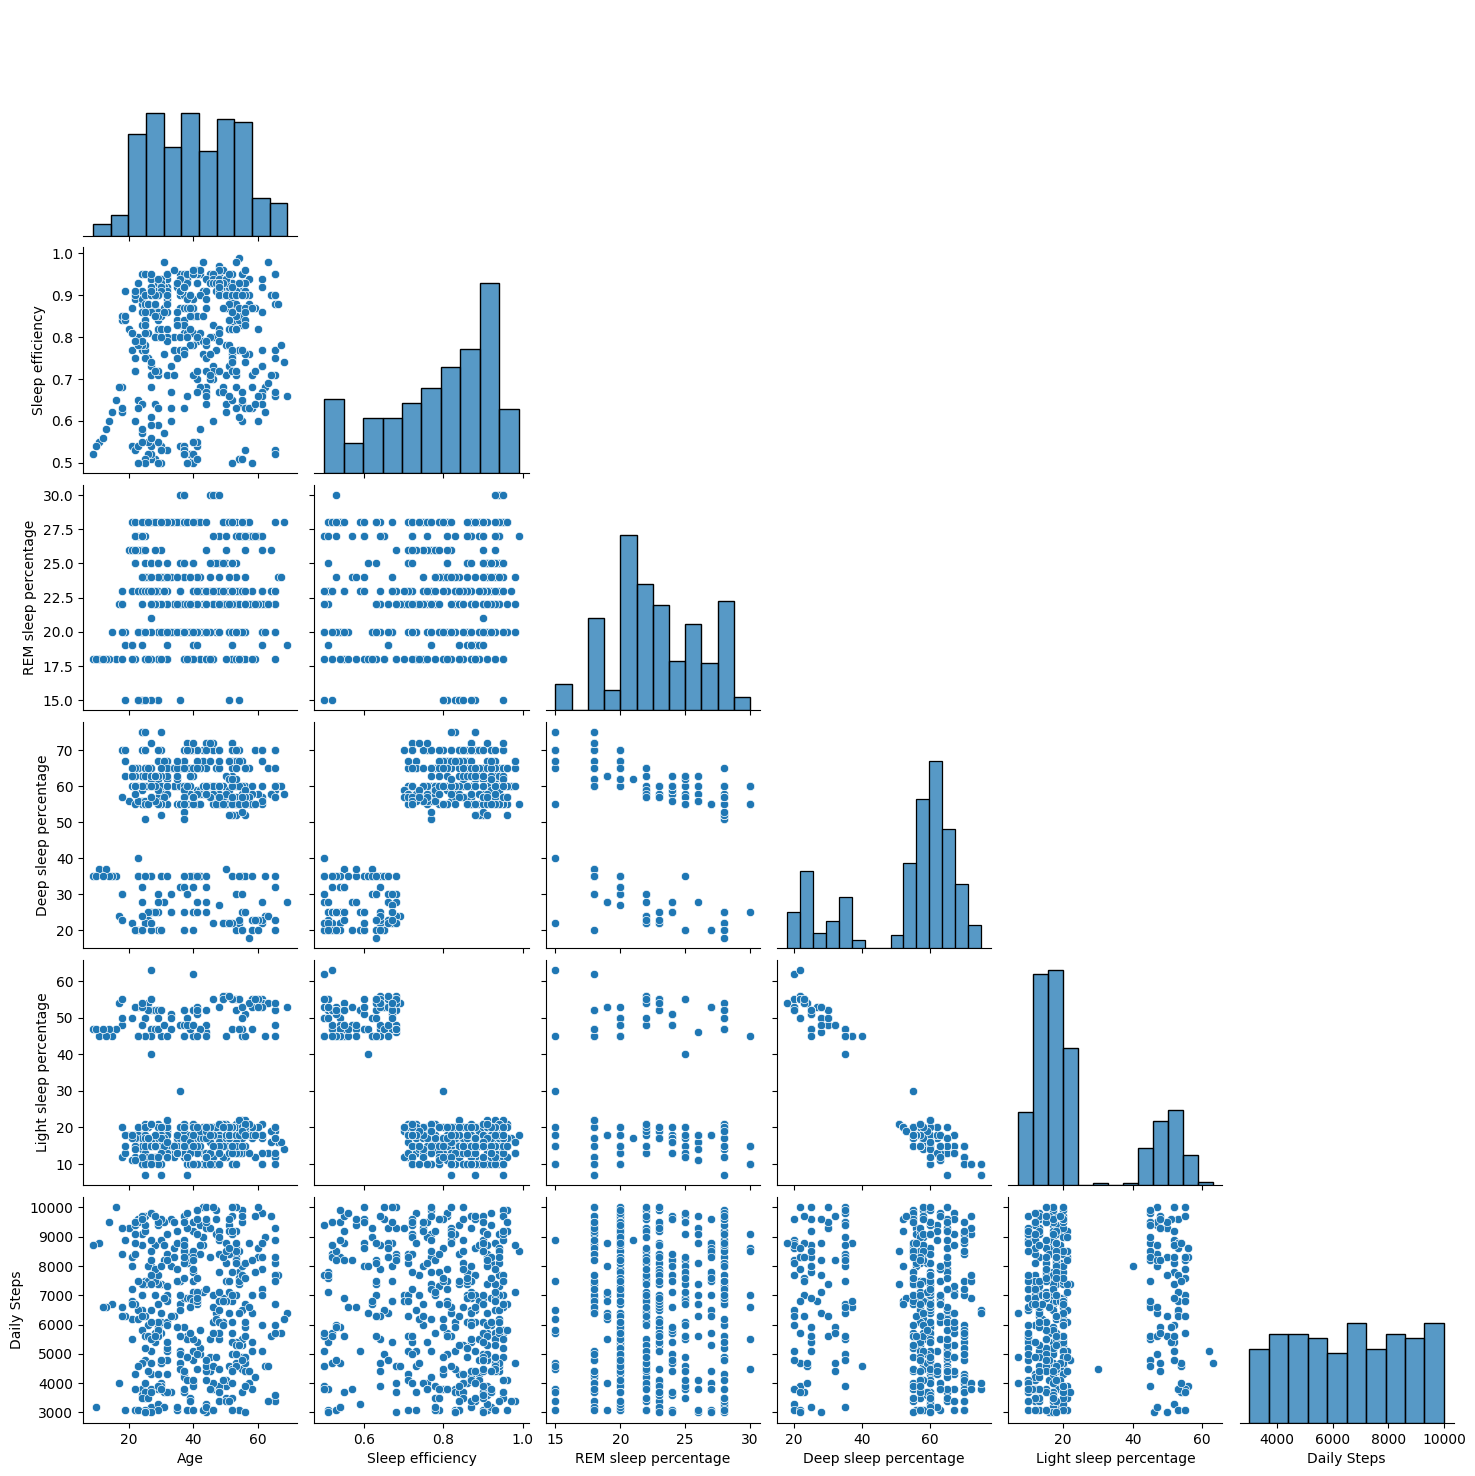

In [15]:
sns.pairplot(numerical_df, corner=True)
plt.show();

In [16]:
categorical_cols

['Sleep duration',
 'Bedtime',
 'Smoking status',
 'Caffeine consumption',
 'Gender',
 'Exercise frequency',
 'Bedtime day',
 'Wakeup time',
 'Alcohol consumption',
 'Awakenings',
 'Wakeup time day']

In [17]:
numerical_cols

['Age',
 'Sleep efficiency',
 'REM sleep percentage',
 'Deep sleep percentage',
 'Light sleep percentage',
 'Daily Steps']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     452 non-null    int64   
 1   Gender                  452 non-null    category
 2   Bedtime                 452 non-null    category
 3   Wakeup time             452 non-null    category
 4   Sleep duration          452 non-null    category
 5   Sleep efficiency        452 non-null    float64 
 6   REM sleep percentage    452 non-null    int64   
 7   Deep sleep percentage   452 non-null    int64   
 8   Light sleep percentage  452 non-null    int64   
 9   Awakenings              452 non-null    category
 10  Caffeine consumption    452 non-null    category
 11  Alcohol consumption     452 non-null    category
 12  Smoking status          452 non-null    category
 13  Exercise frequency      452 non-null    category
 14  Daily Steps             45

In [19]:
def plot_numerical_categorical(df, x, y):
    f, ax = plt.subplots(1,2, figsize=(12,5), dpi=200)
    sns.boxplot(data=df, x=x, y=y, hue='Gender', ax=ax[0])
    sns.boxplot(data=df, x=x, y=y, hue='Smoking status', ax=ax[1])
    plt.suptitle(f'{x} vs. {y} across Gender & Smoking Status')
    plt.tight_layout()
    plt.show();

In [20]:
categorical_cols.pop(categorical_cols.index('Gender'))
categorical_cols.pop(categorical_cols.index('Smoking status'))

'Smoking status'

Sleep efficiency
------------------------------------------


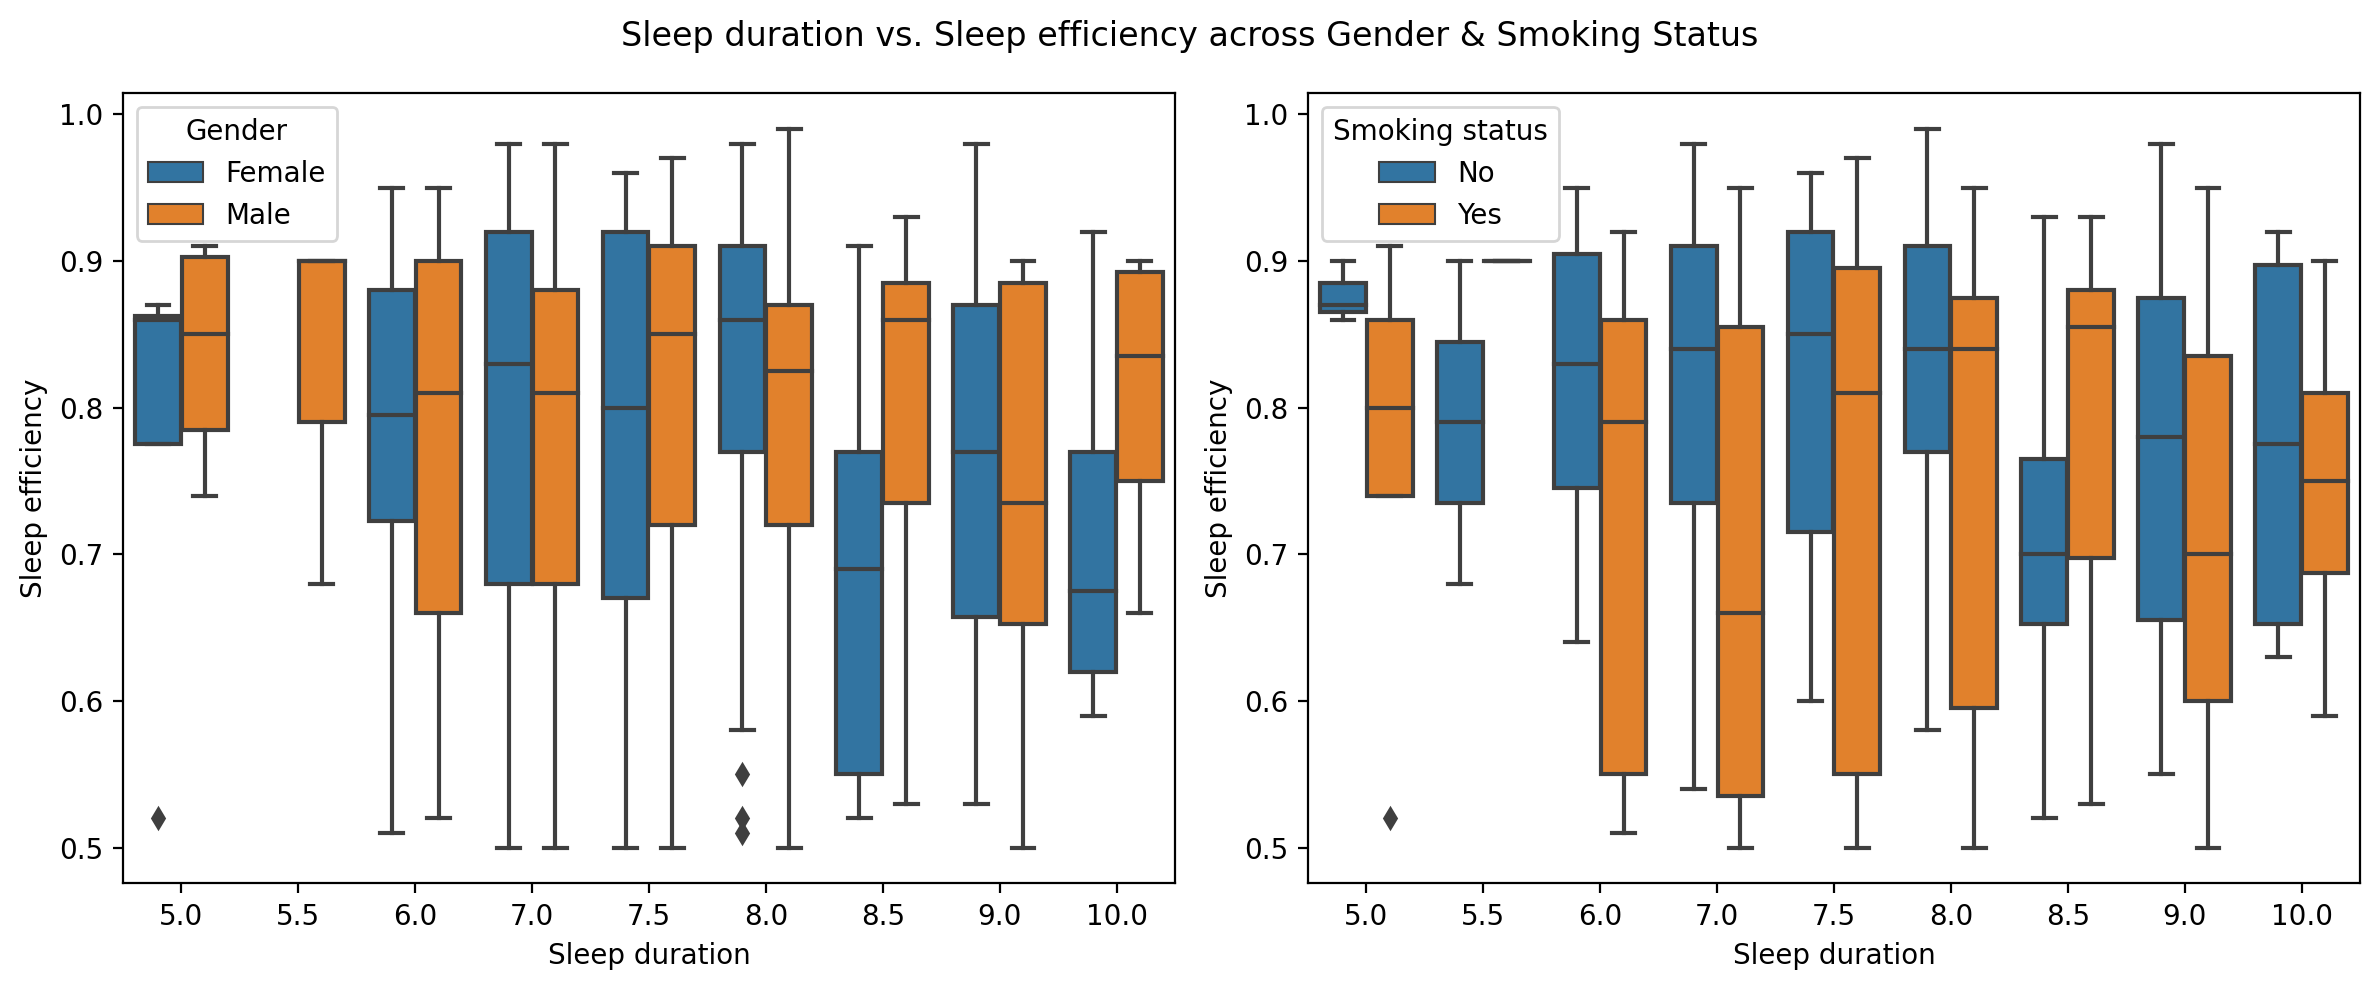

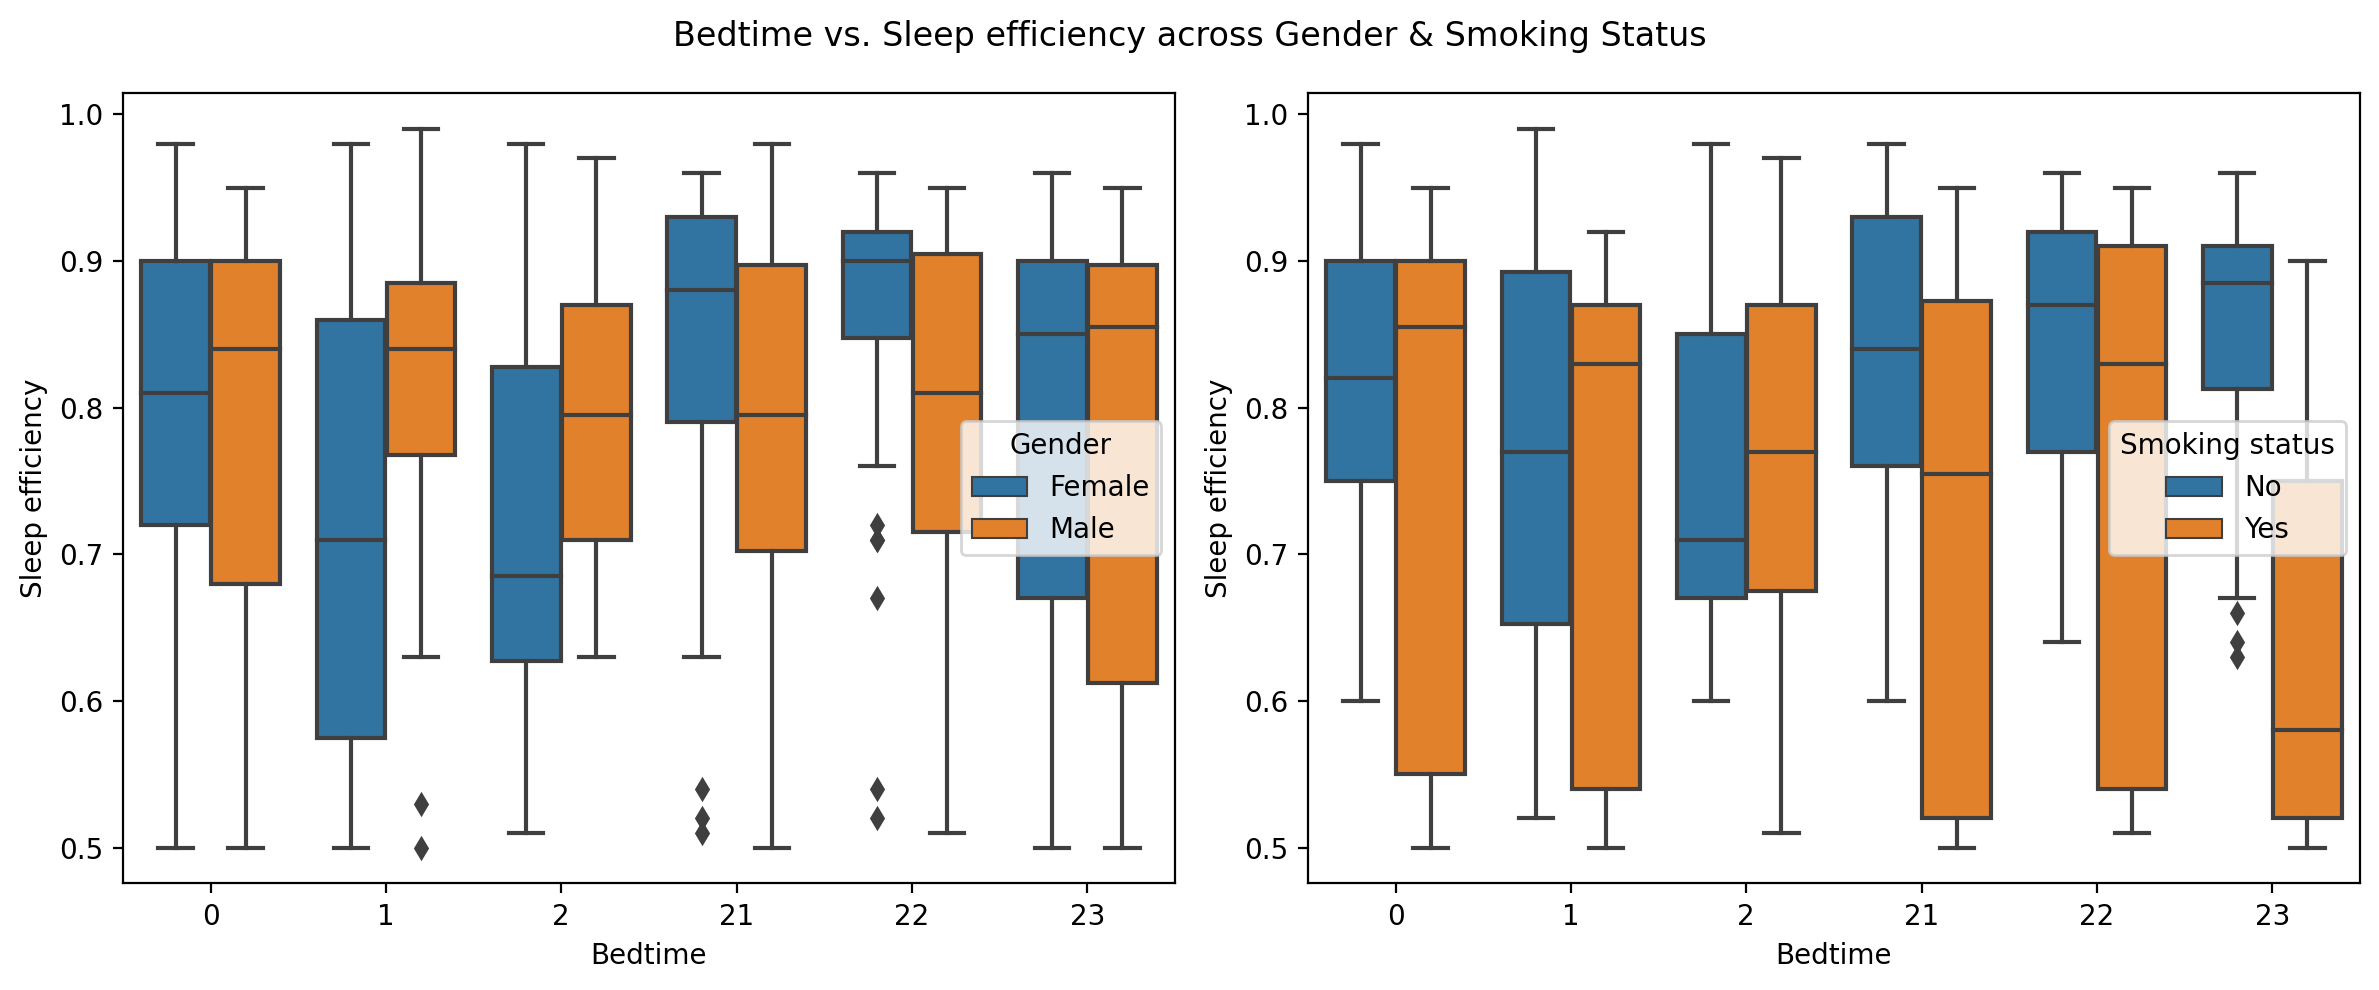

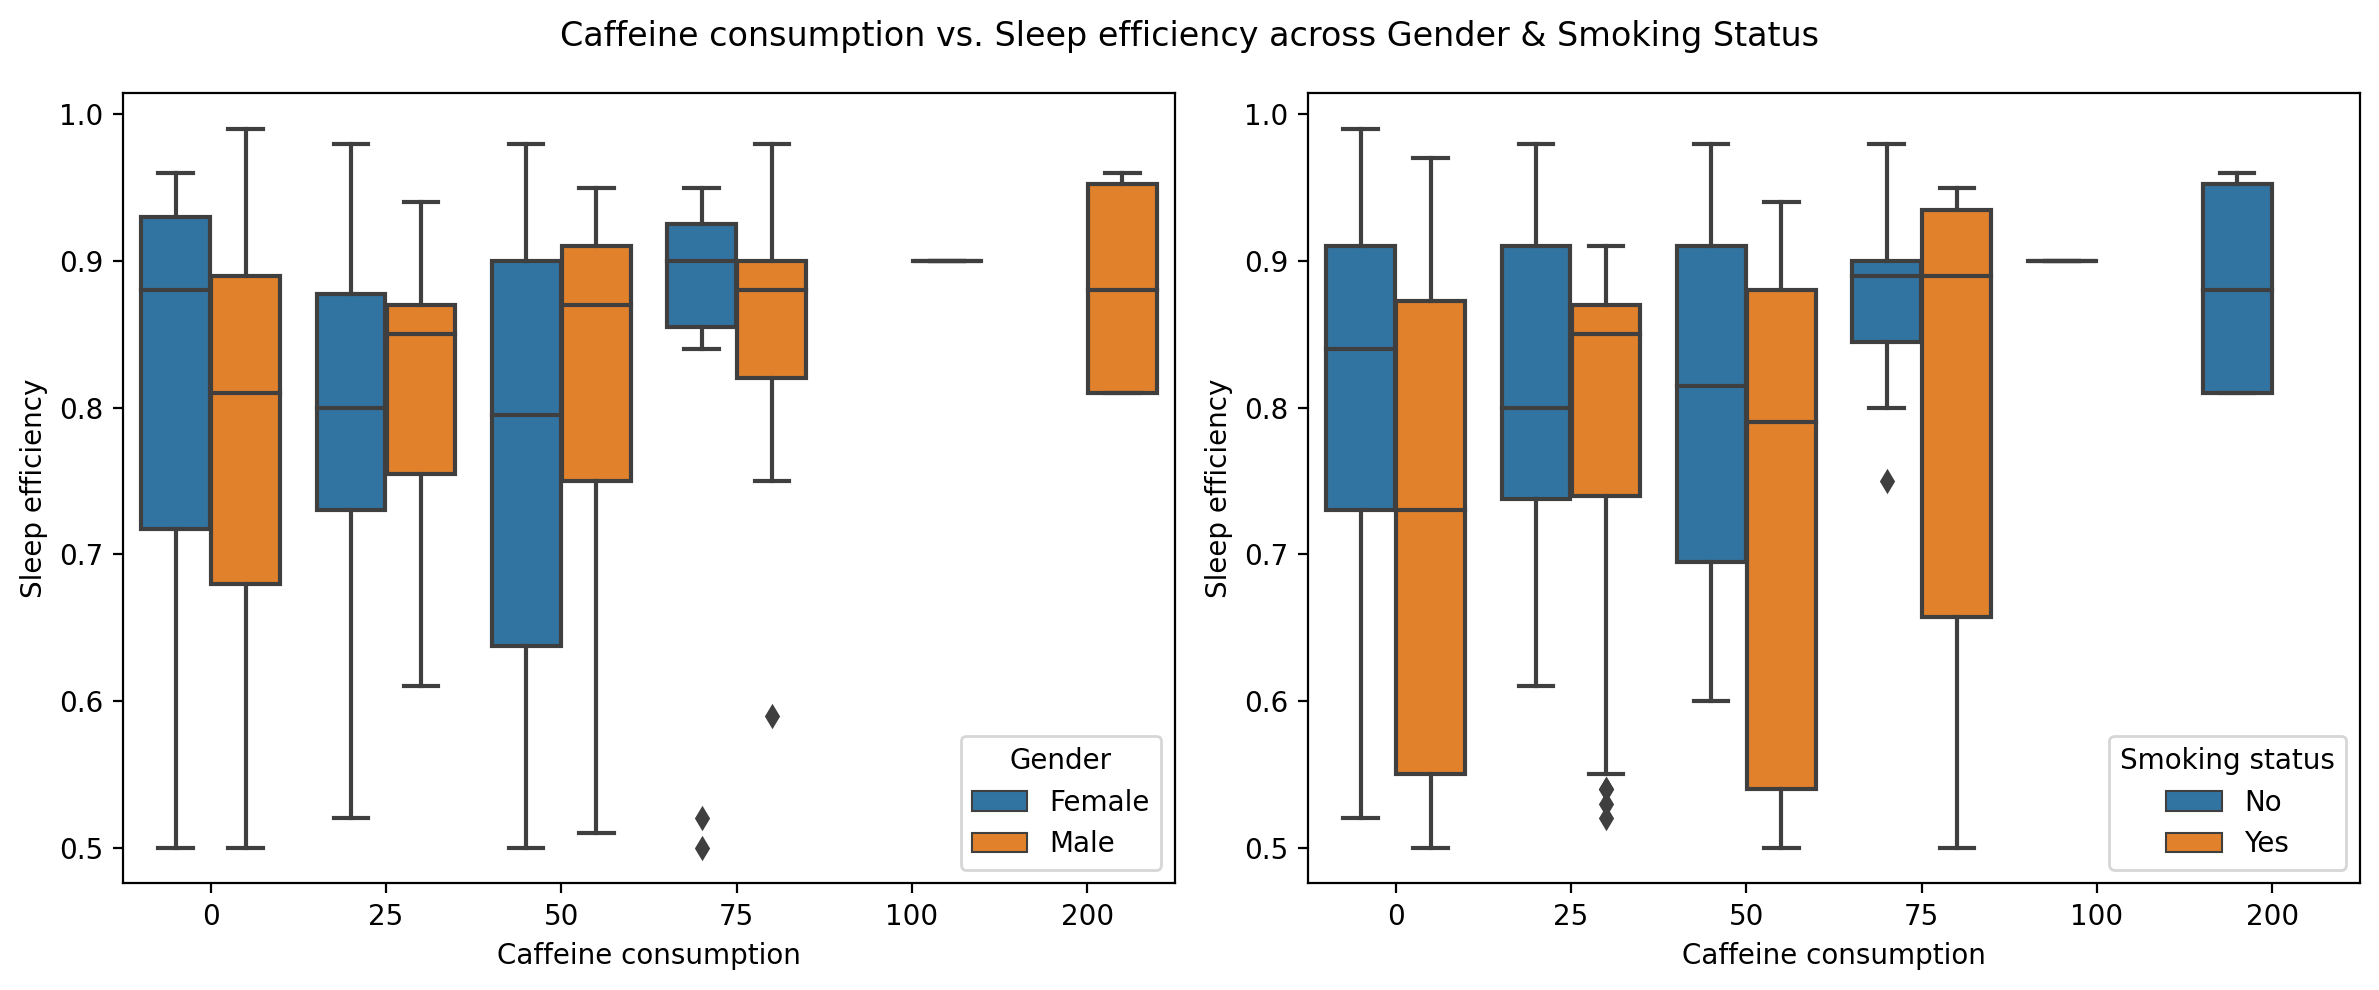

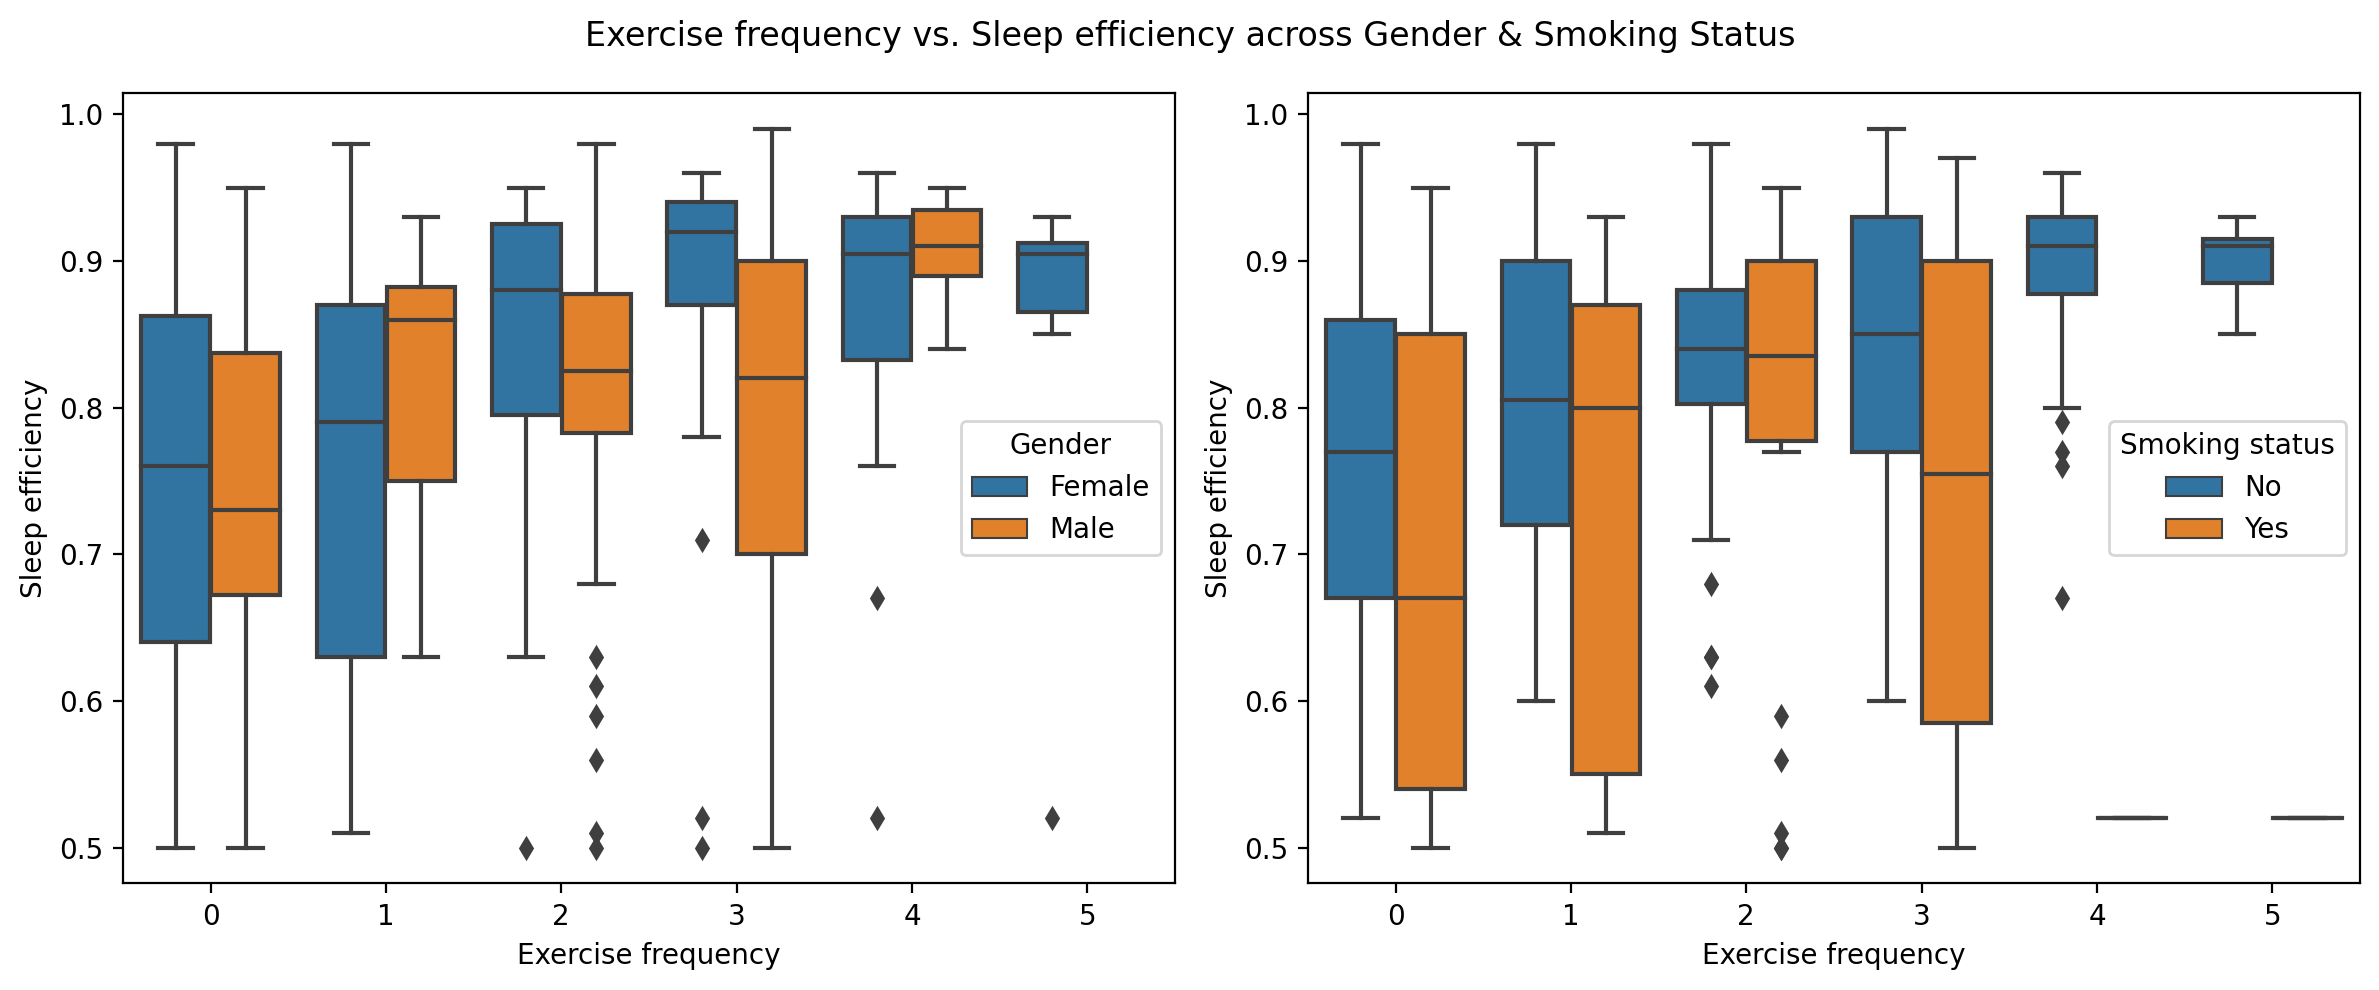

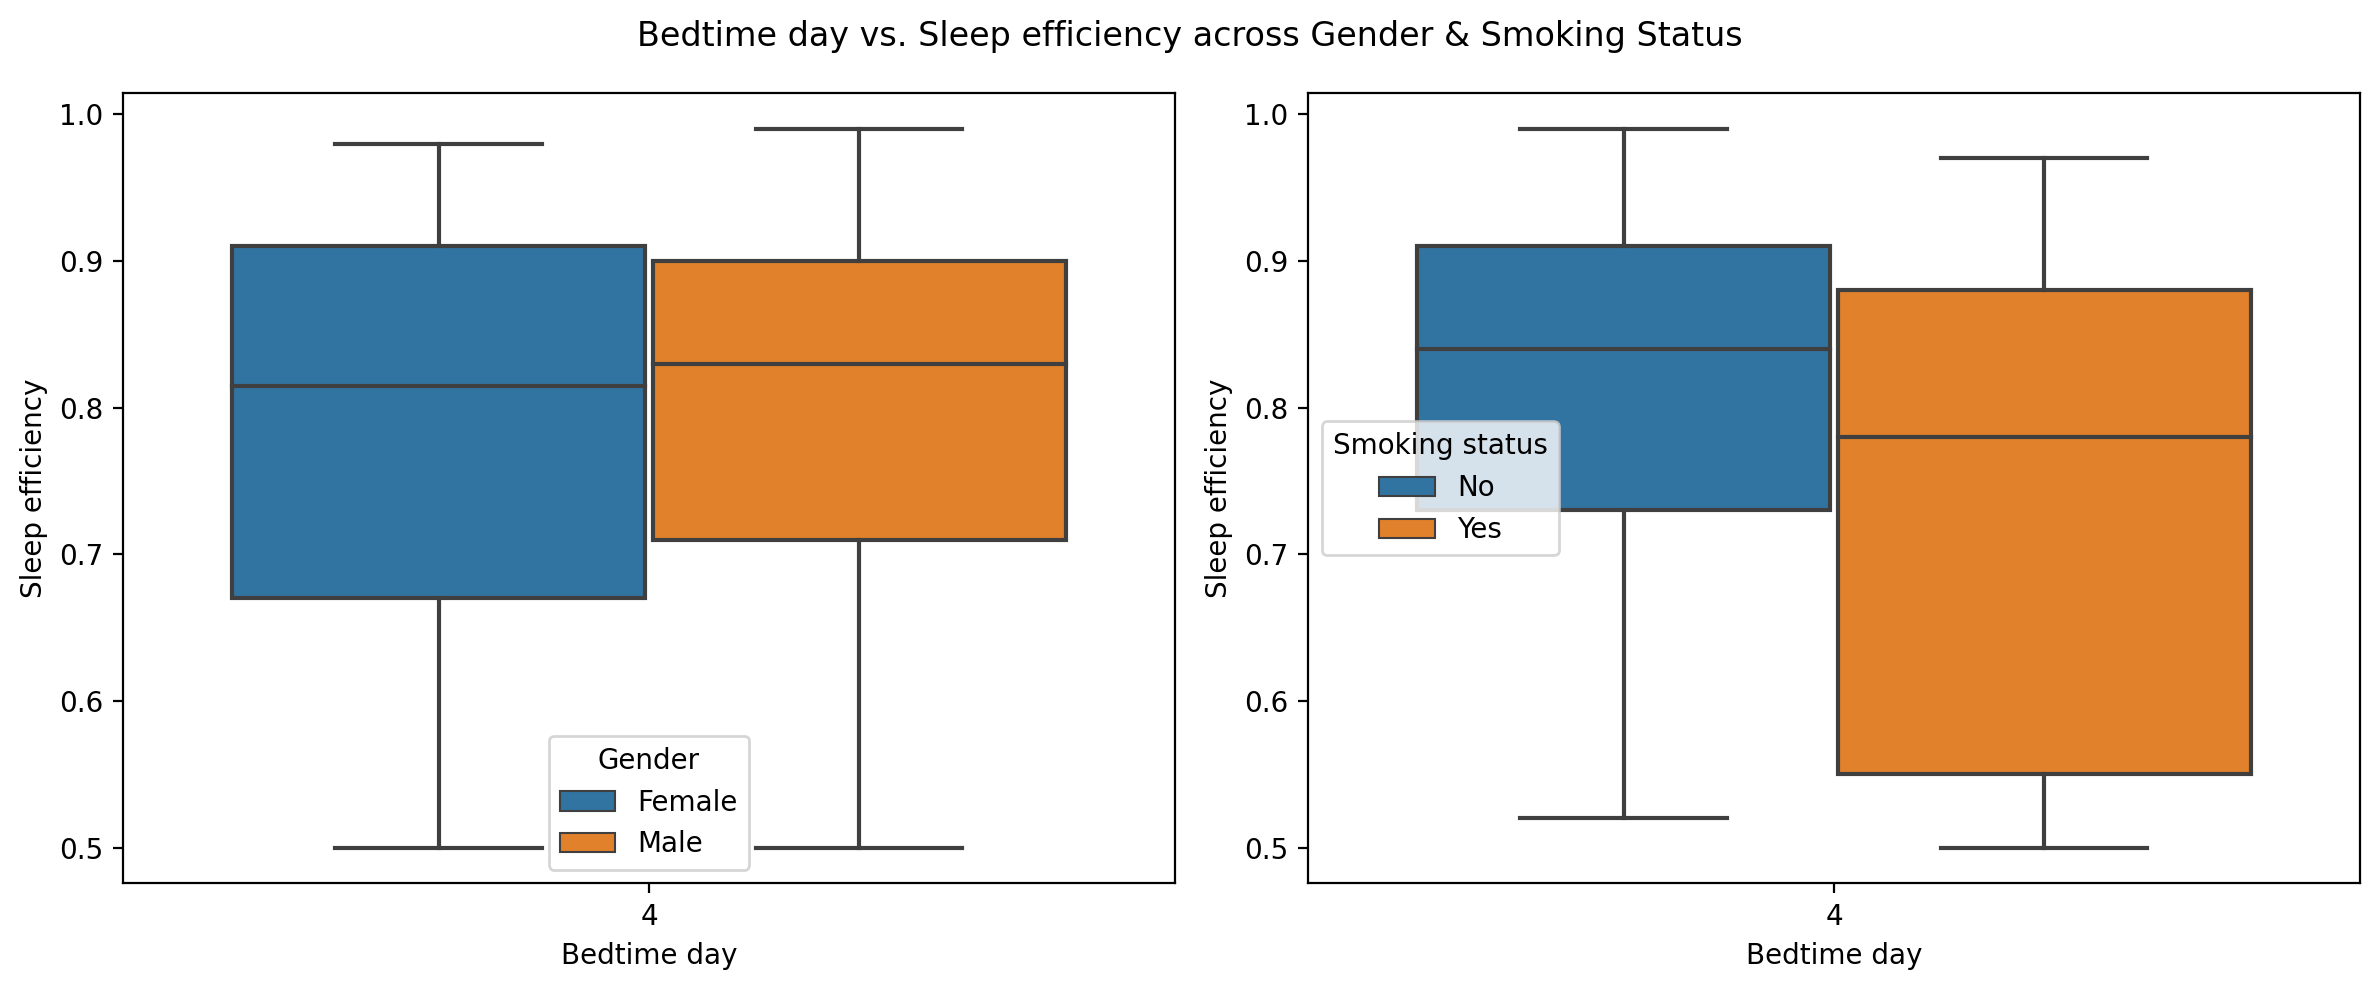

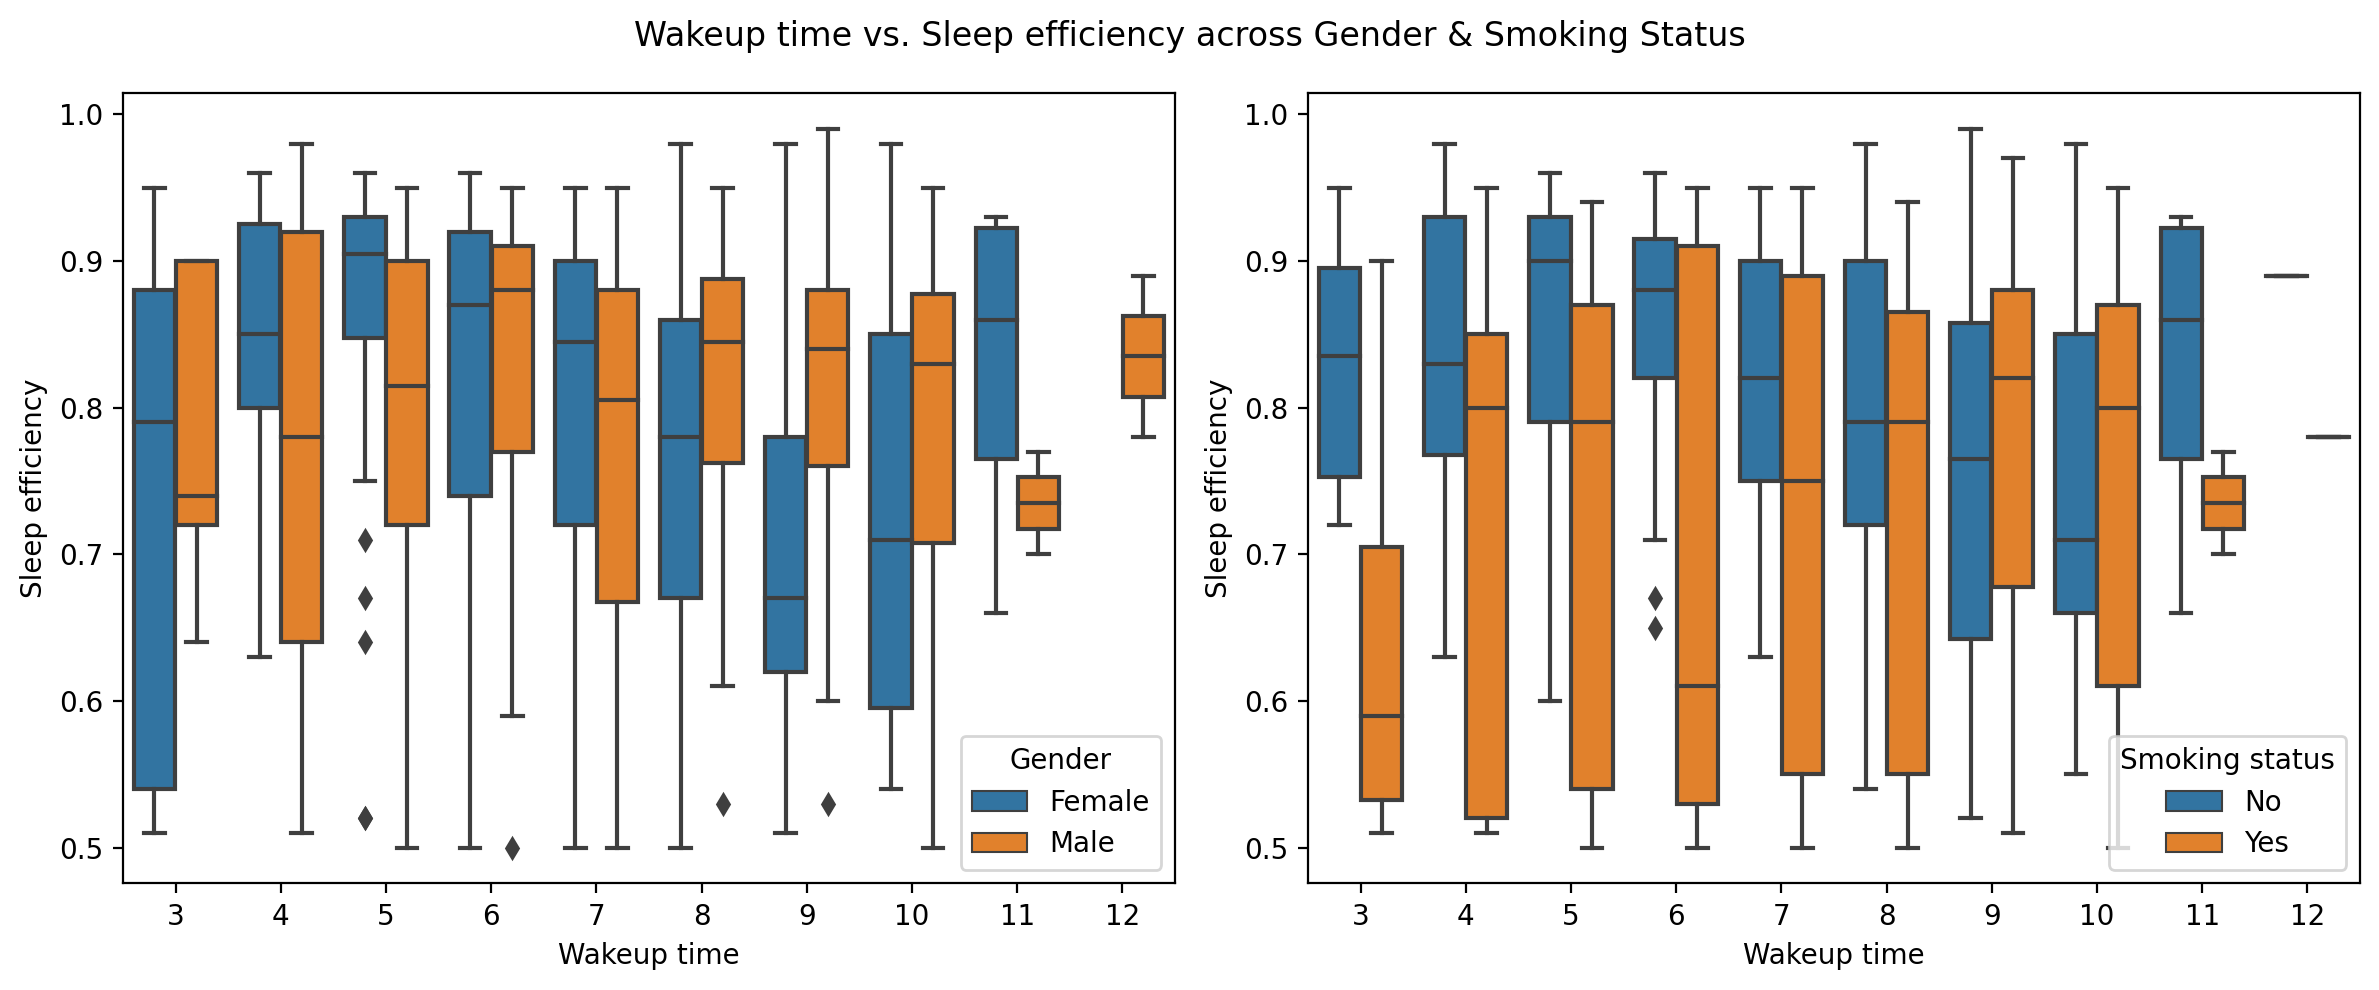

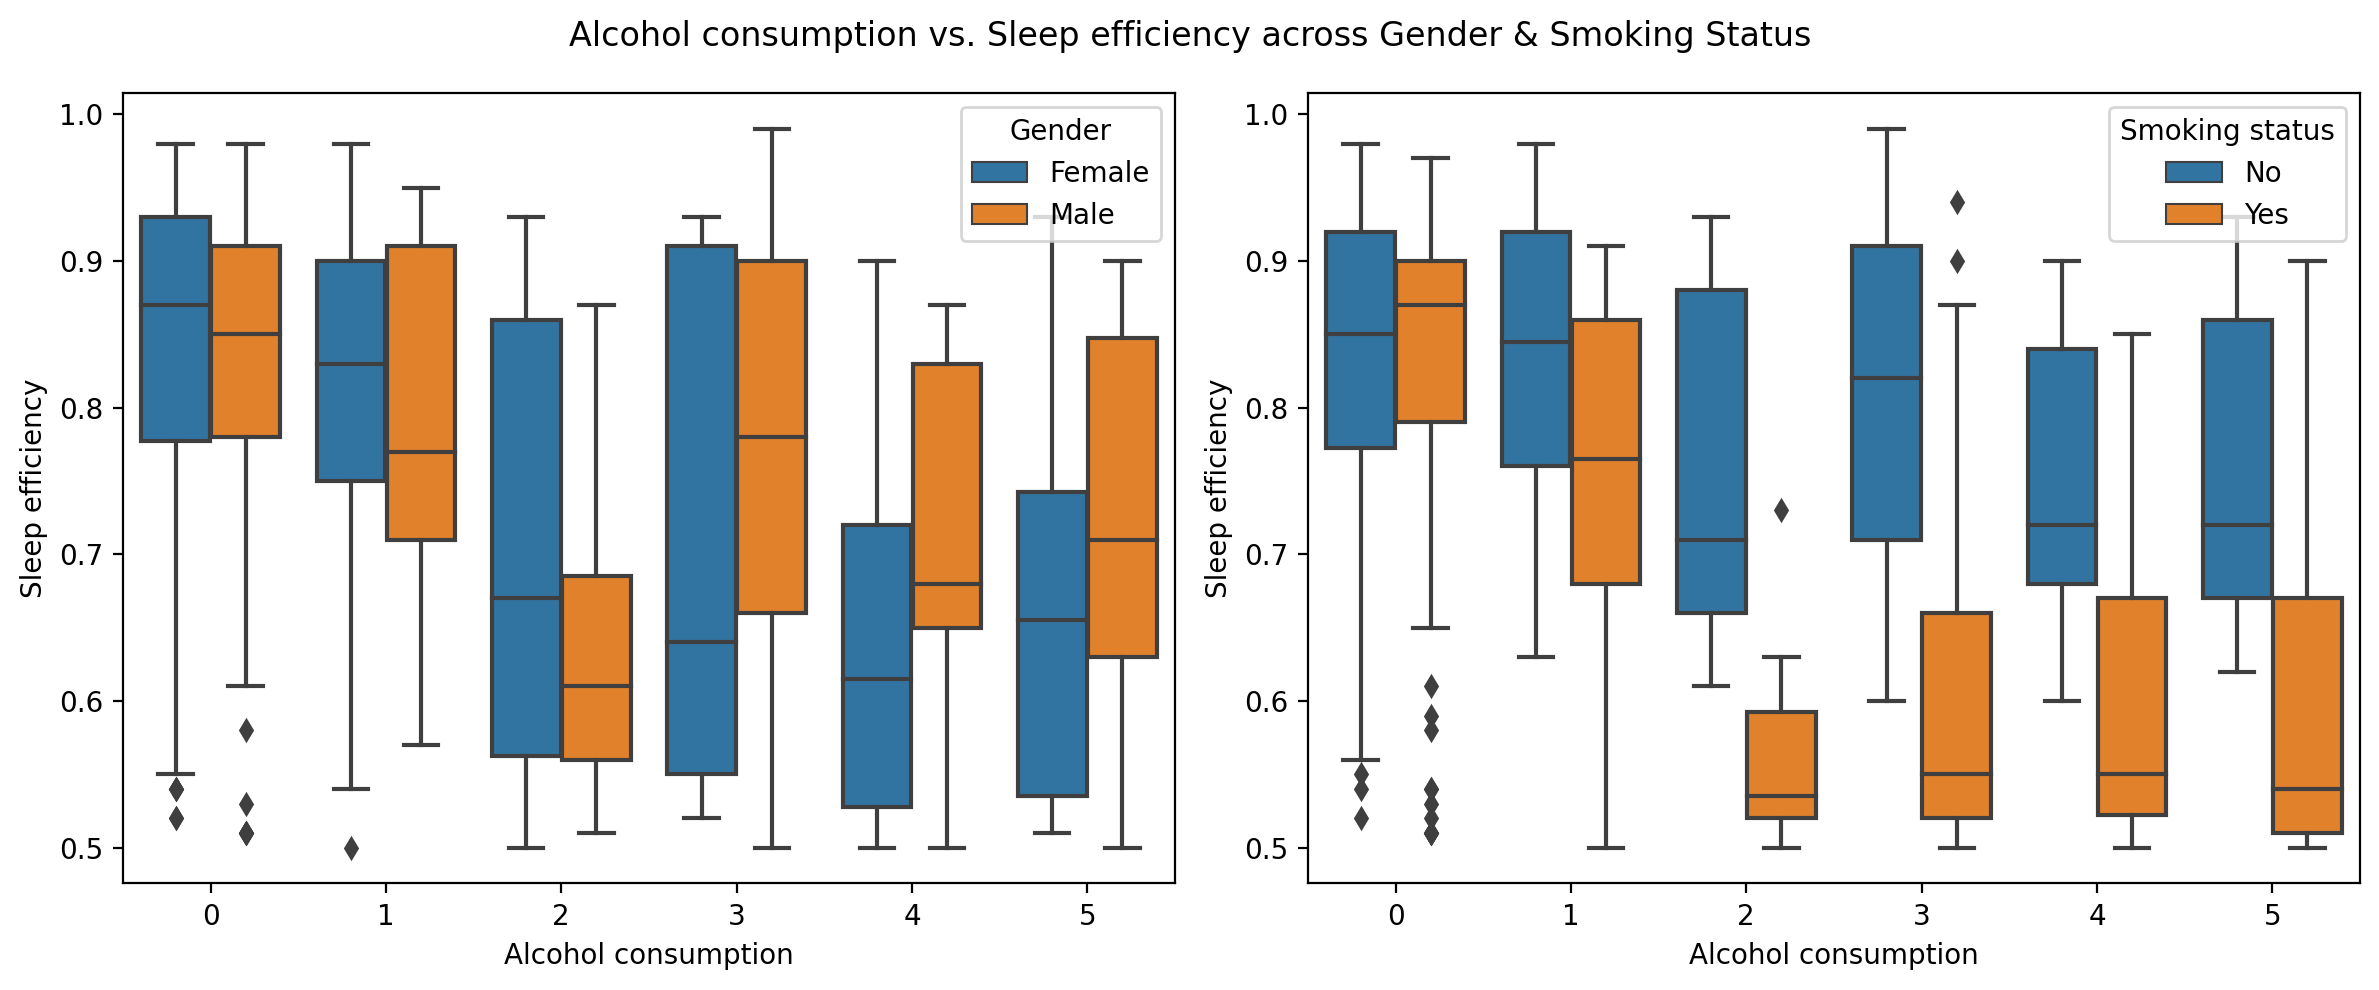

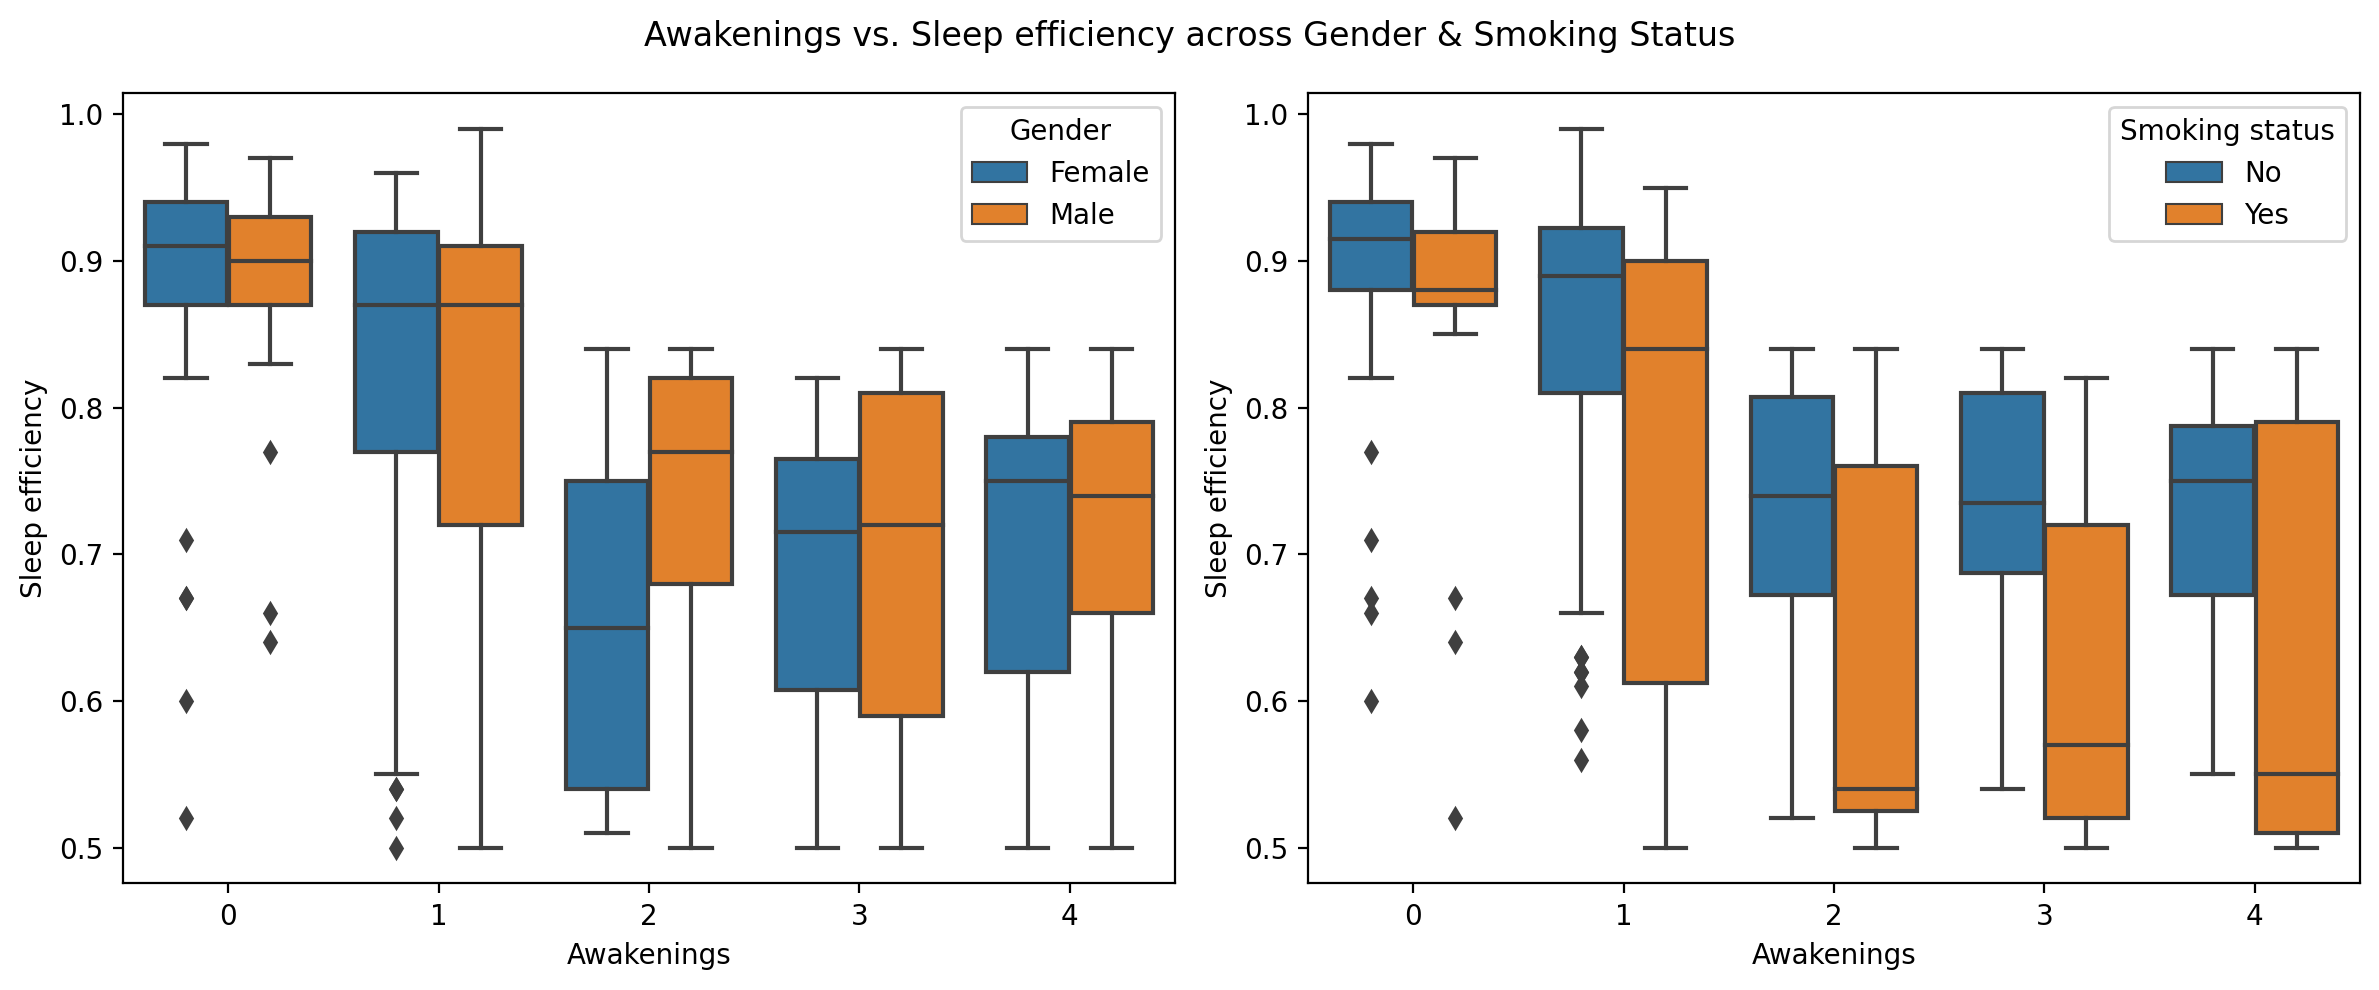

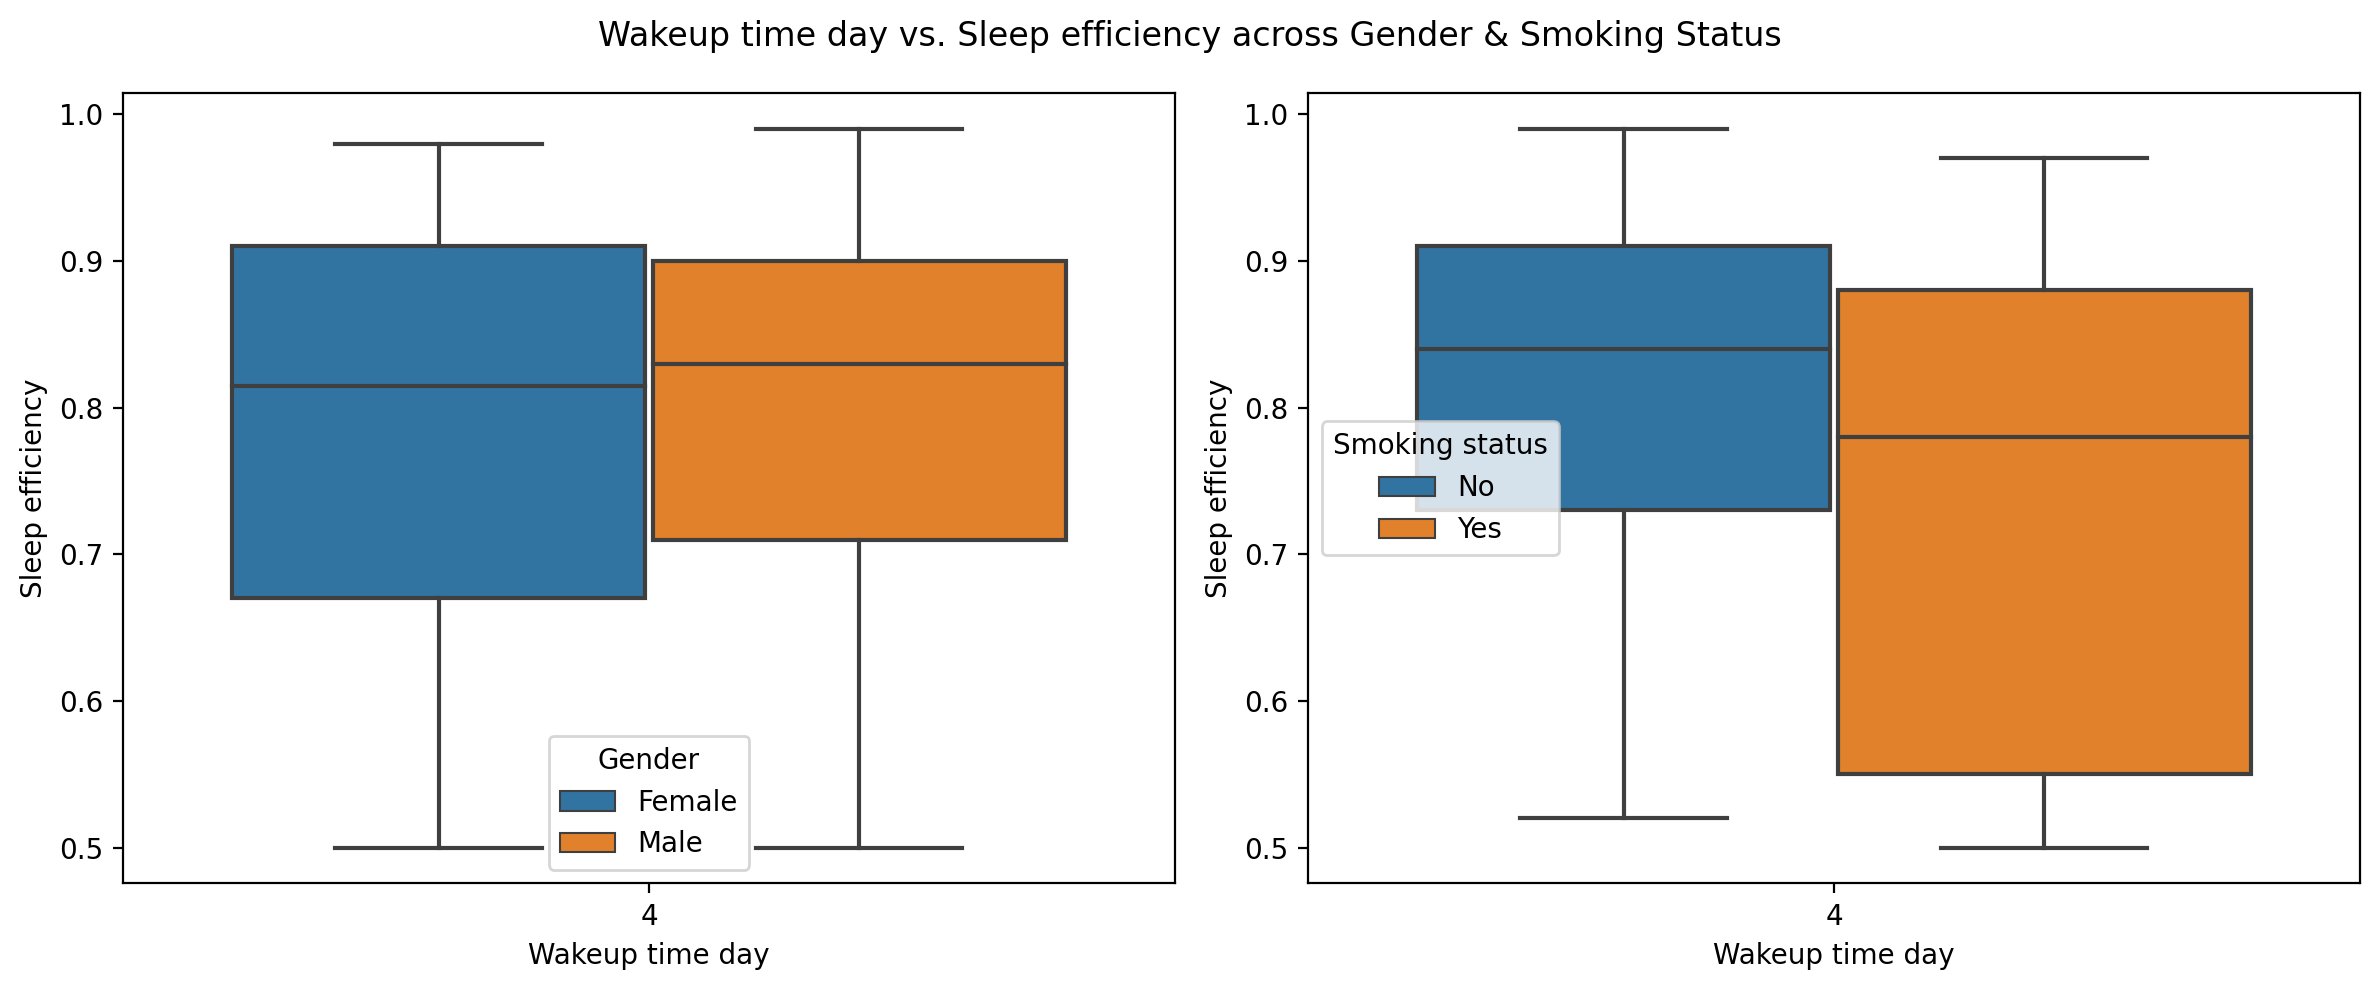

REM sleep percentage
------------------------------------------


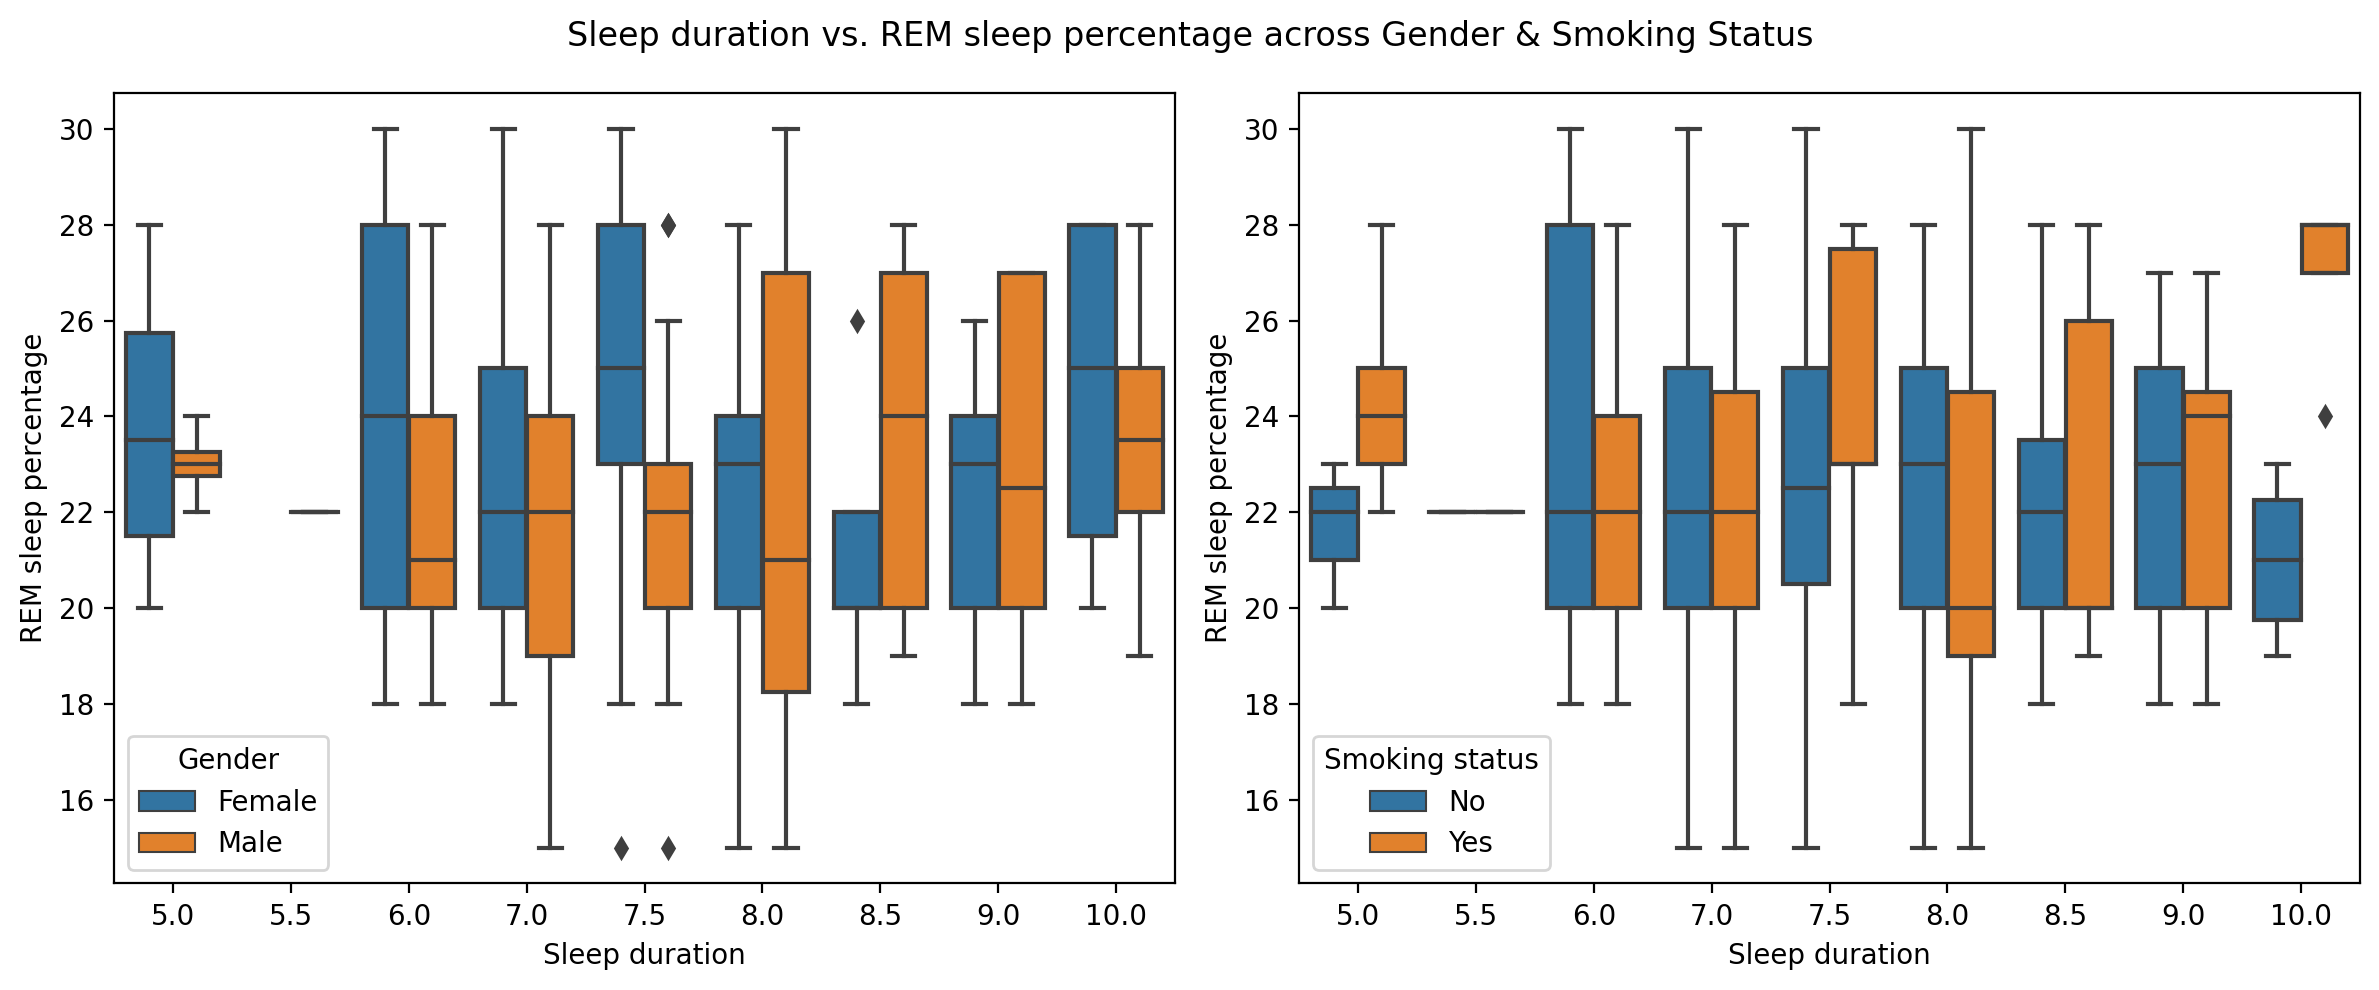

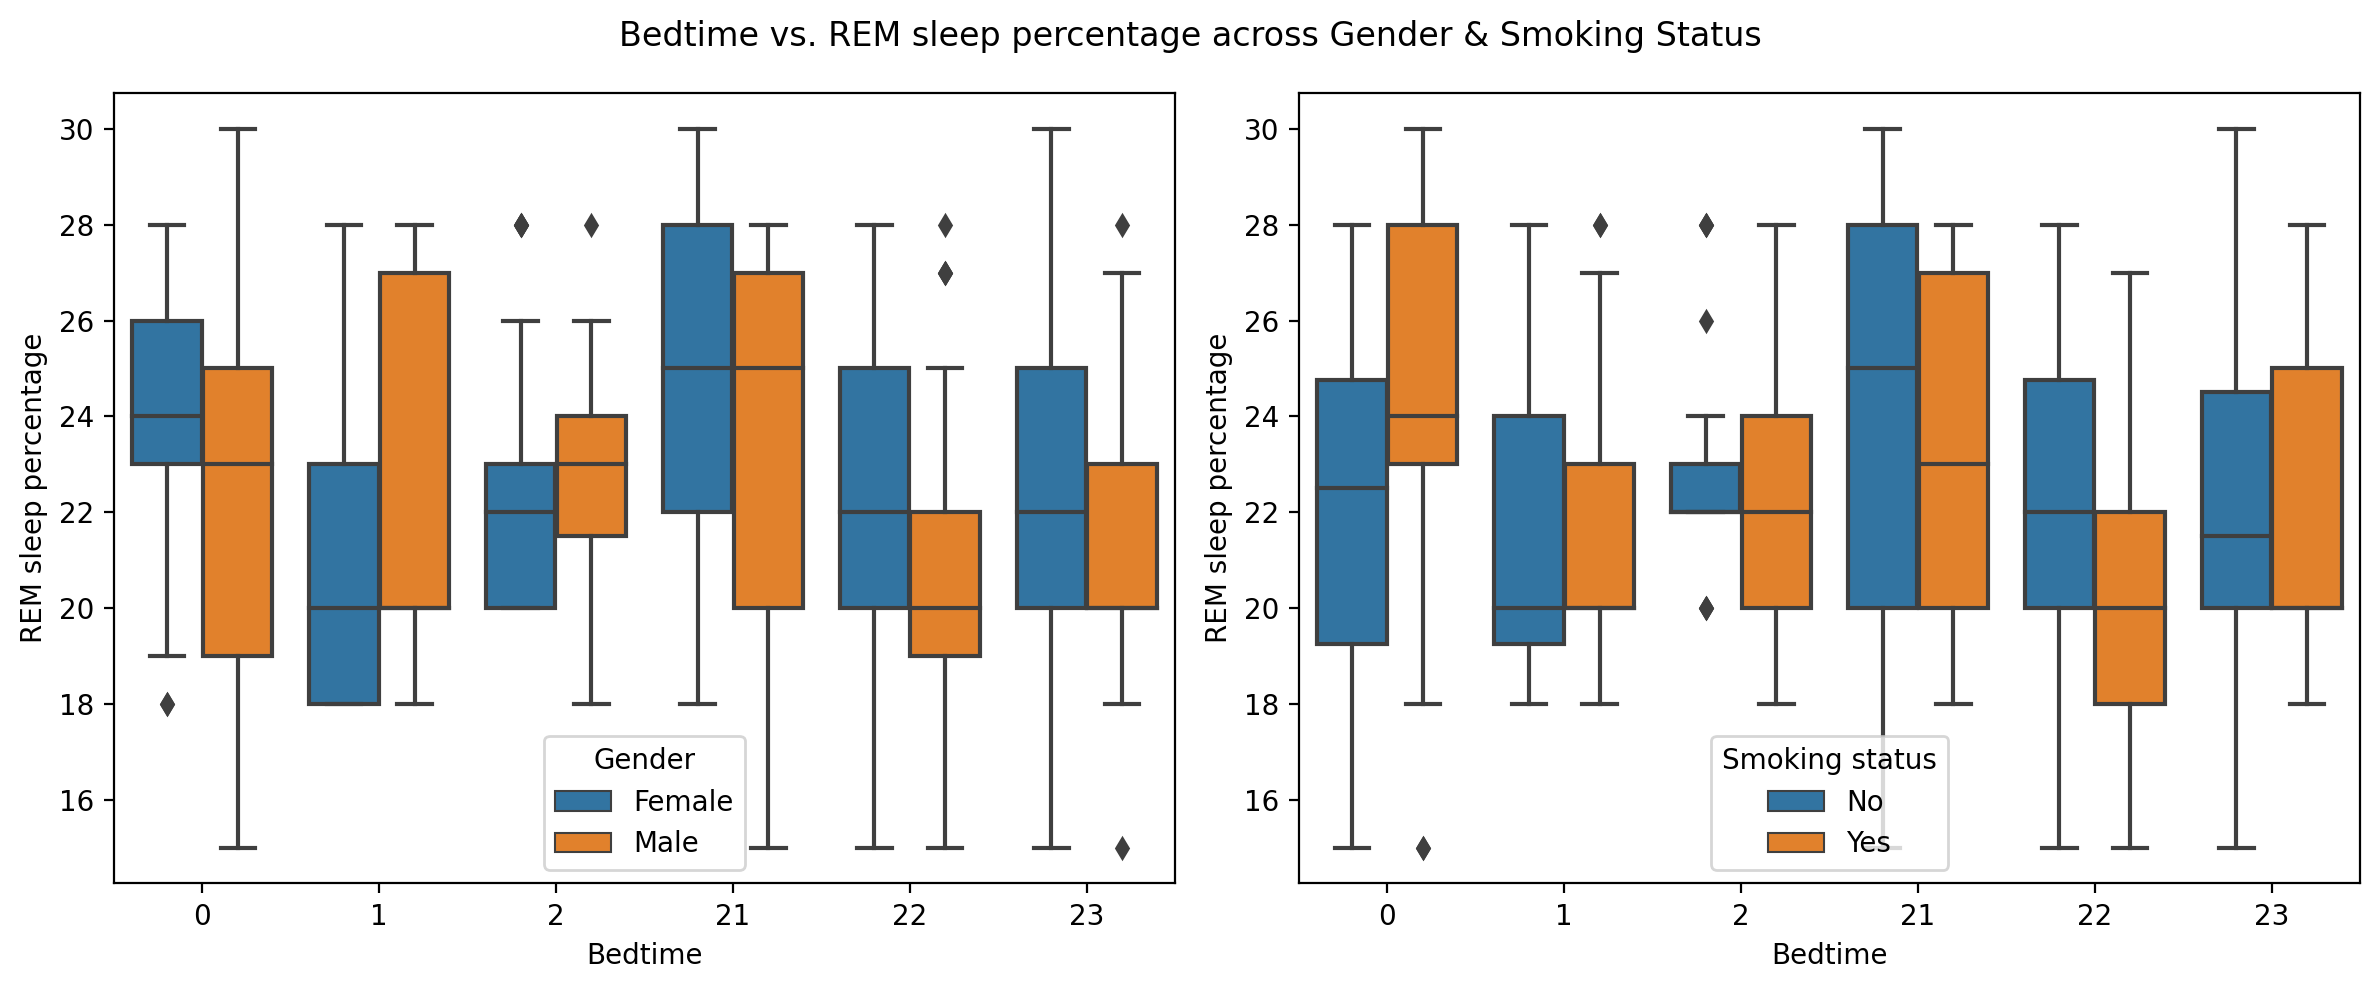

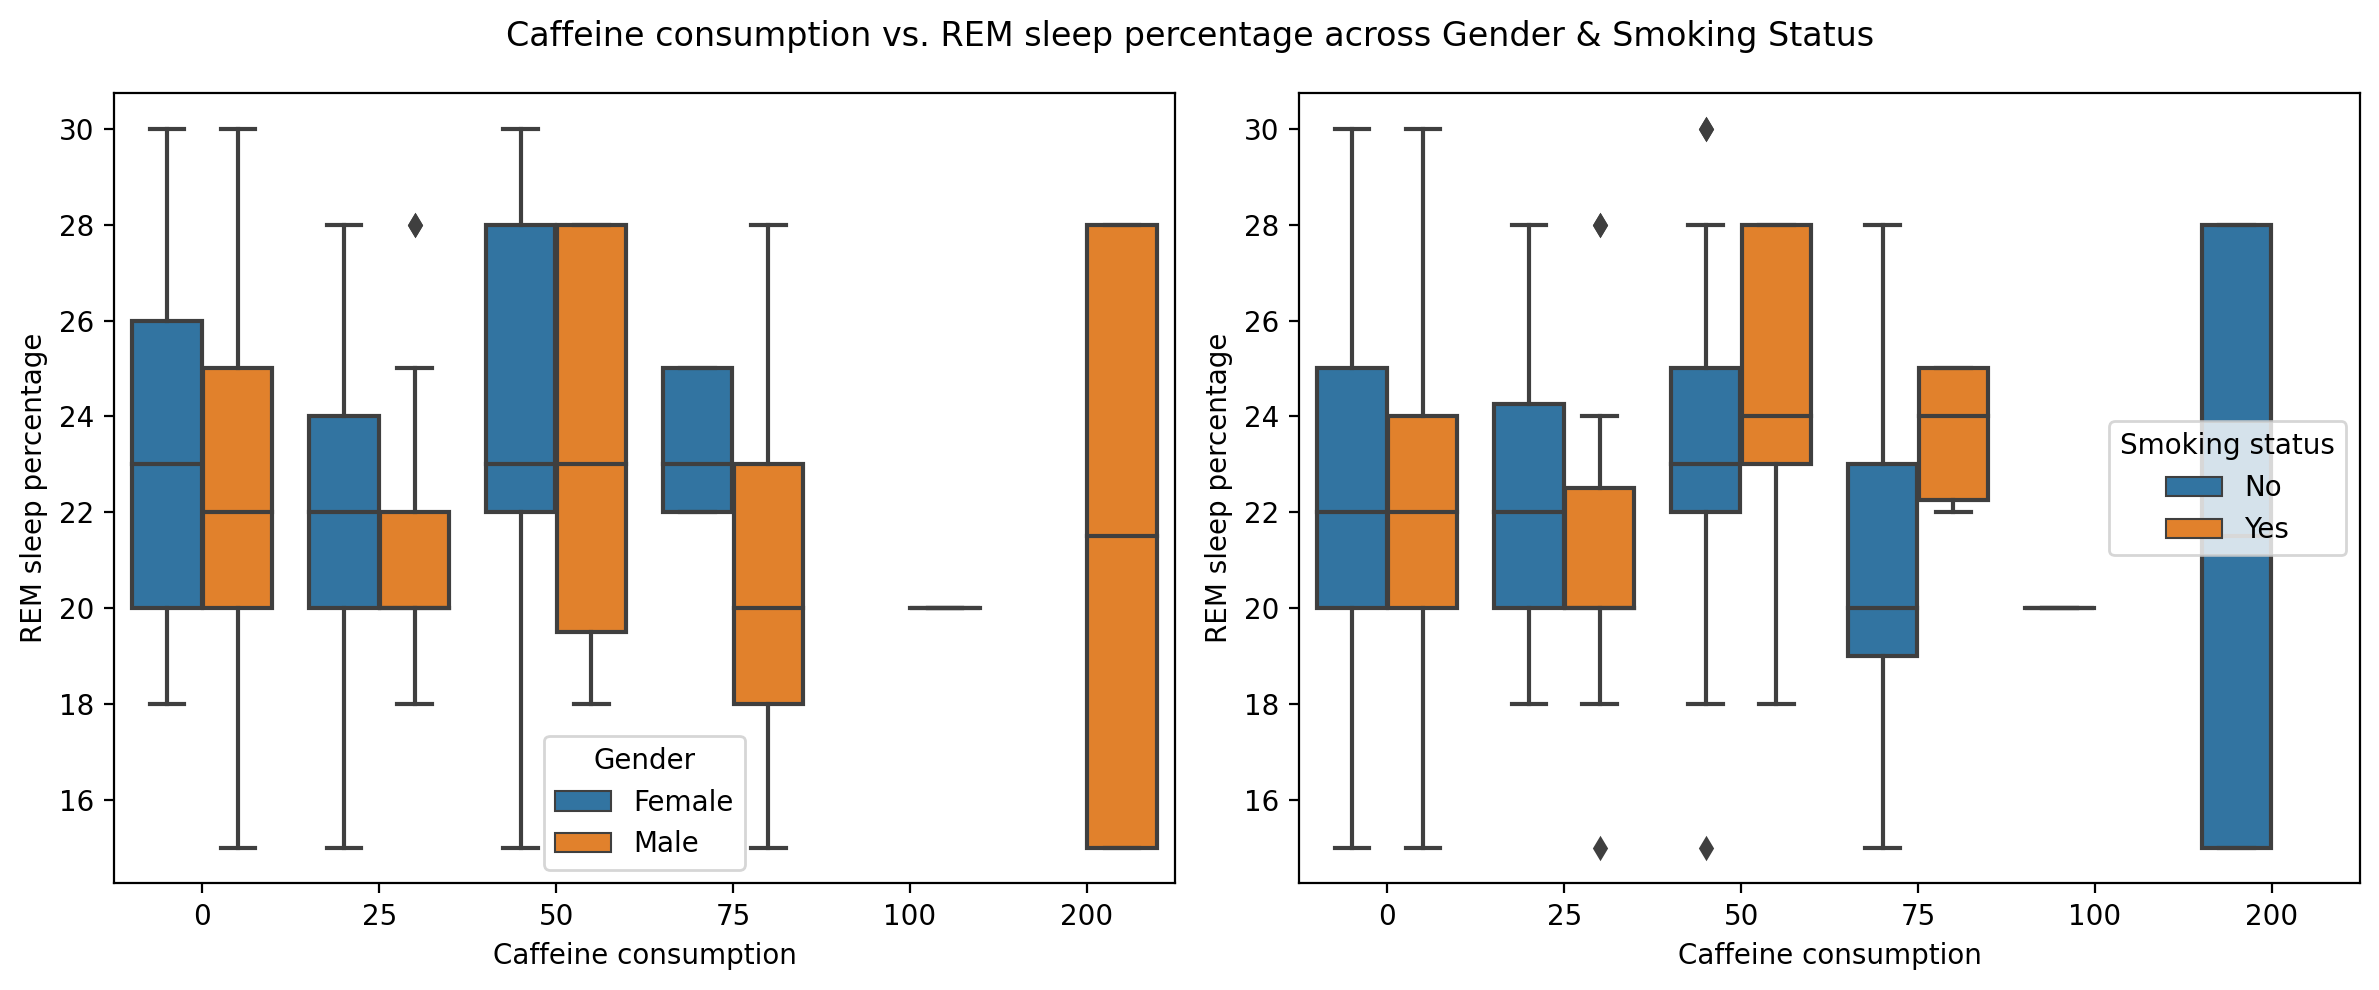

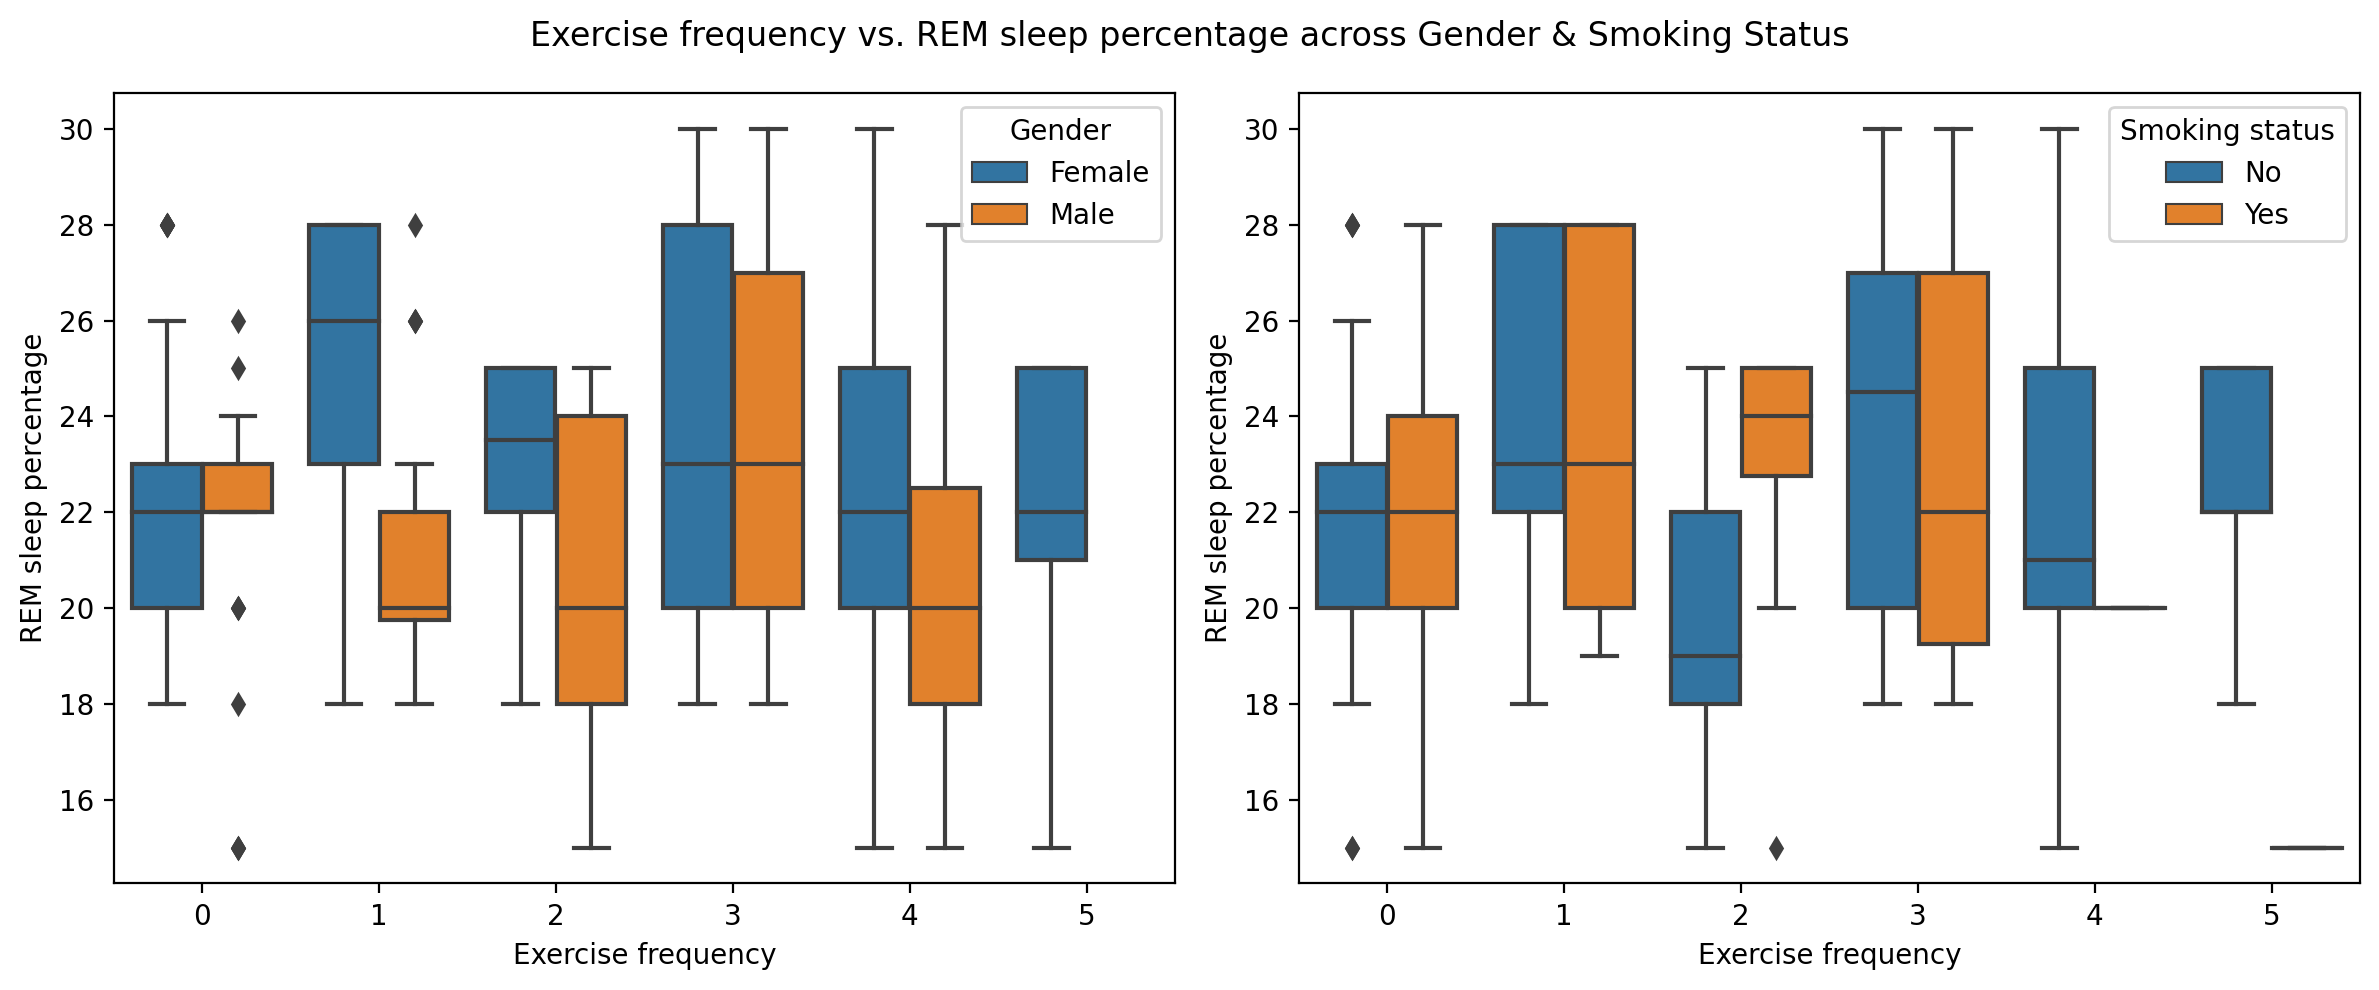

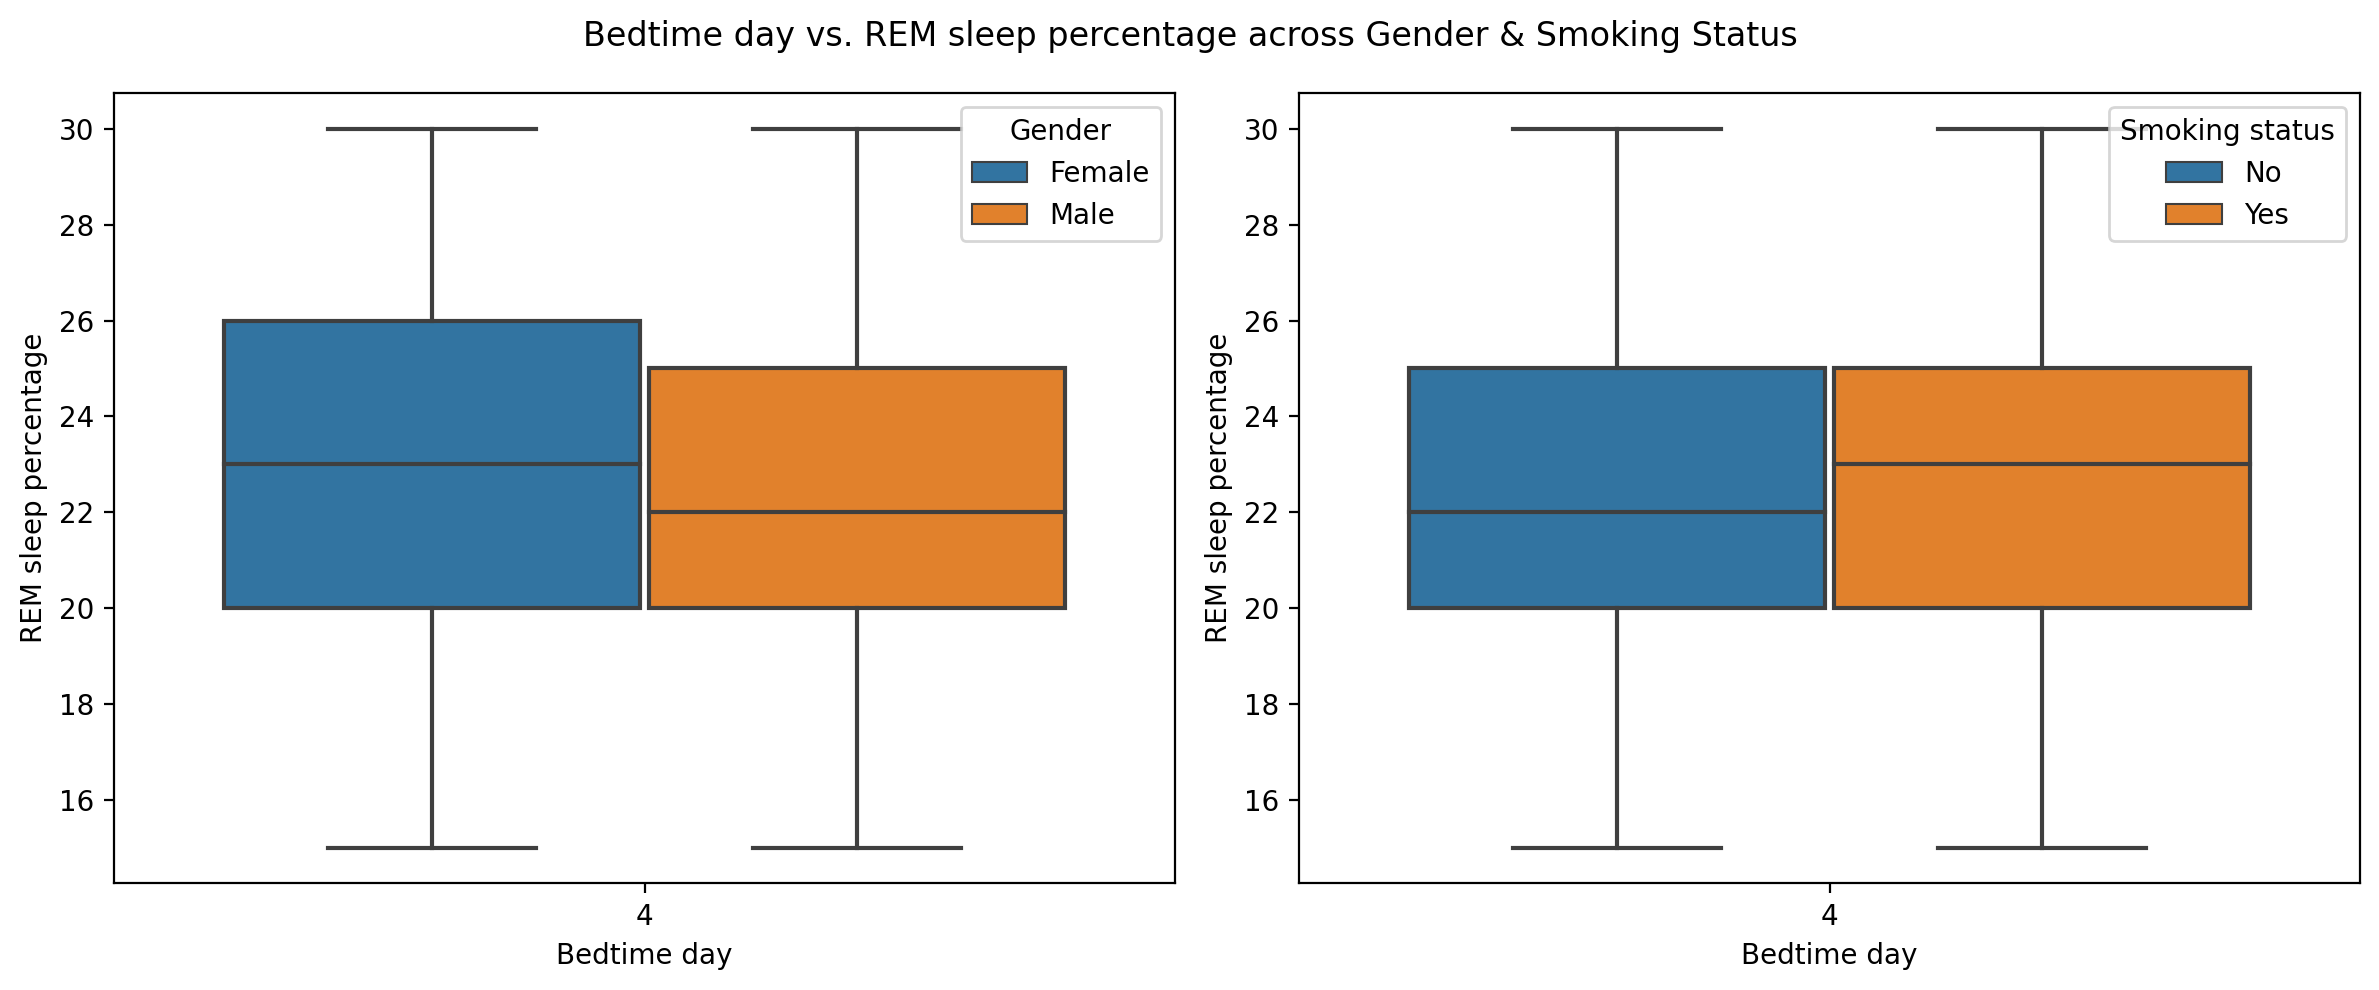

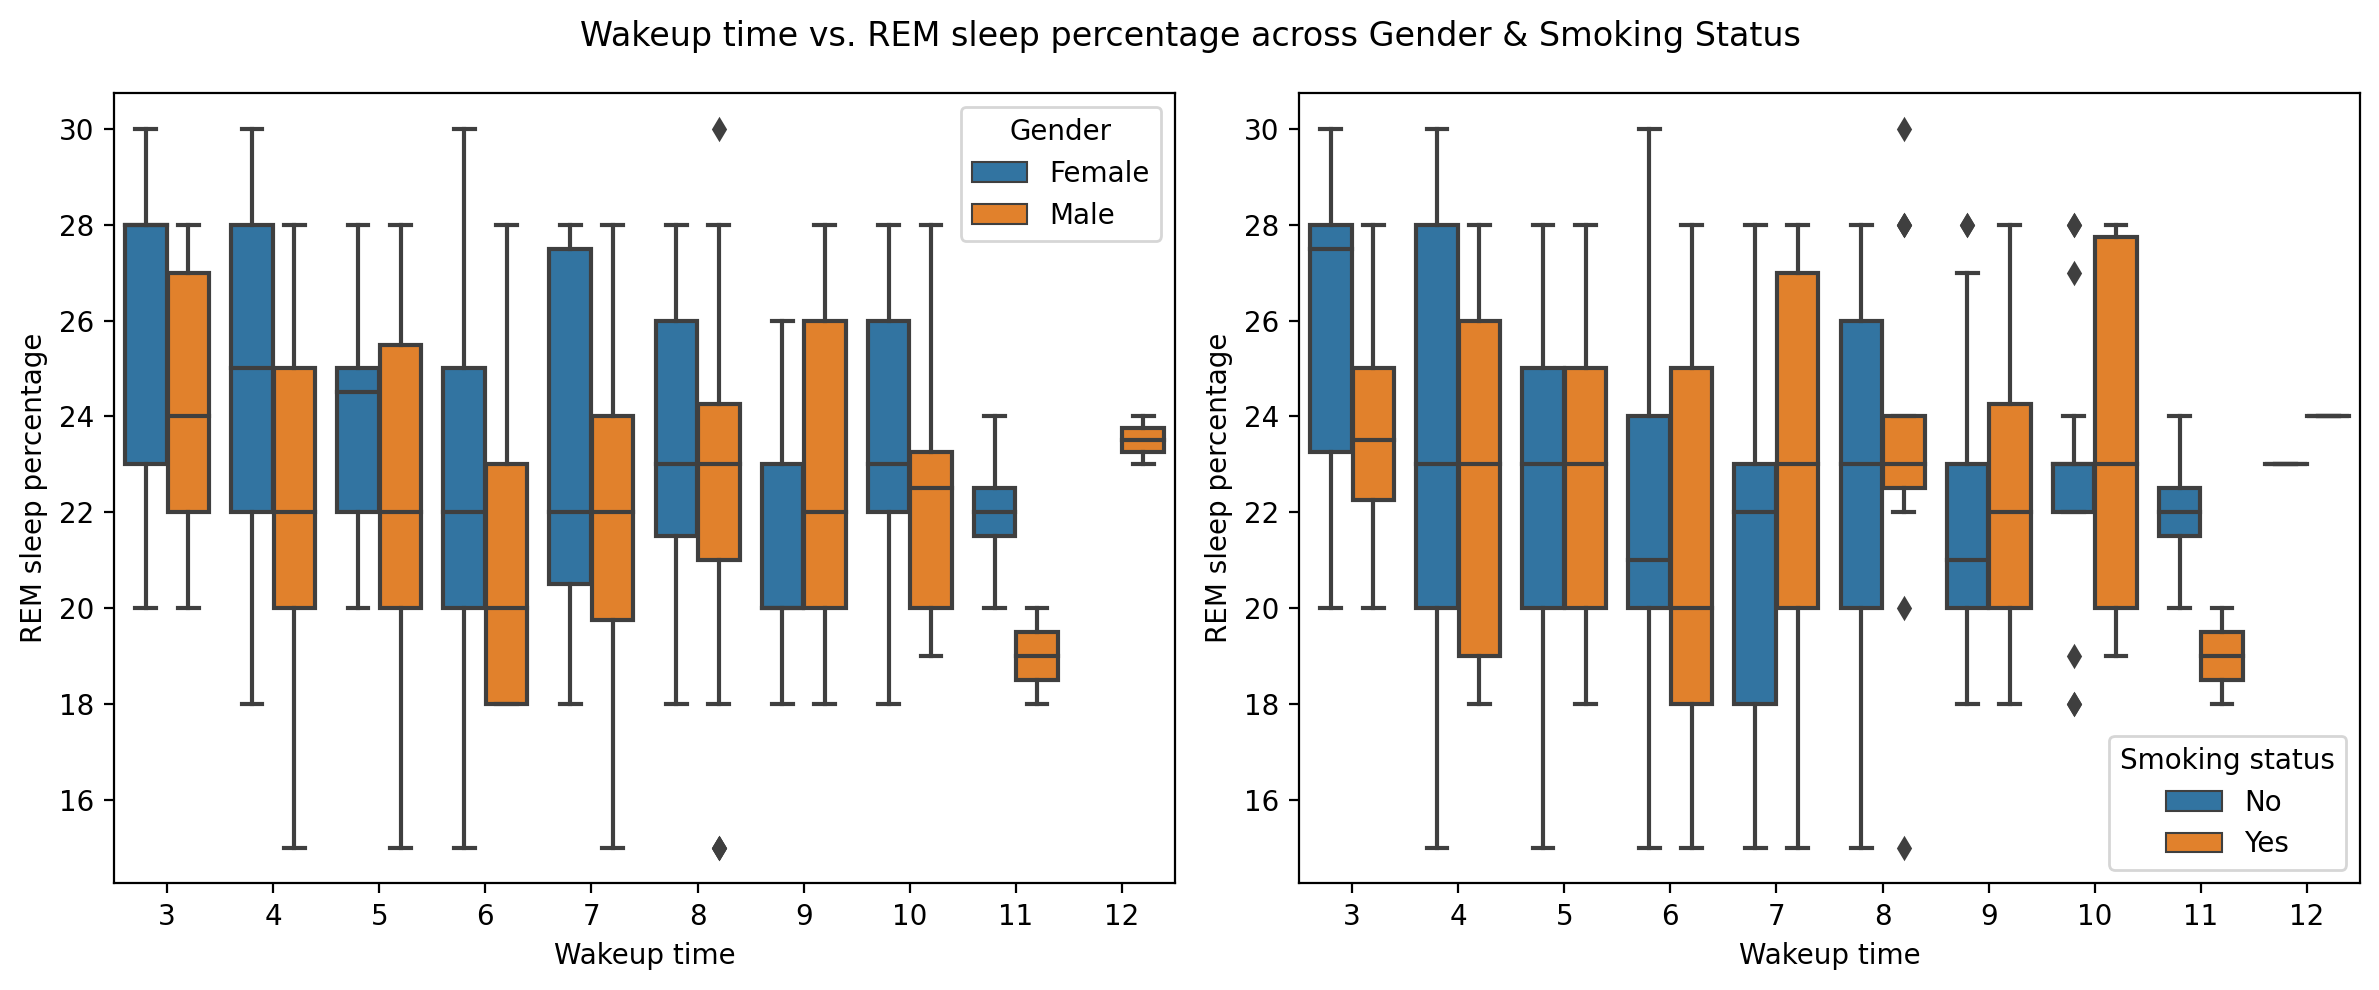

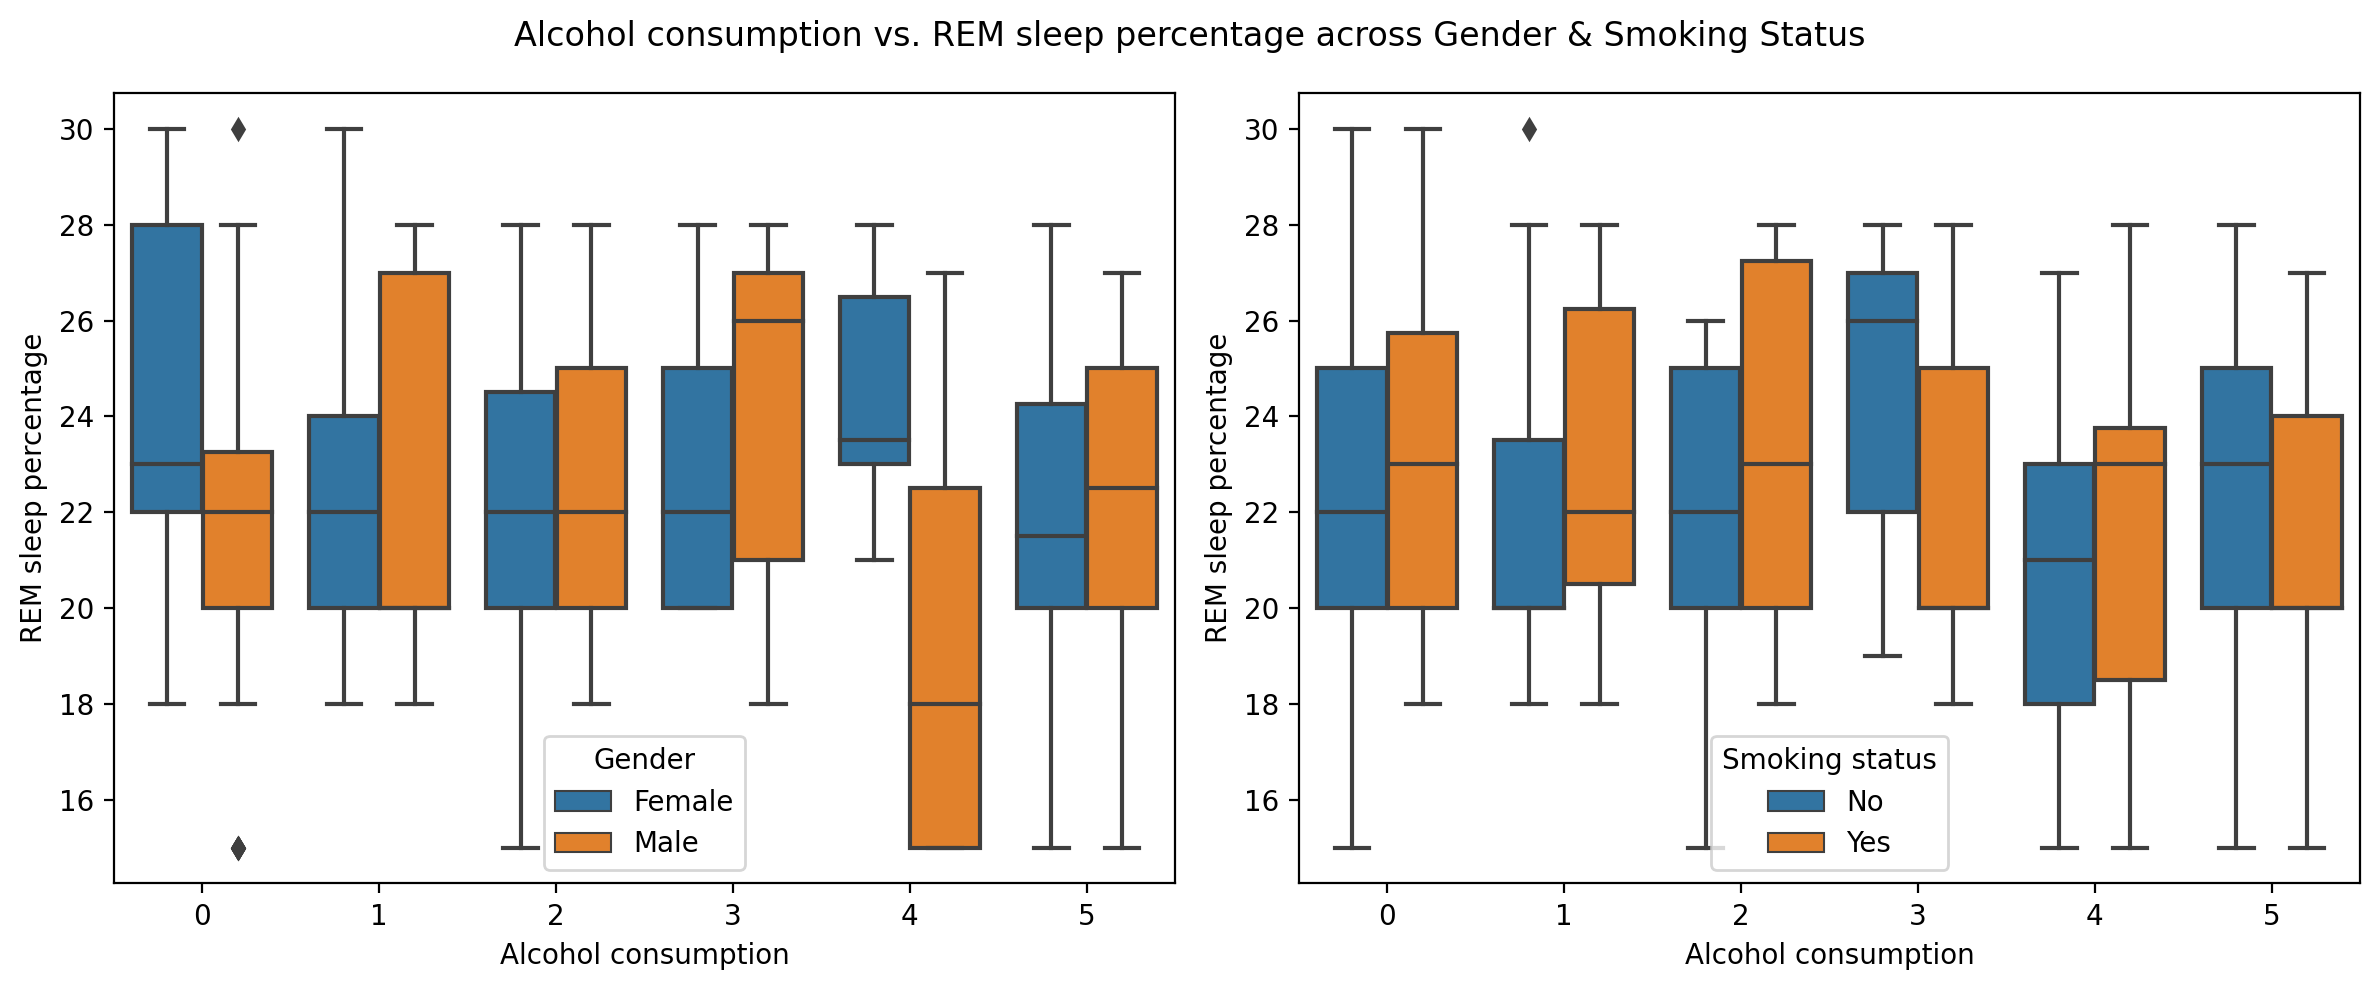

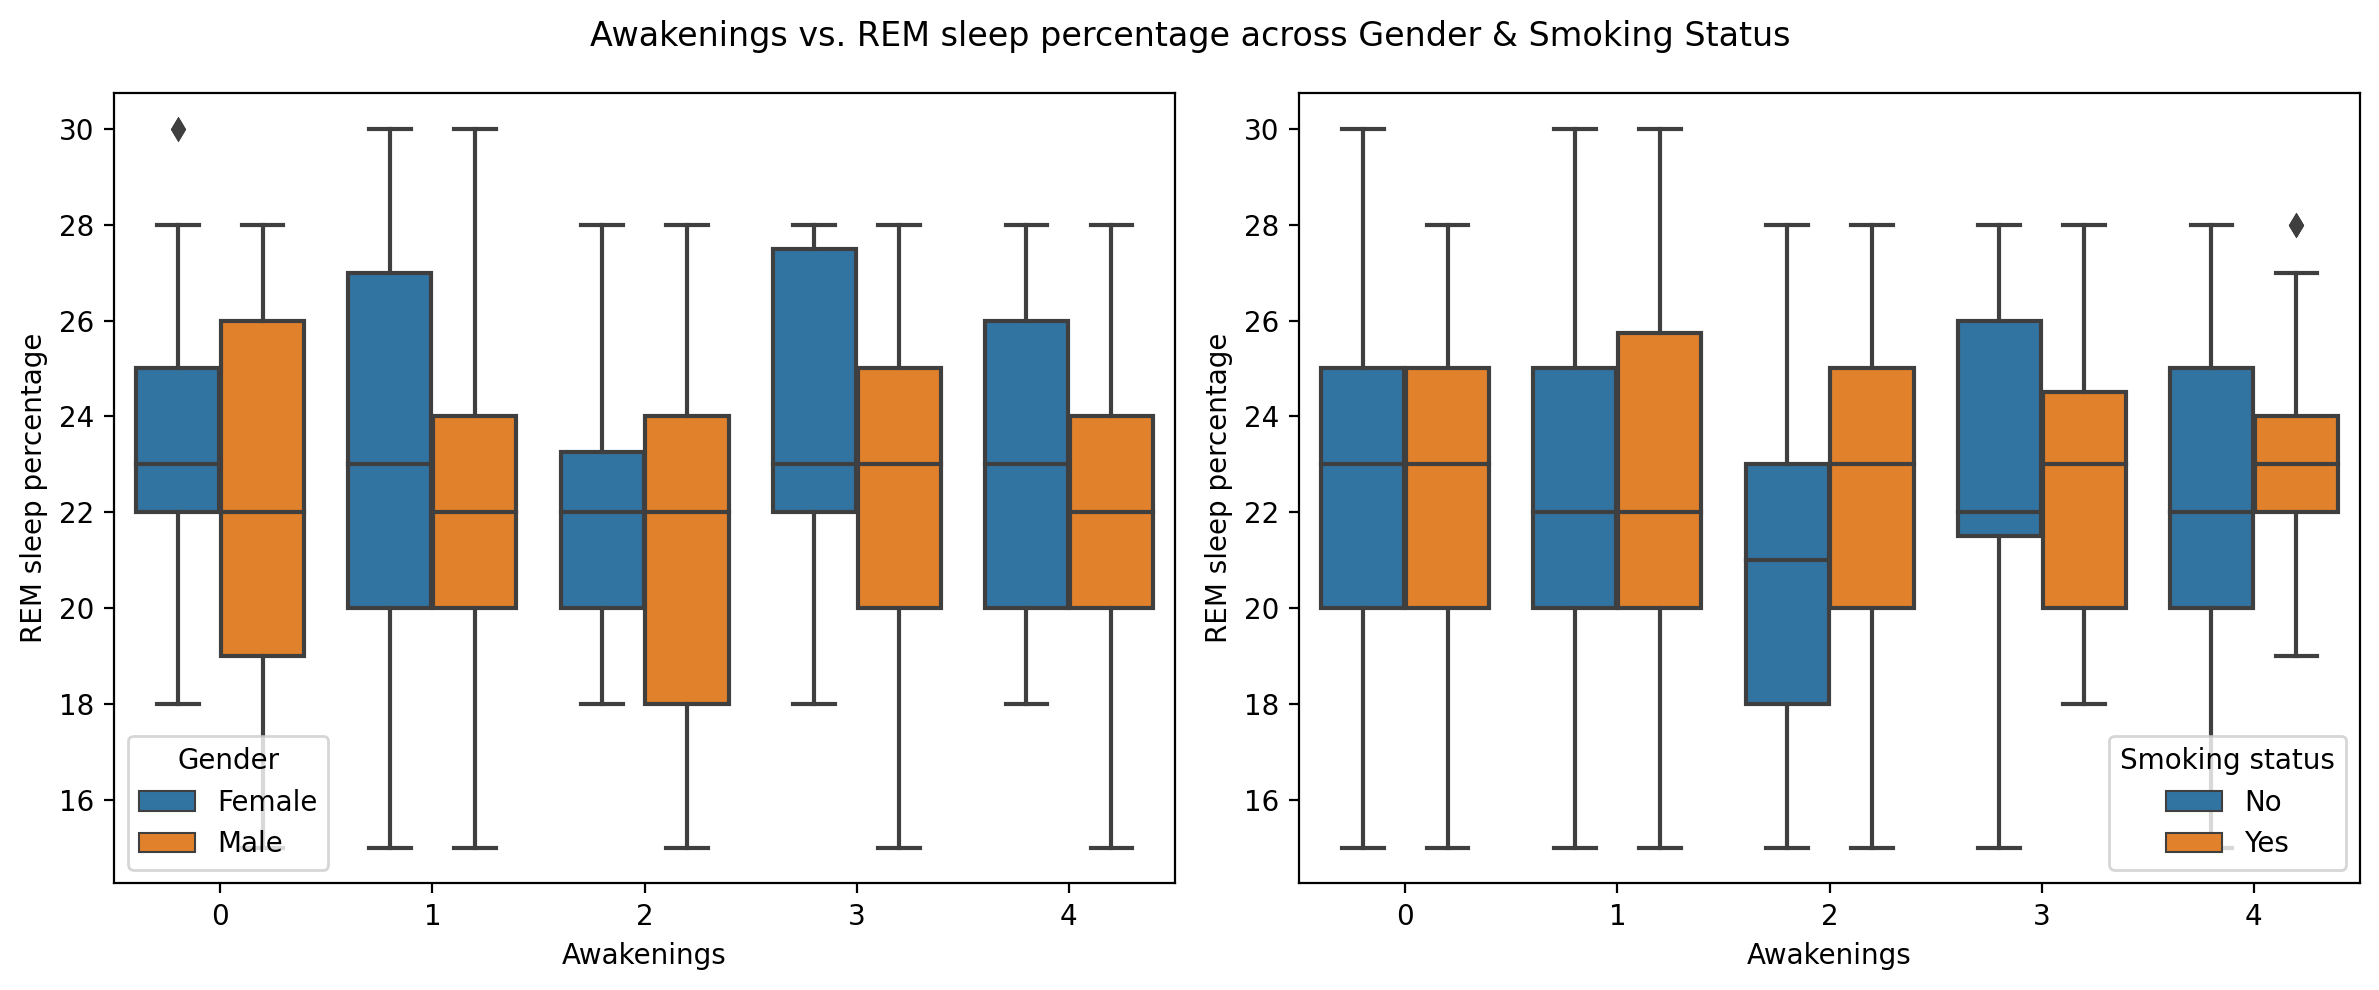

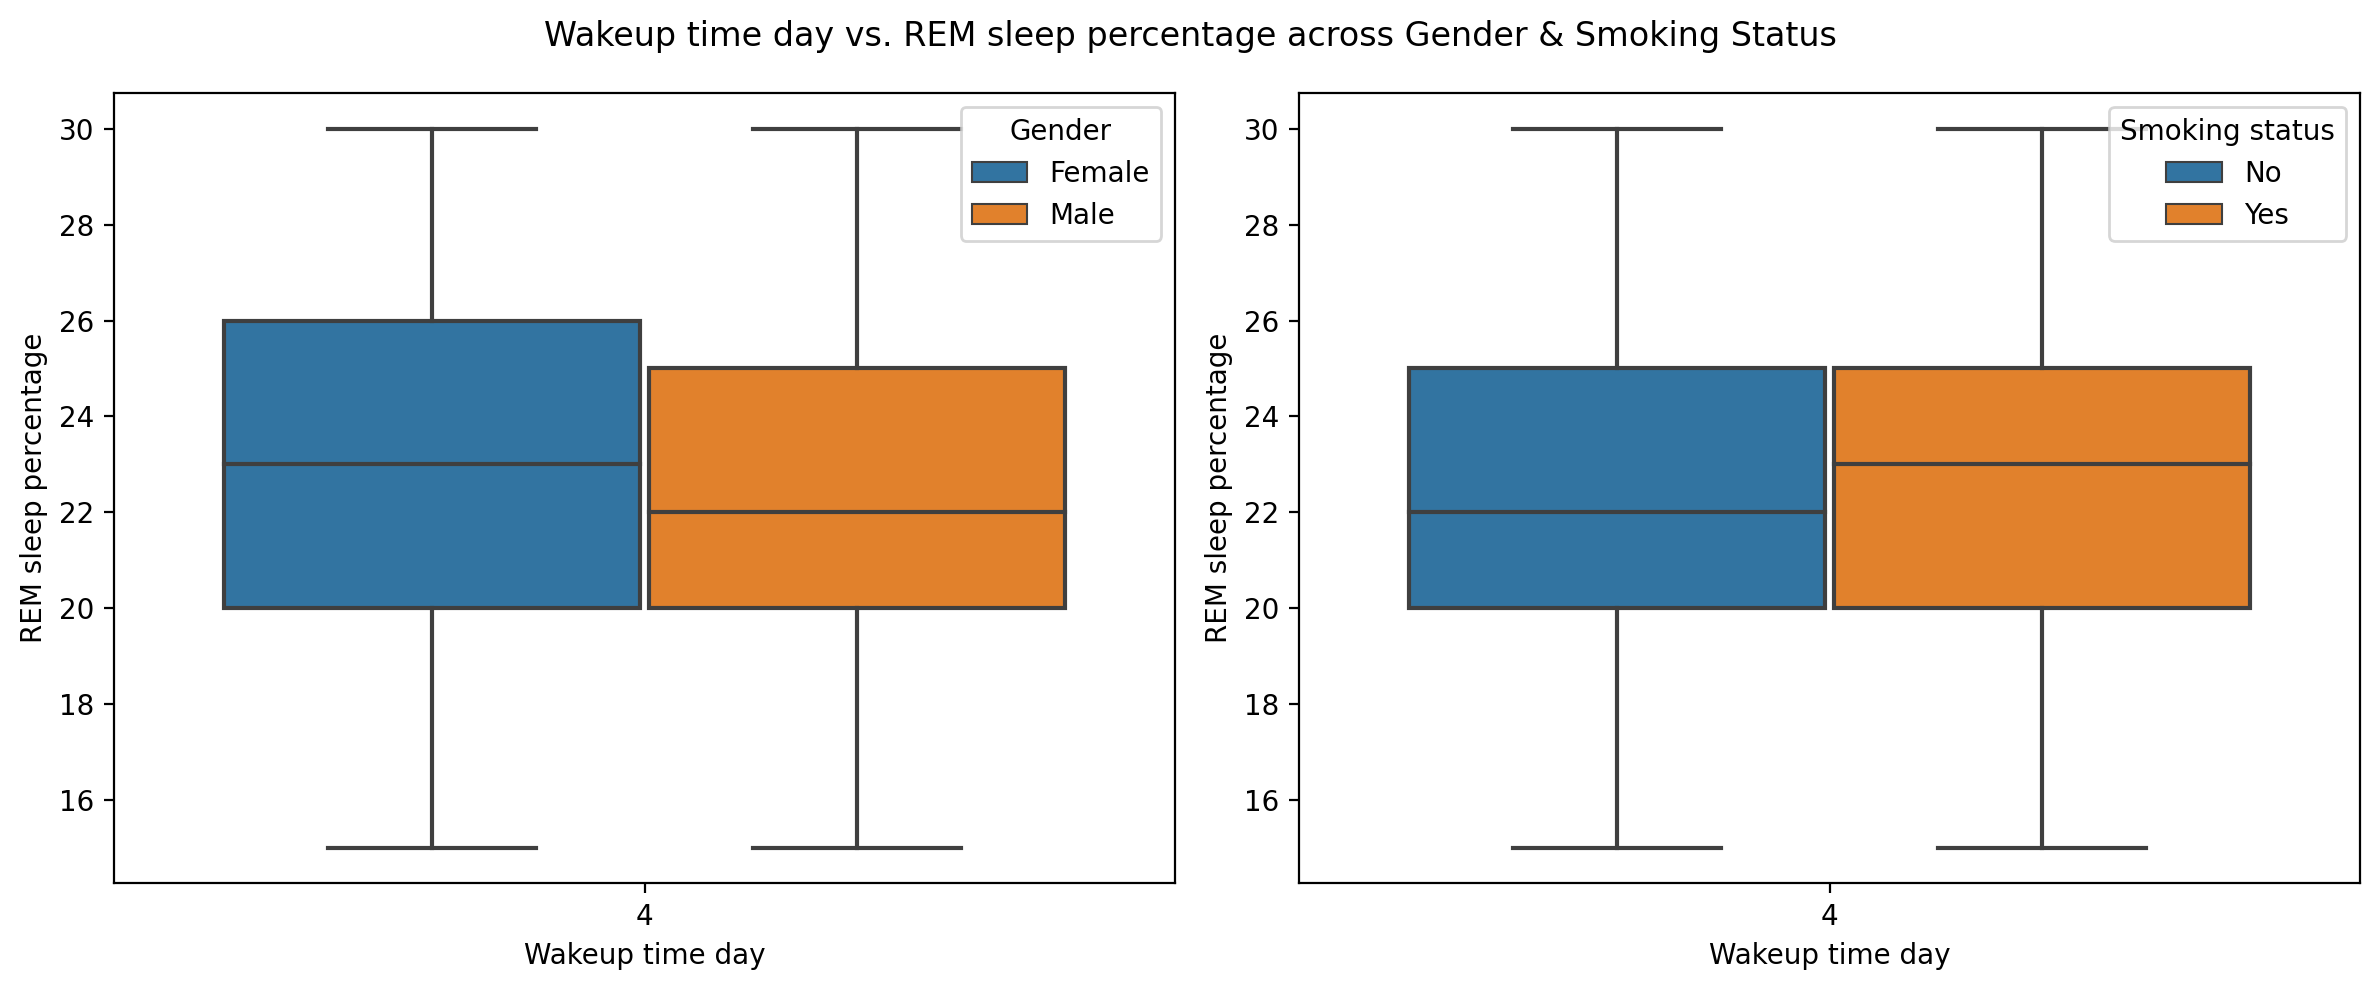

Deep sleep percentage
------------------------------------------


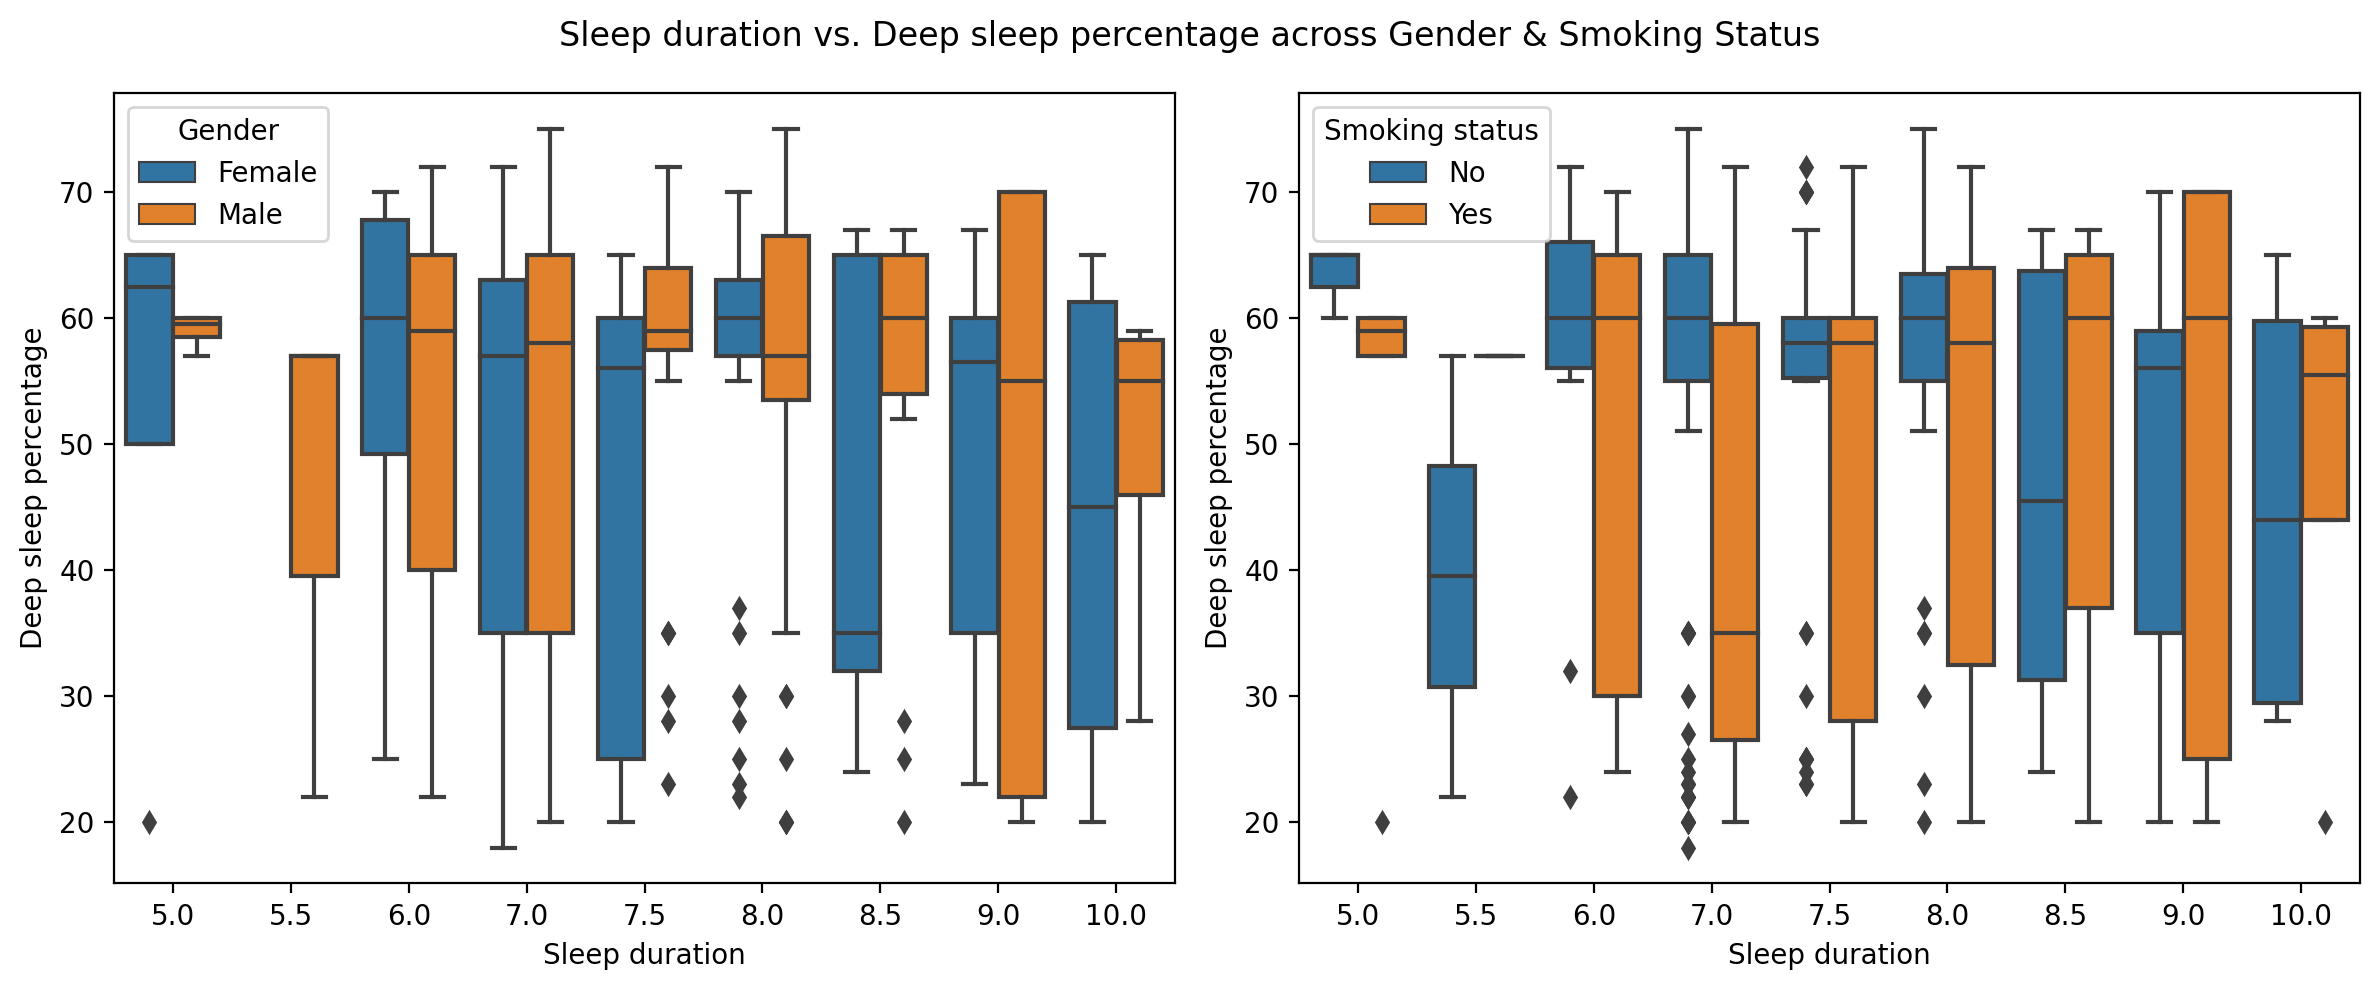

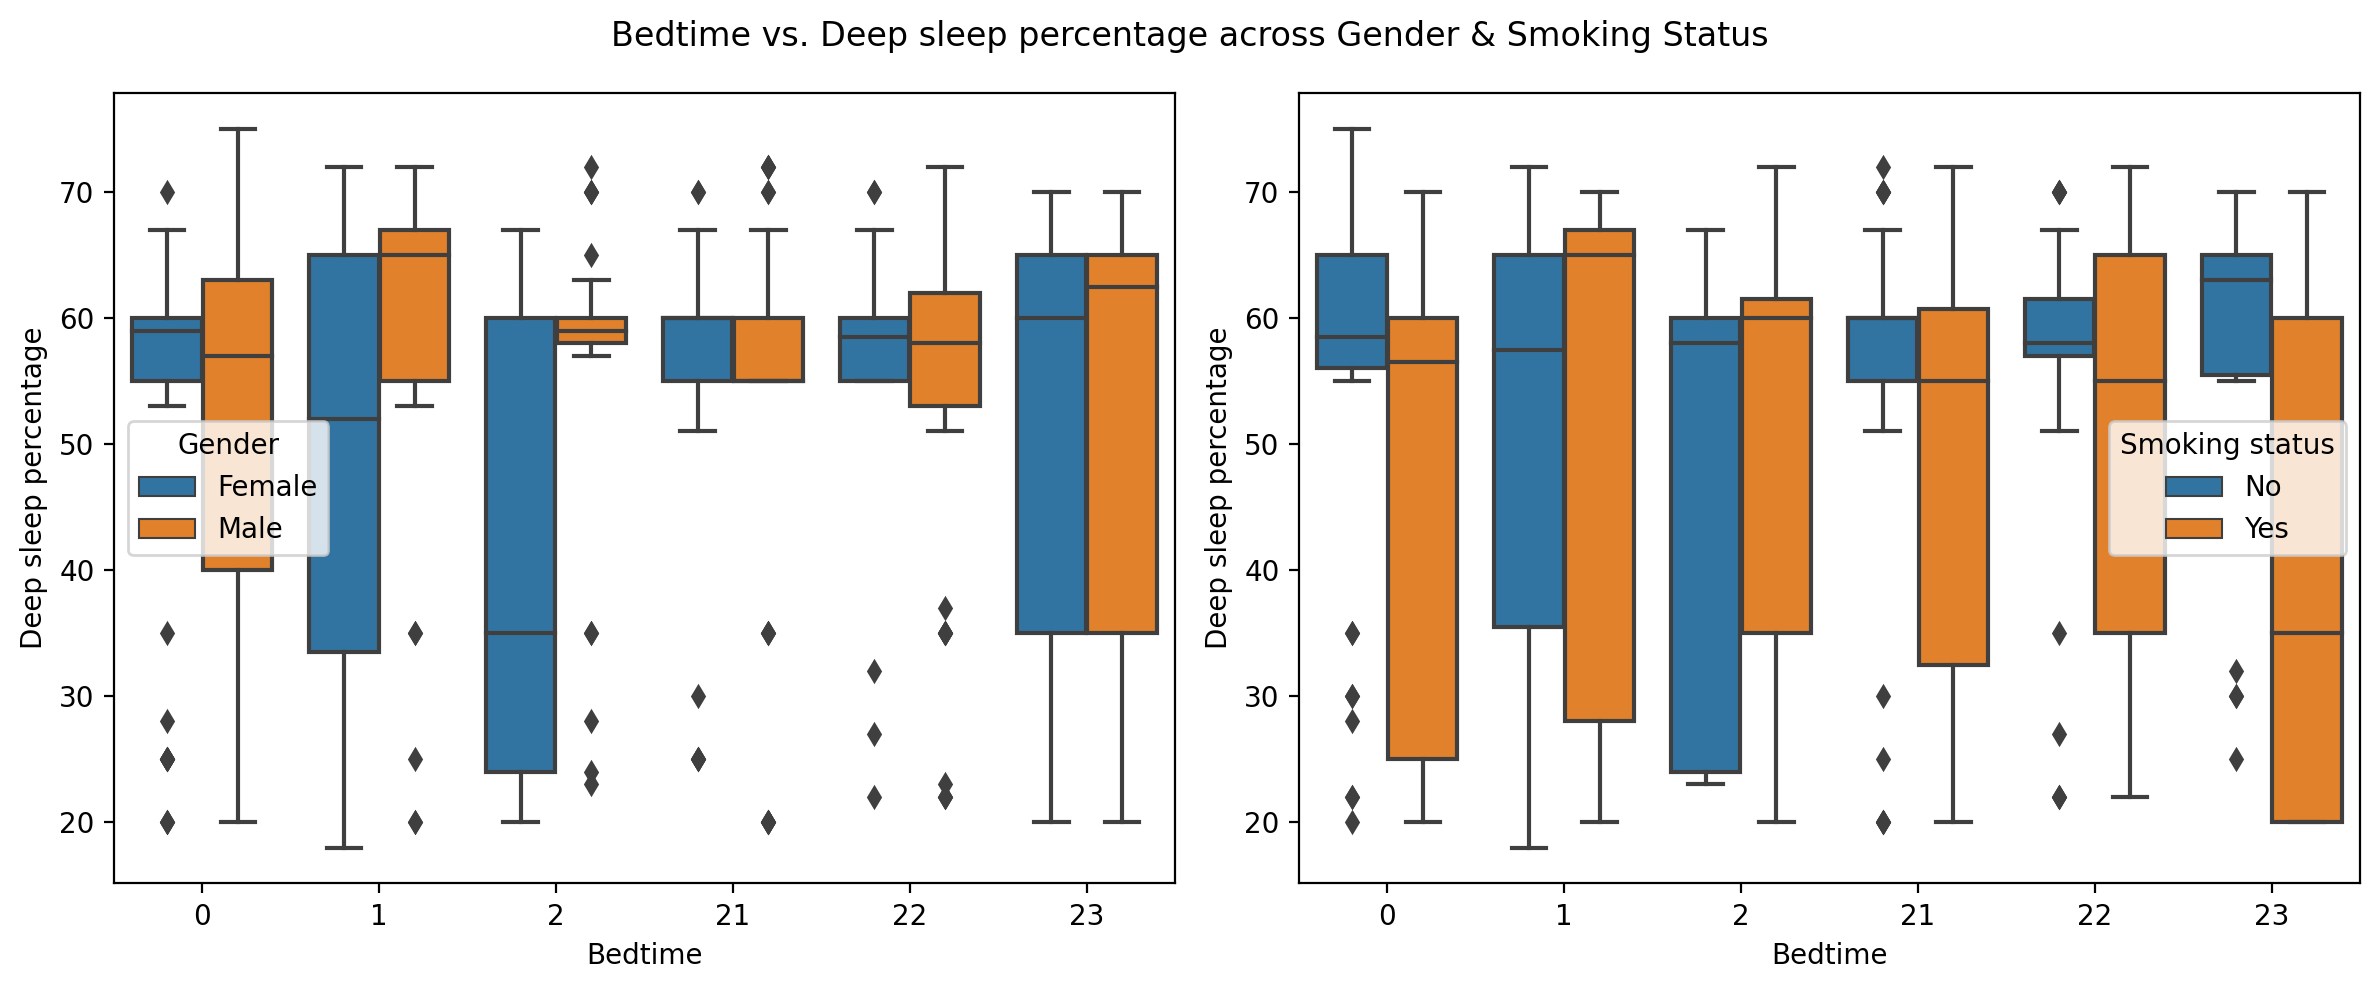

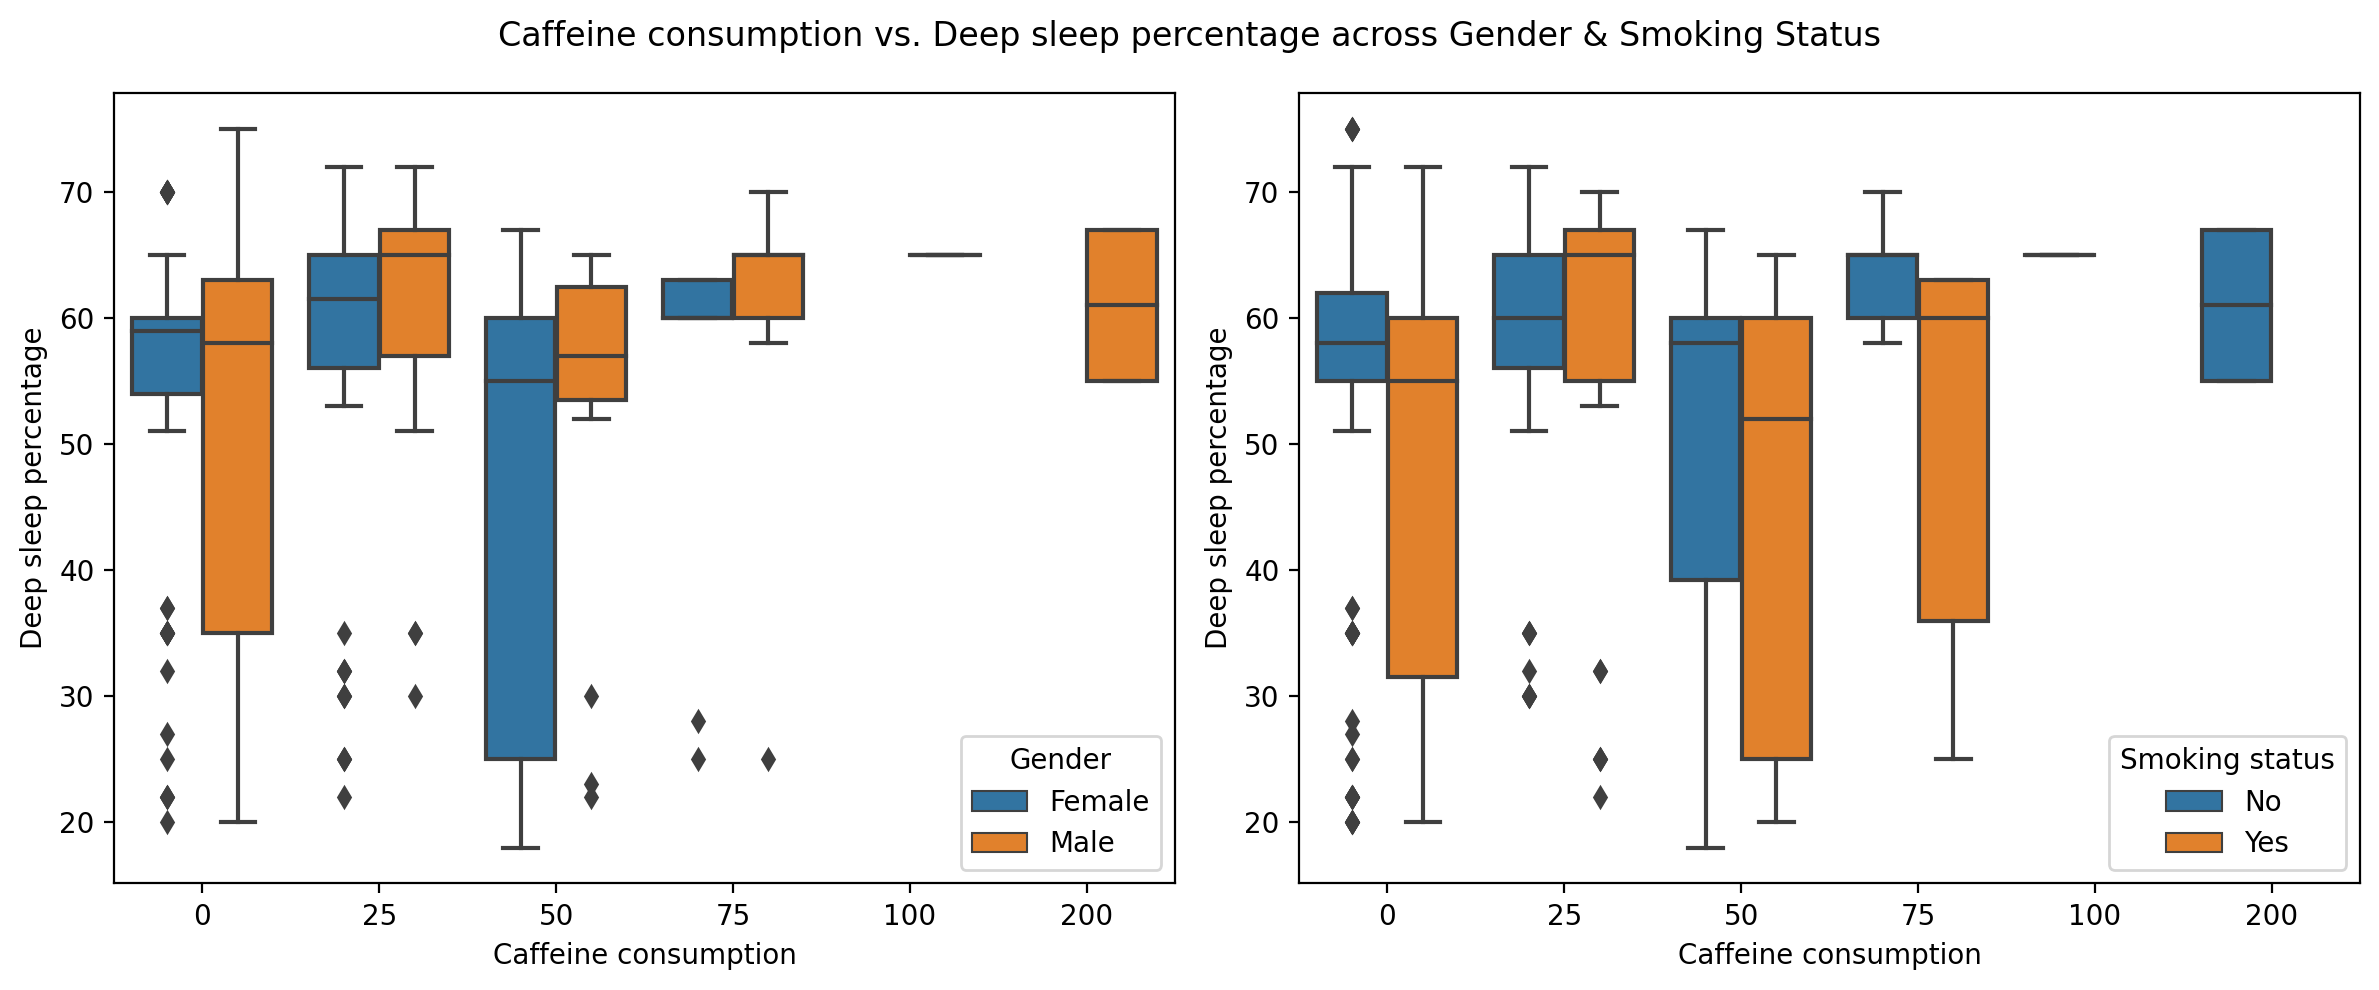

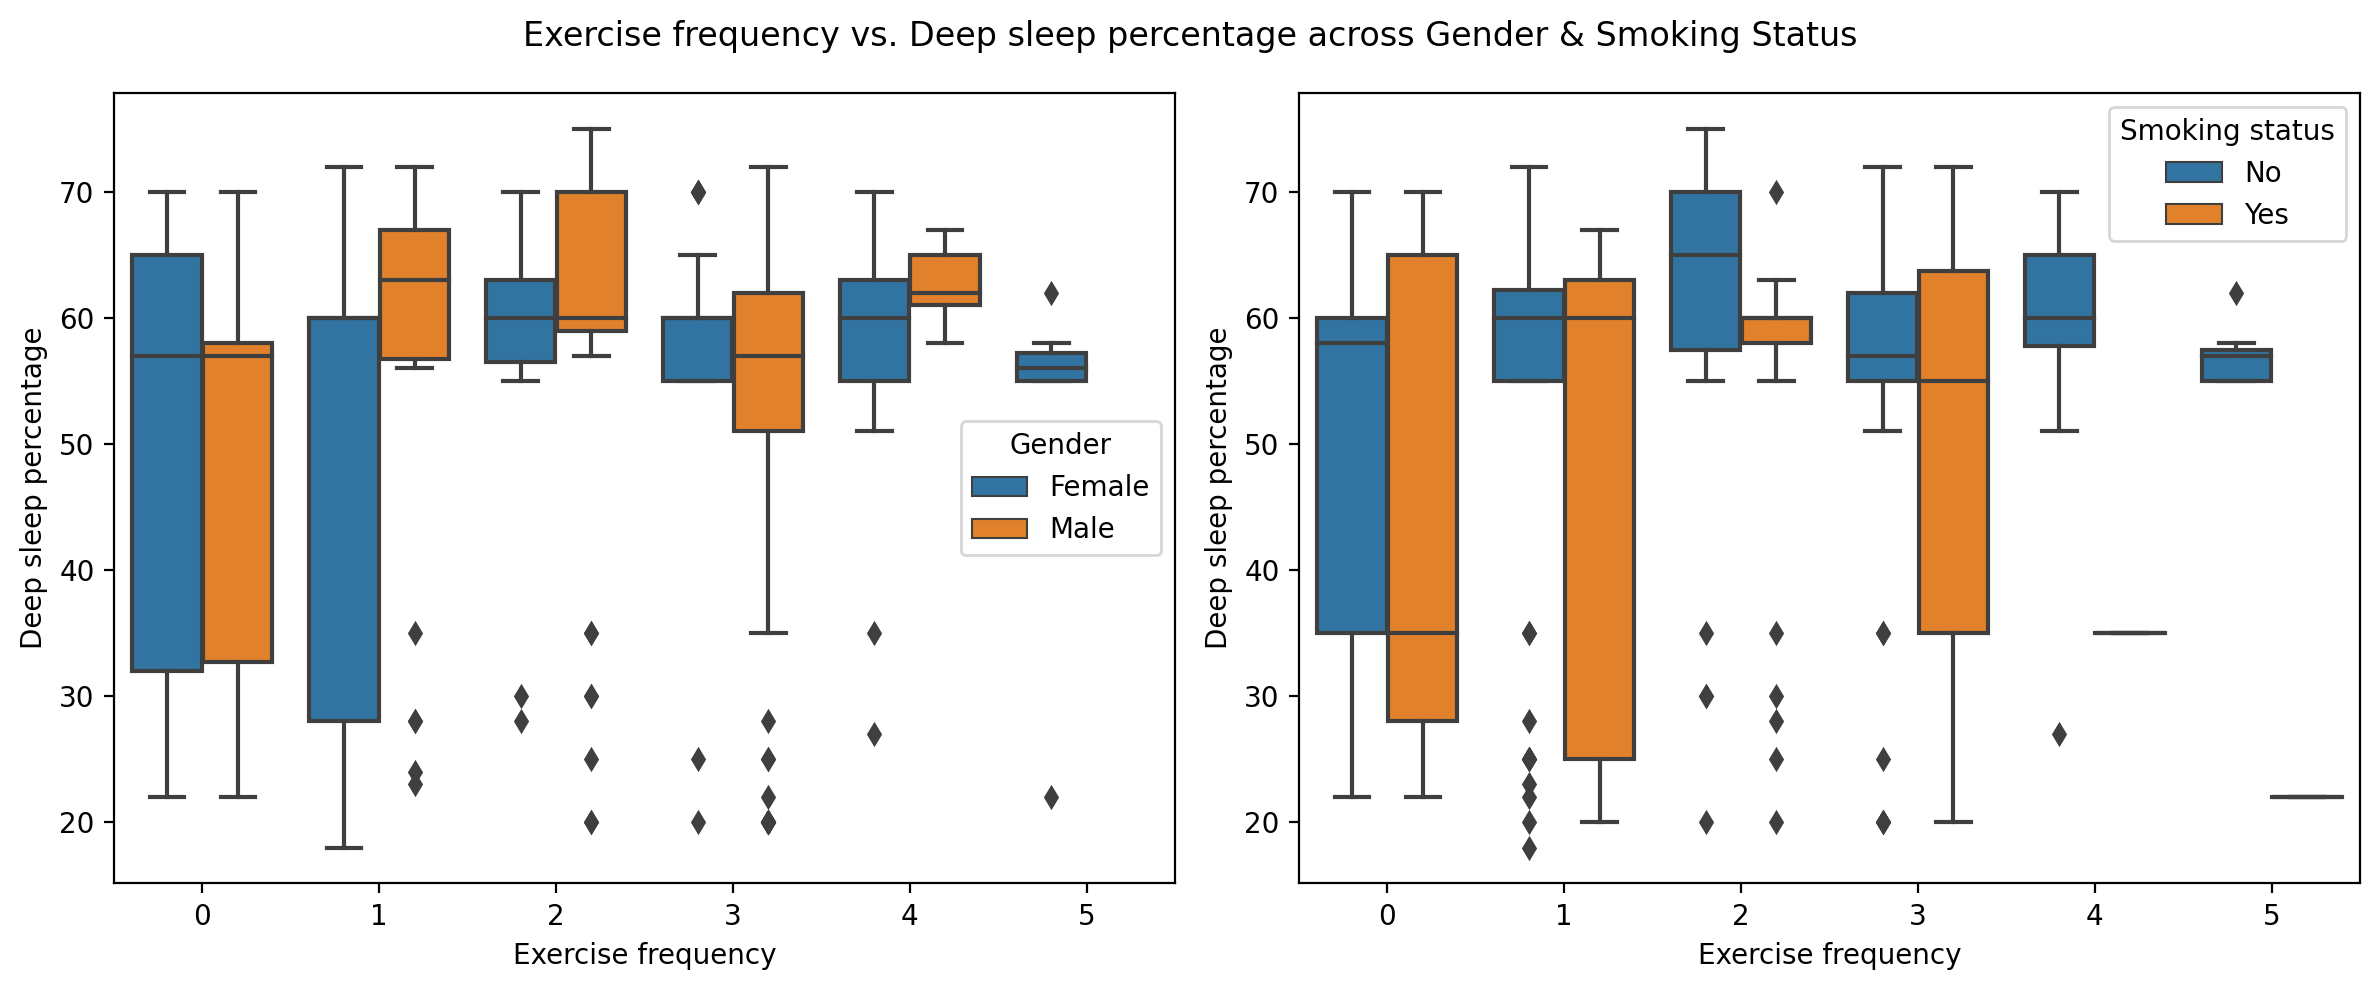

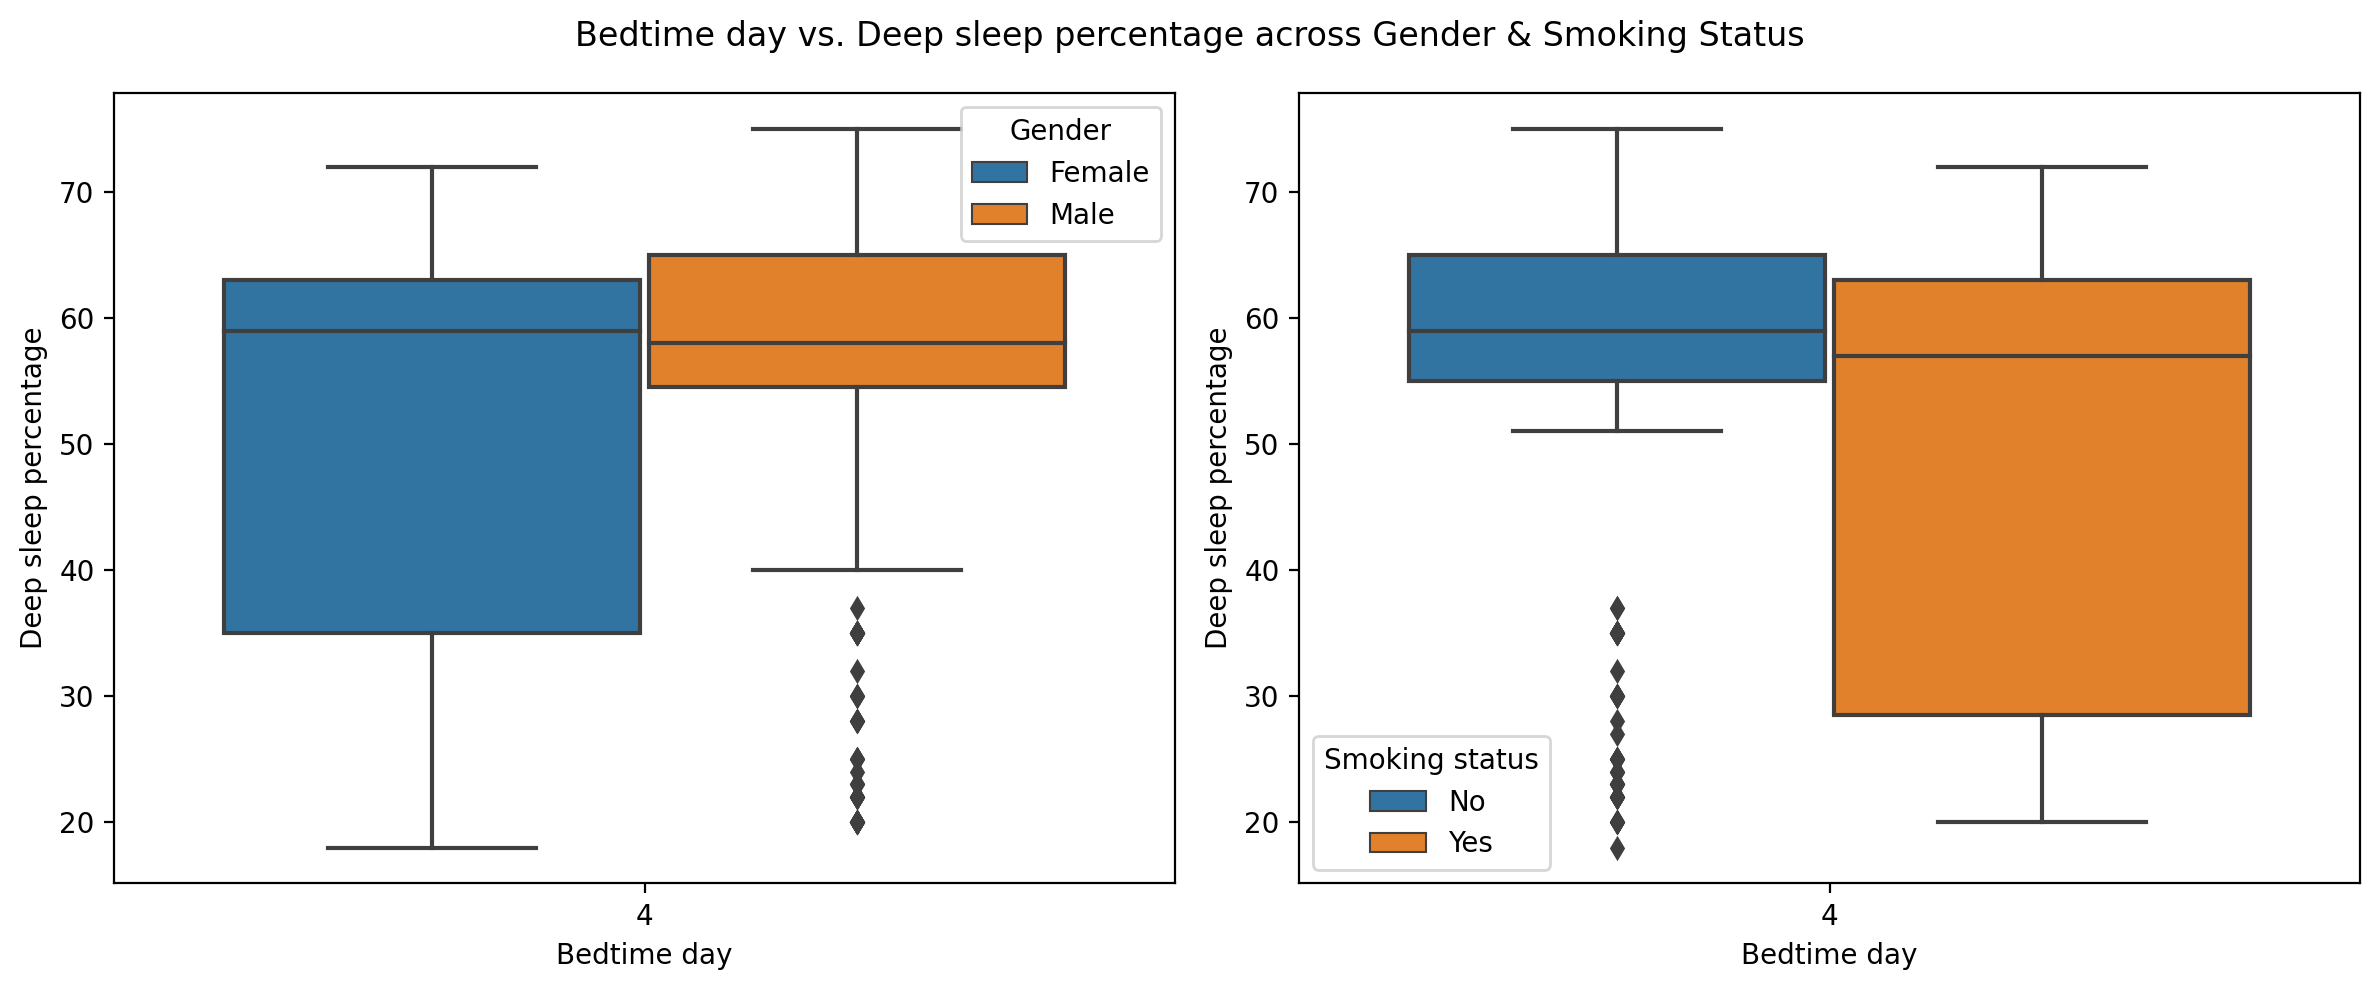

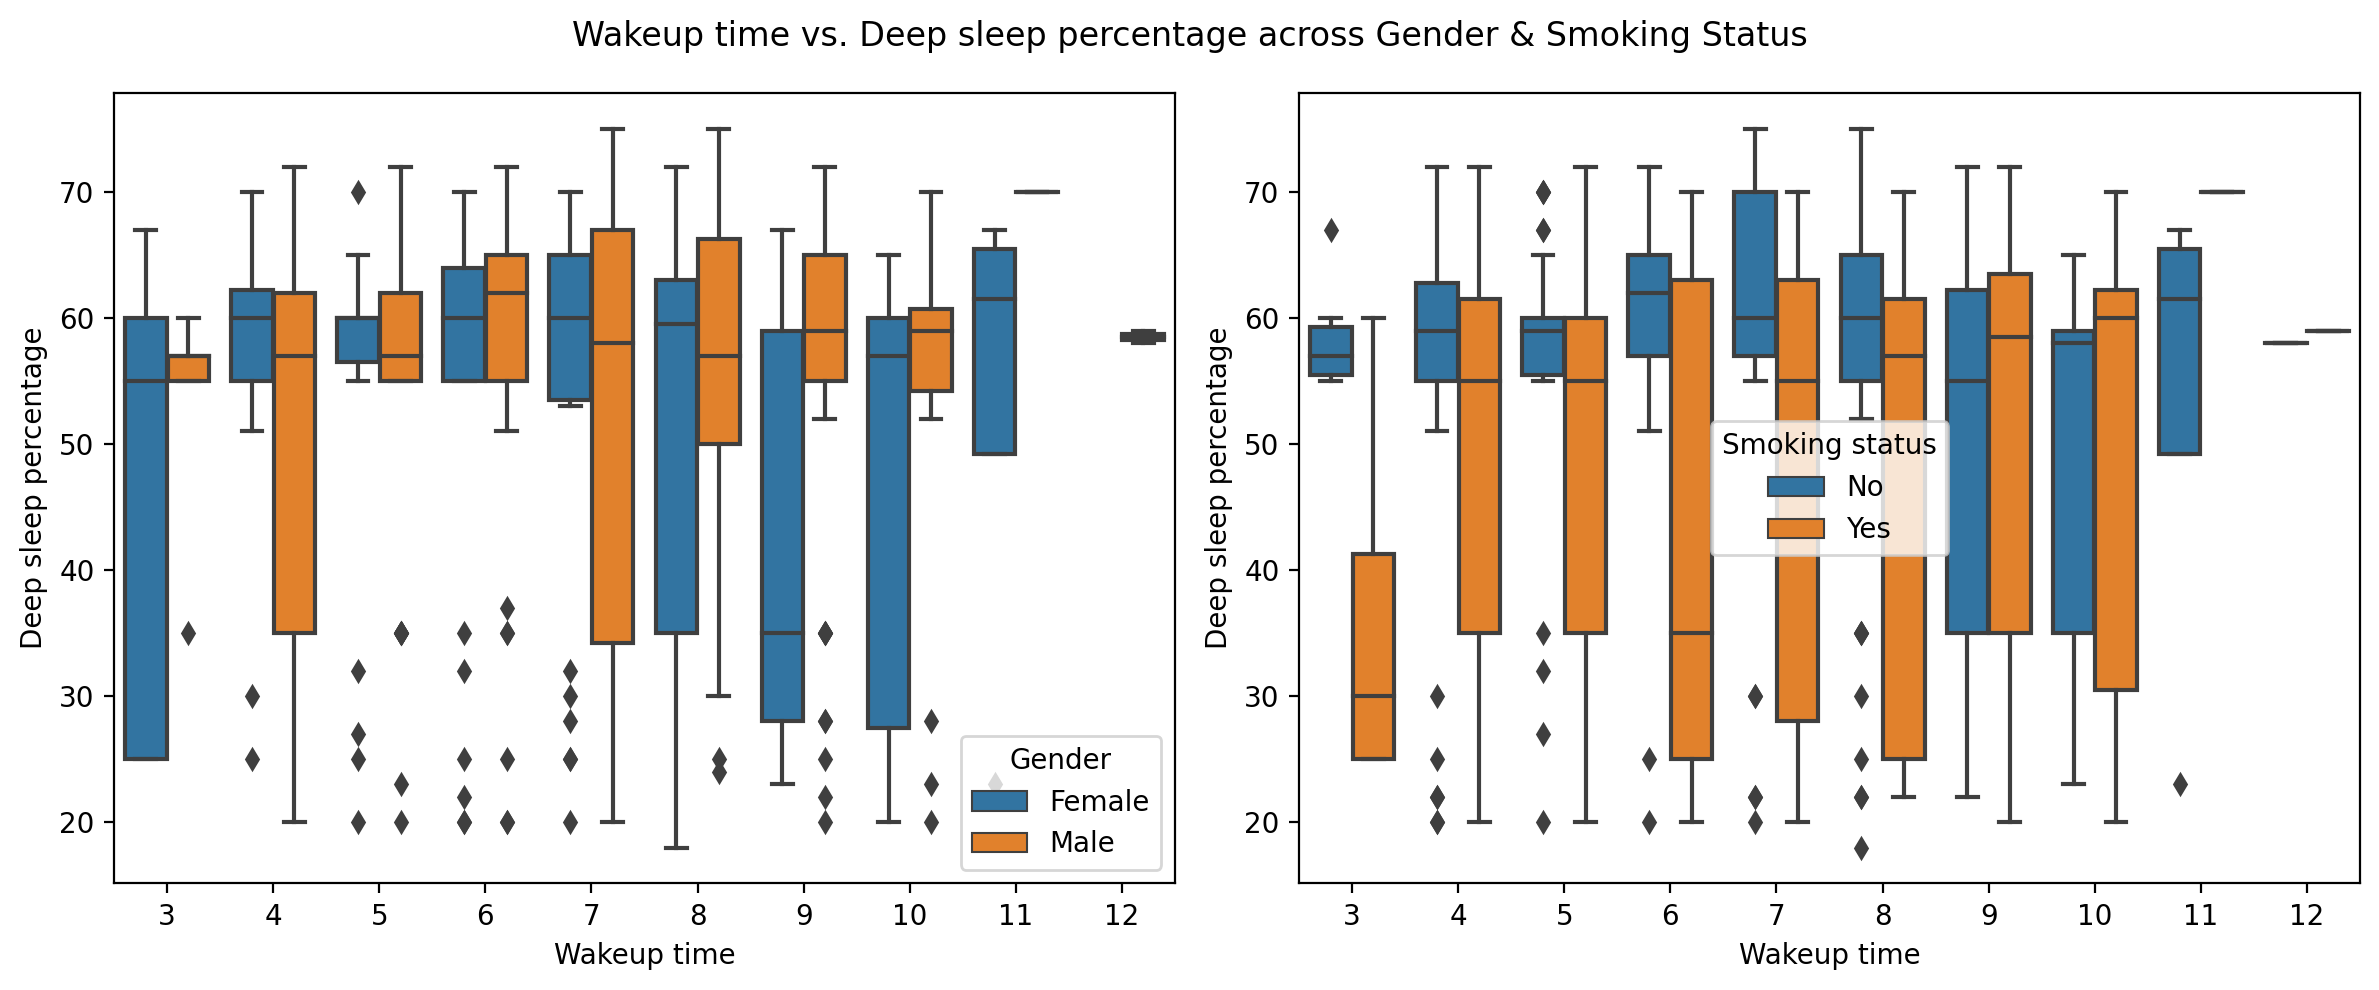

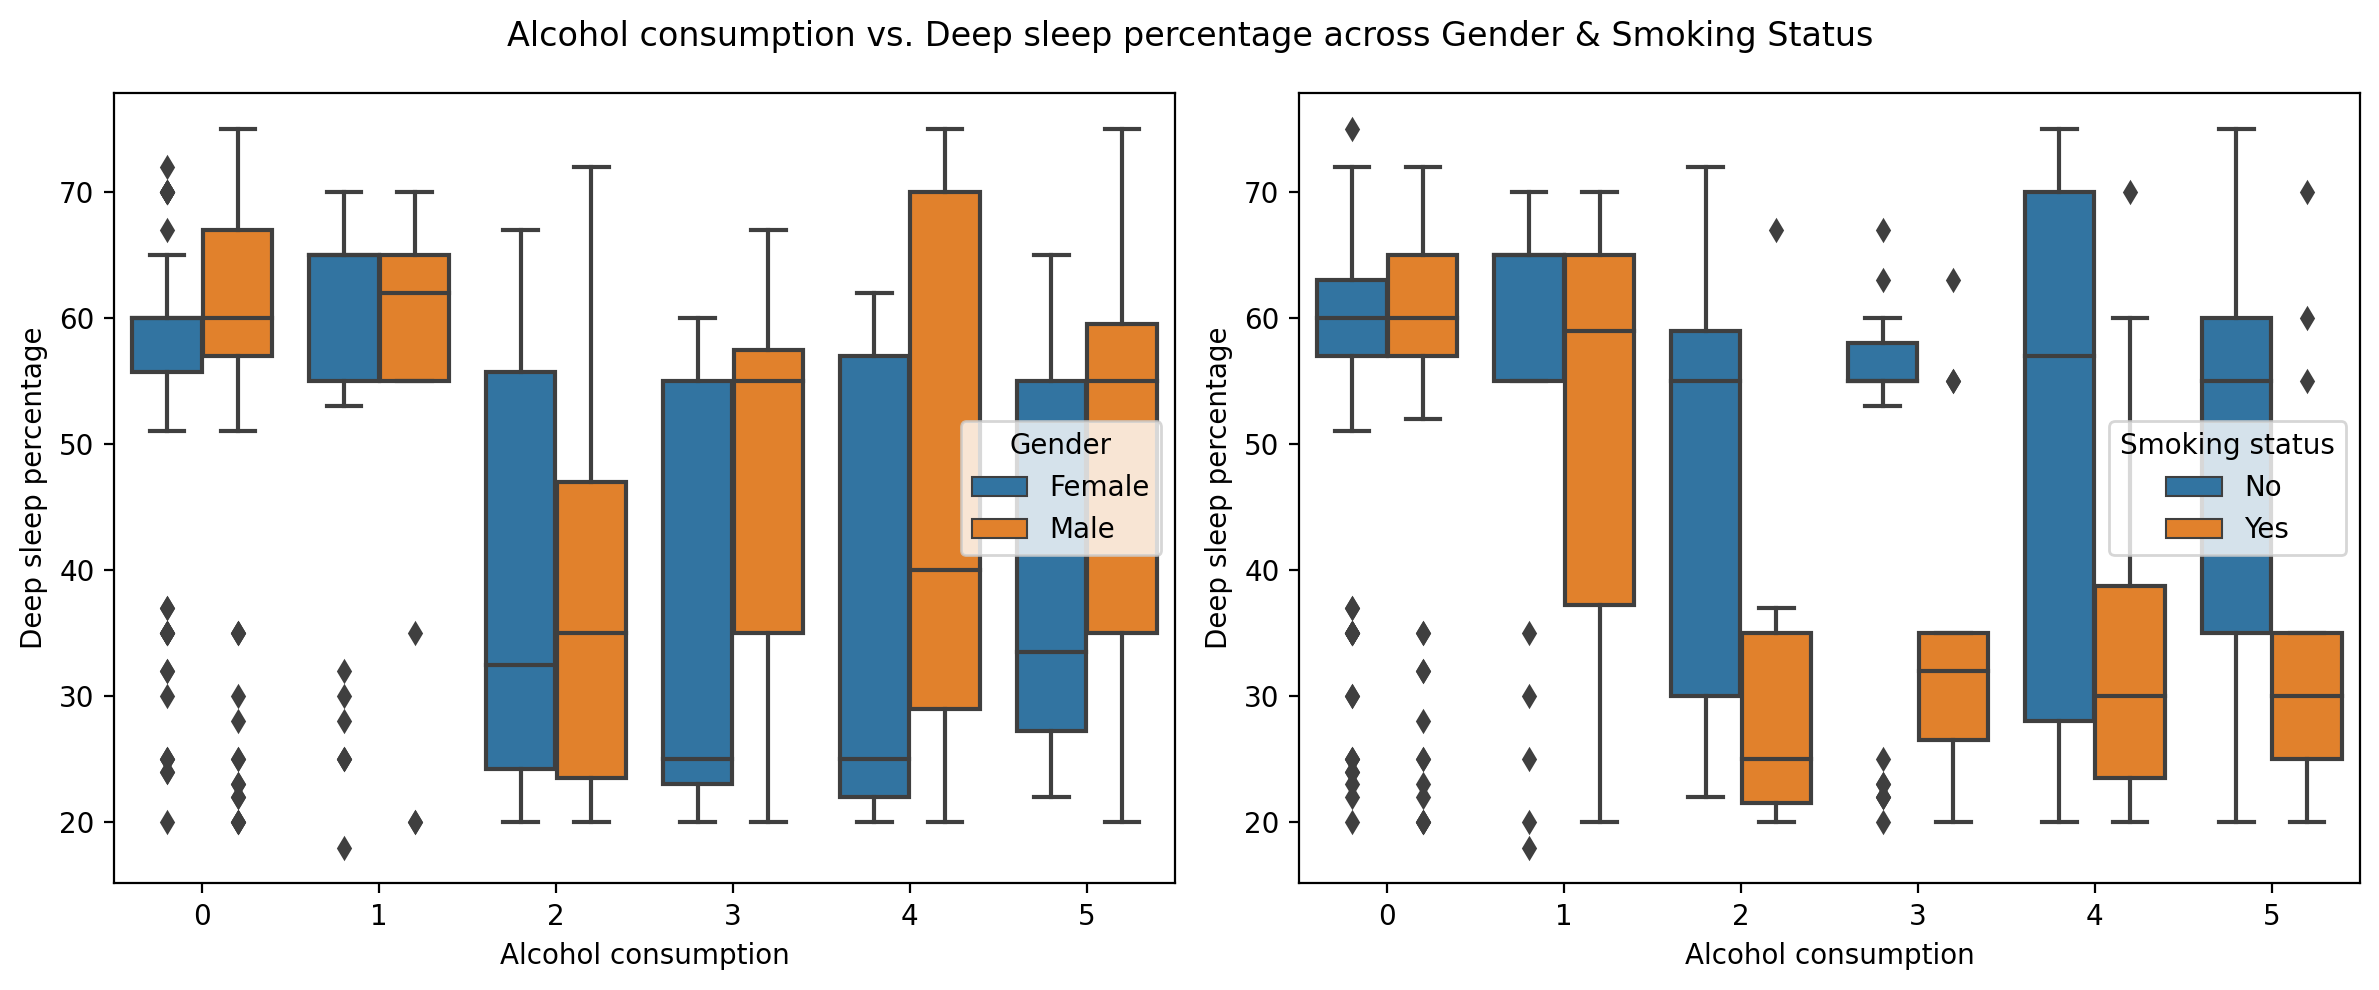

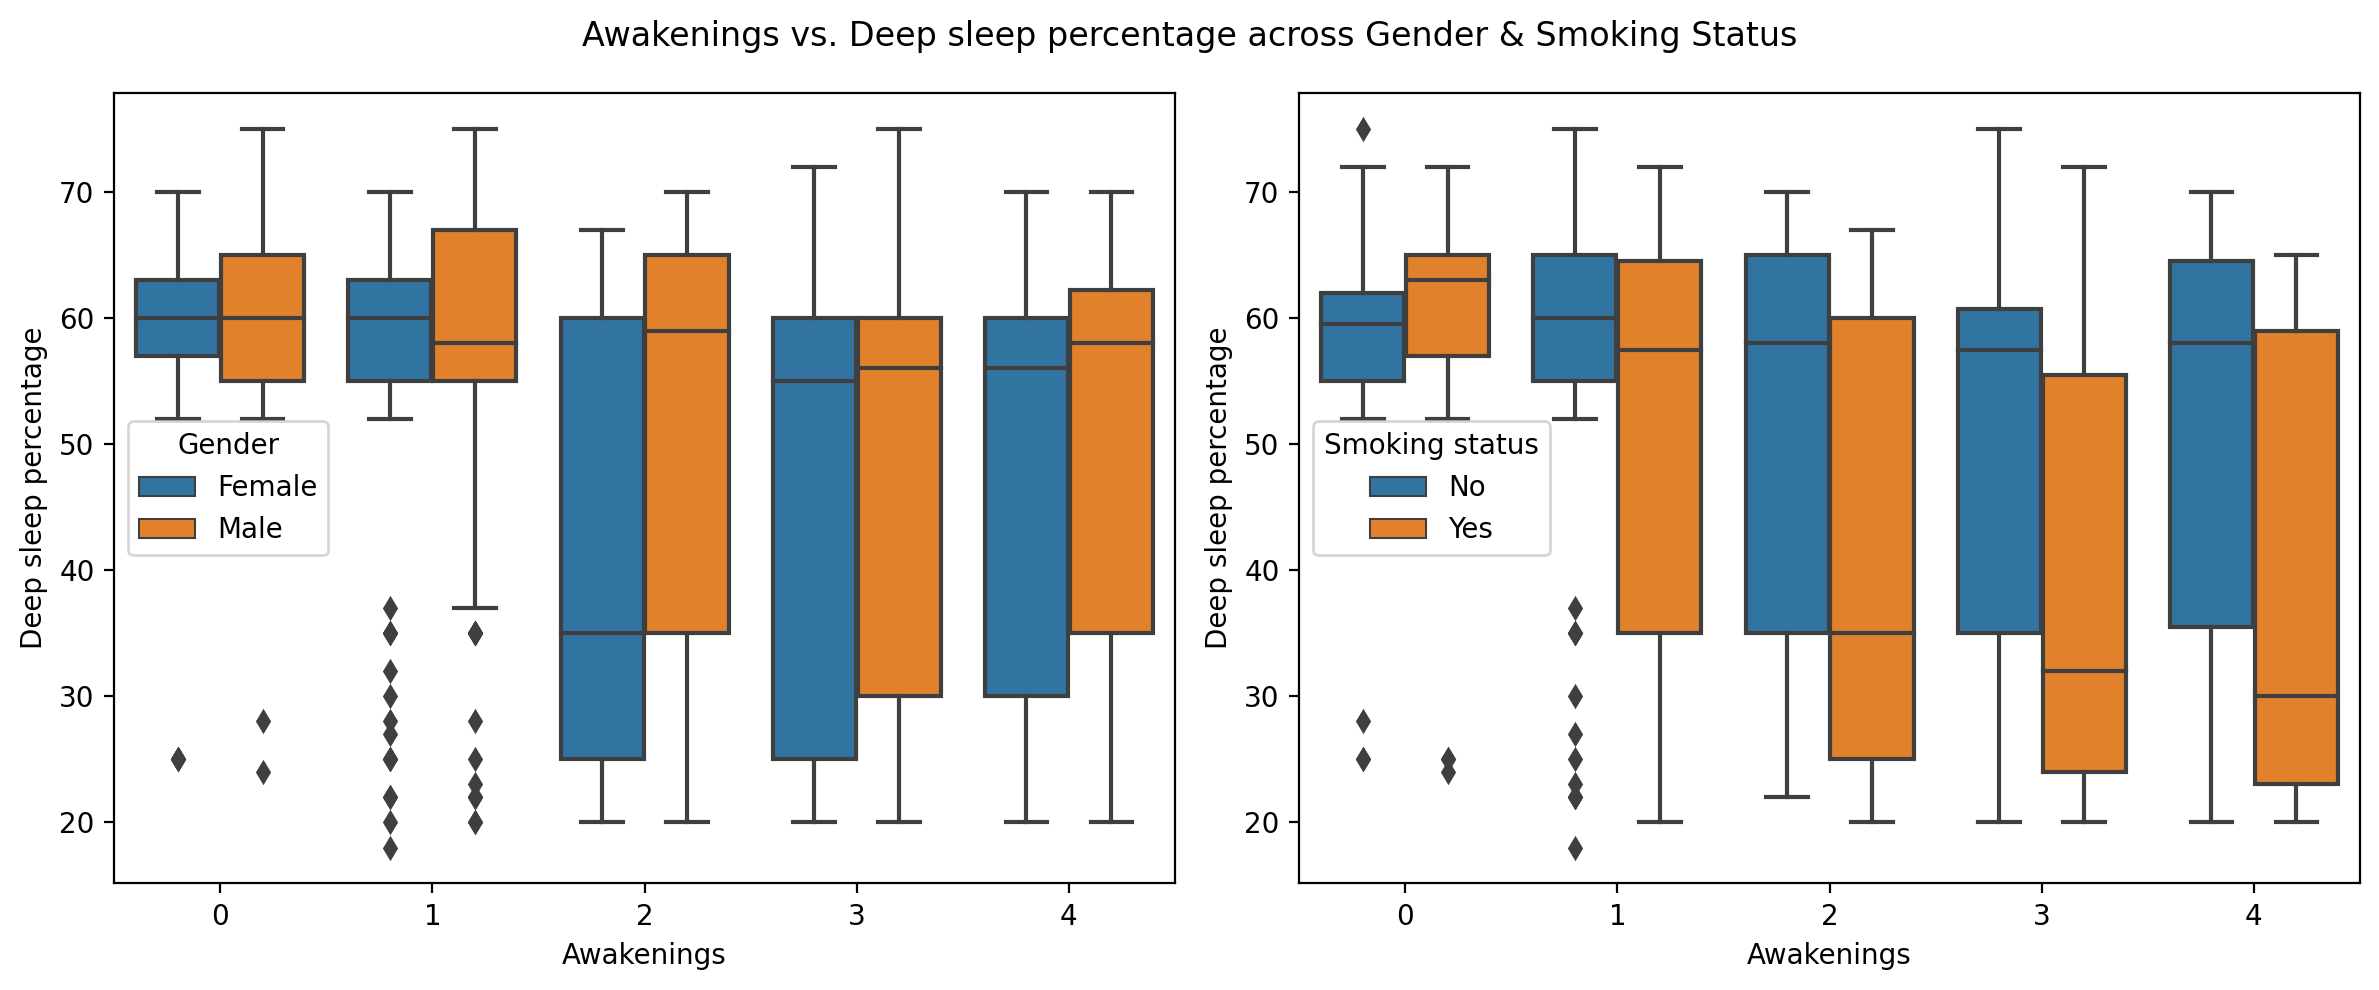

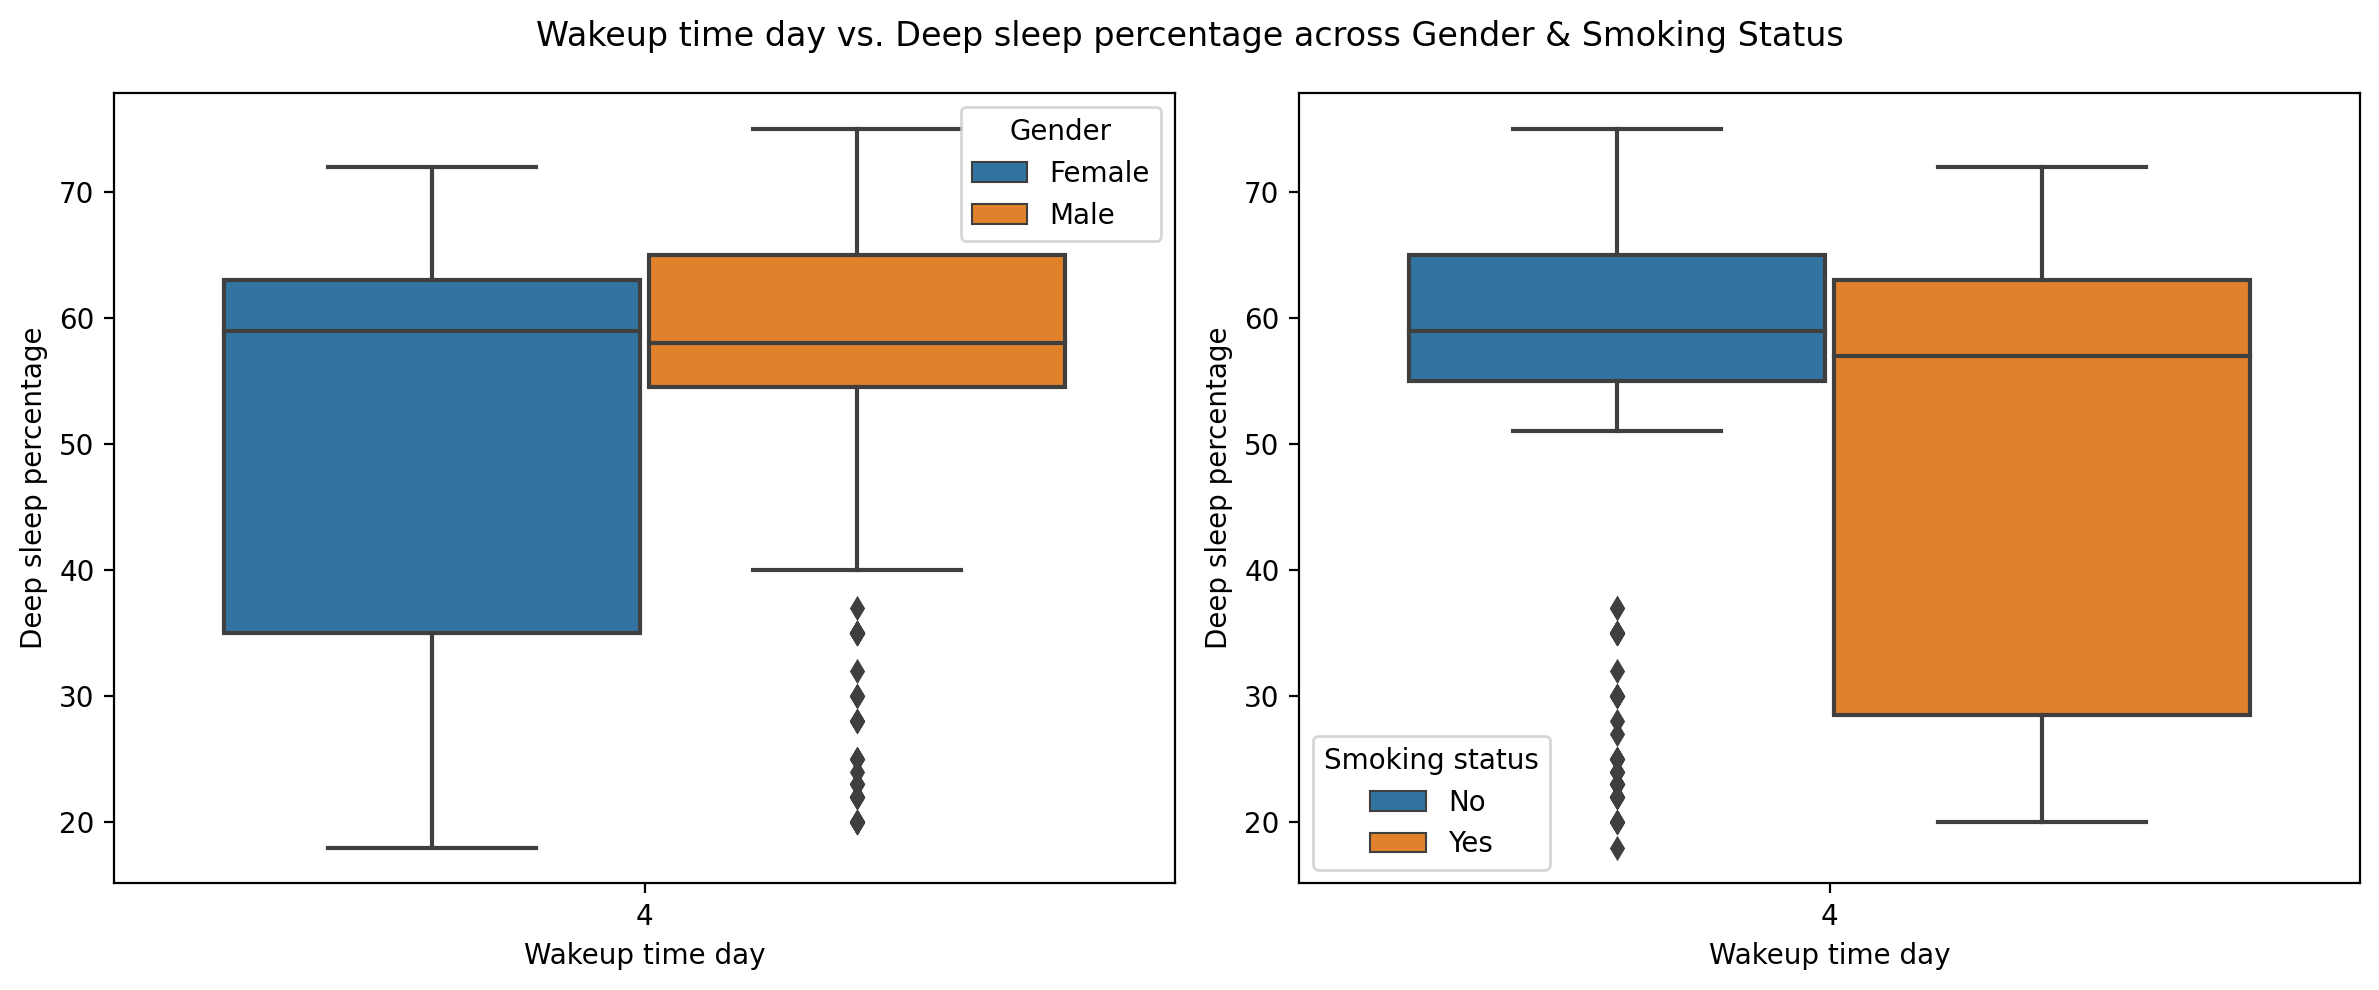

Light sleep percentage
------------------------------------------


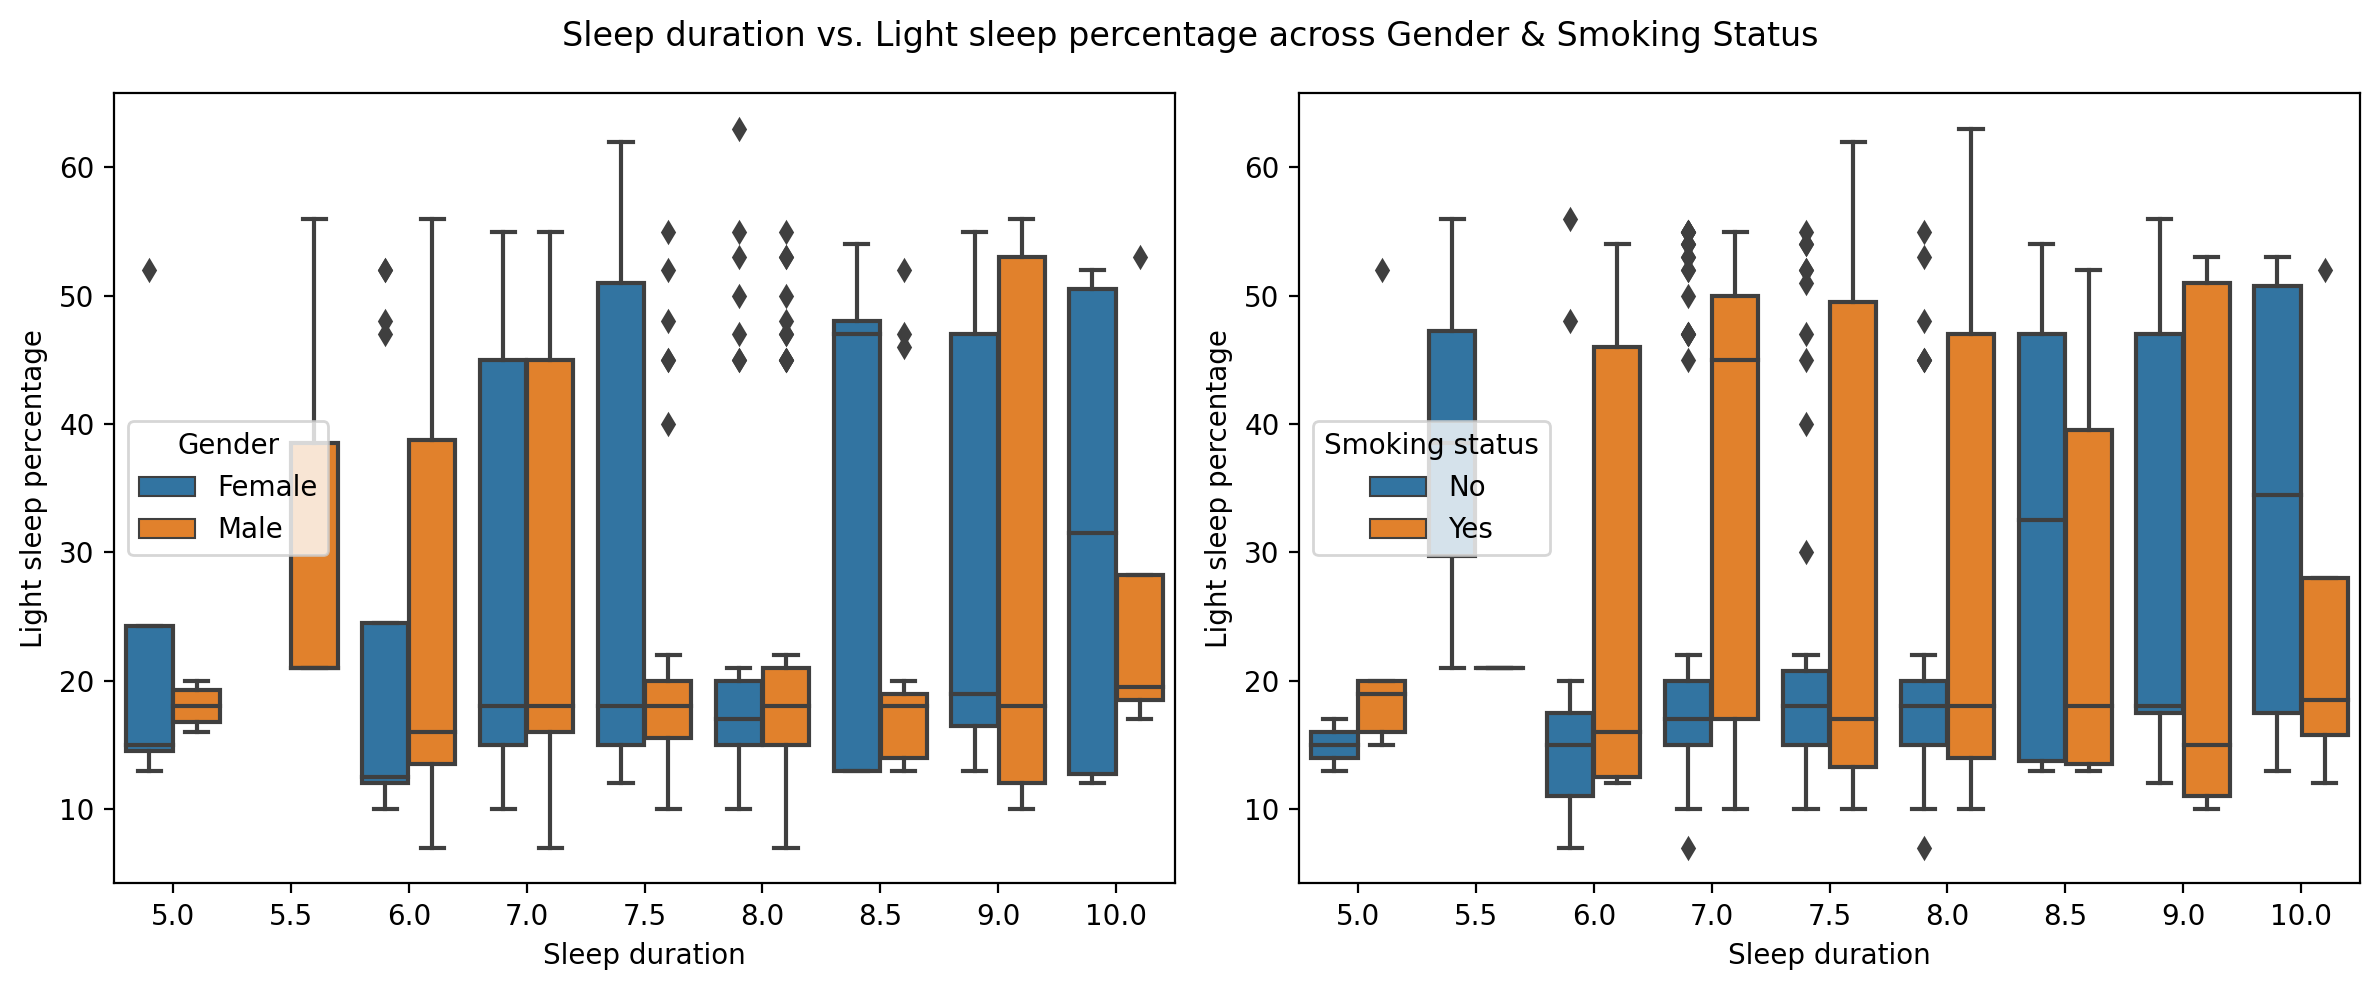

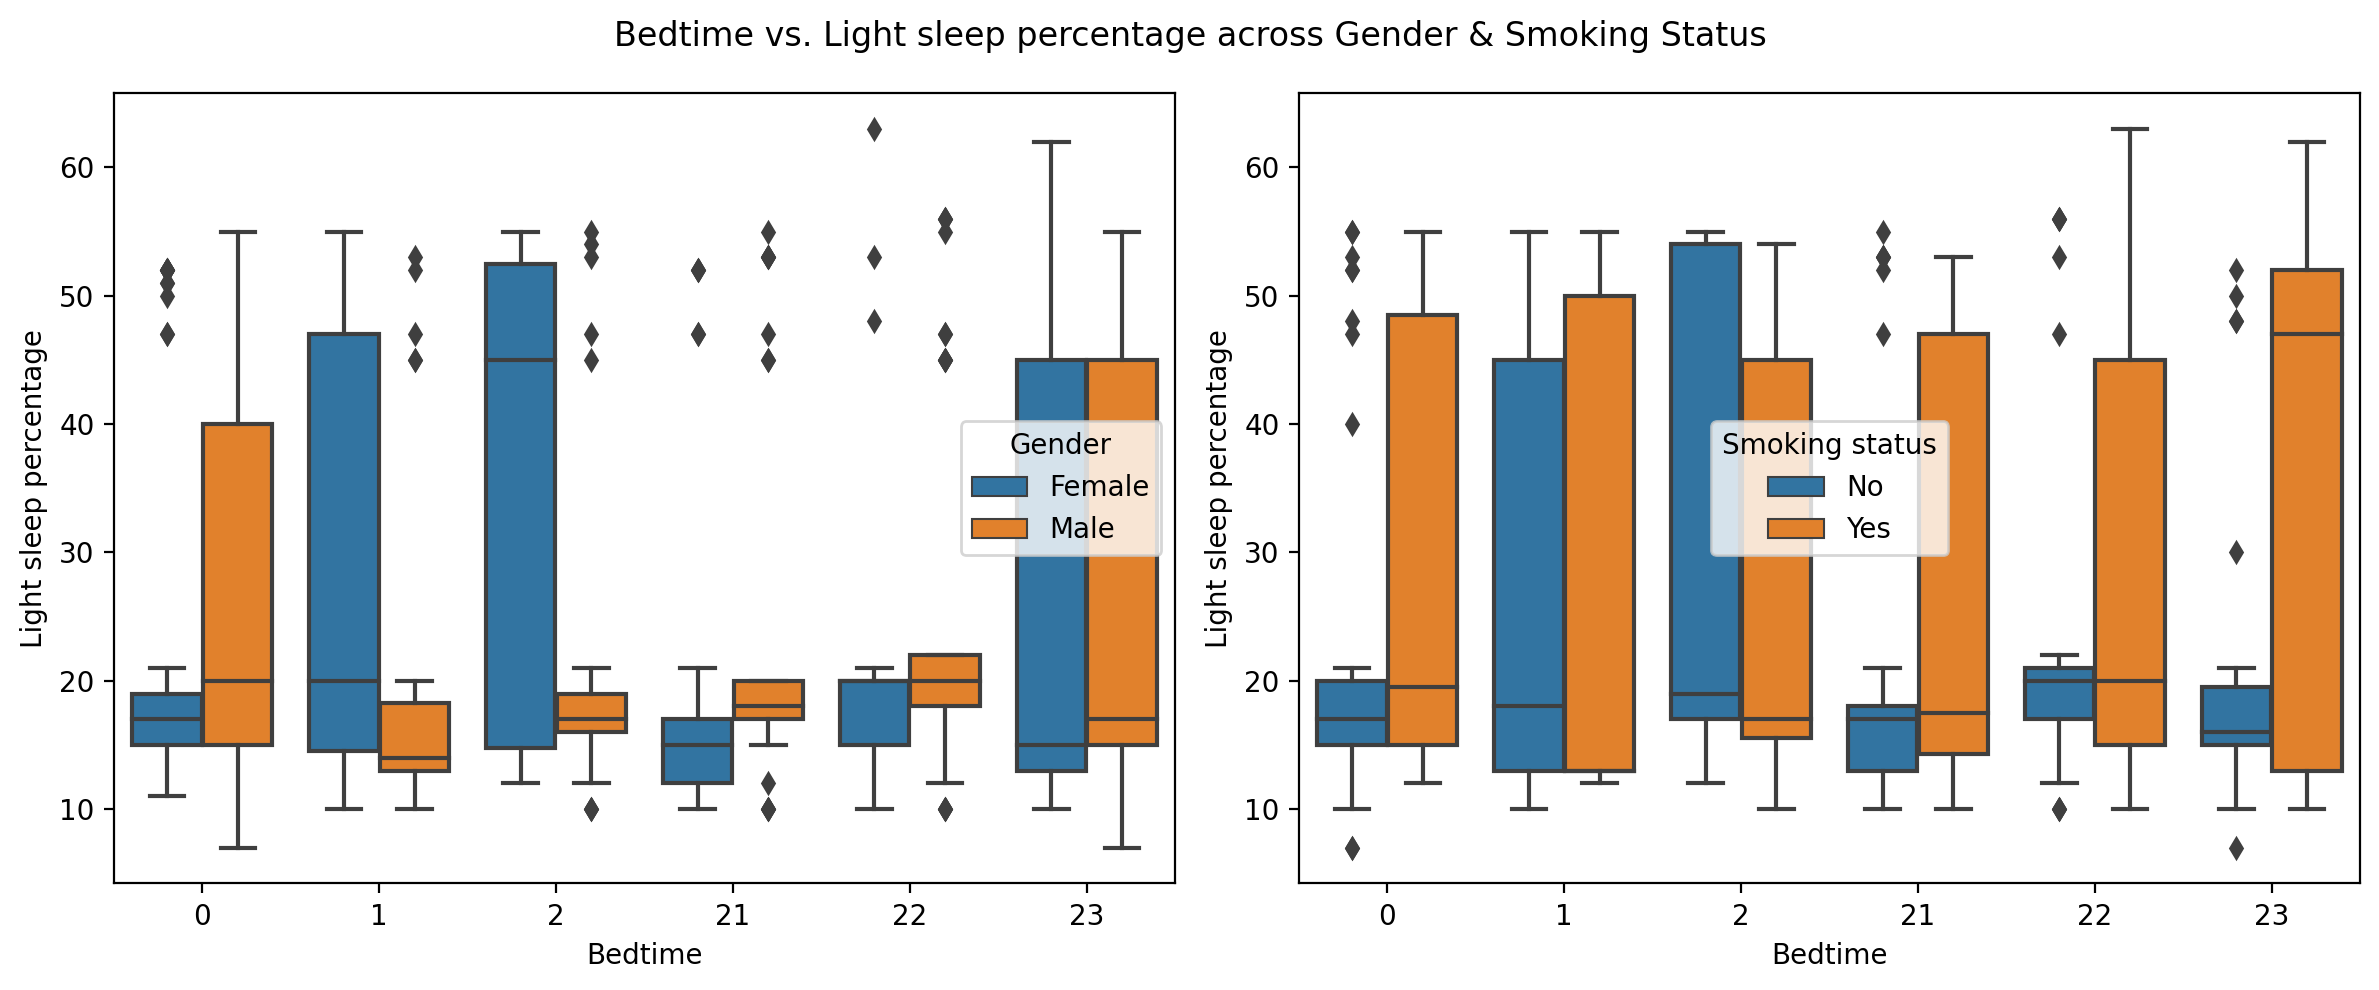

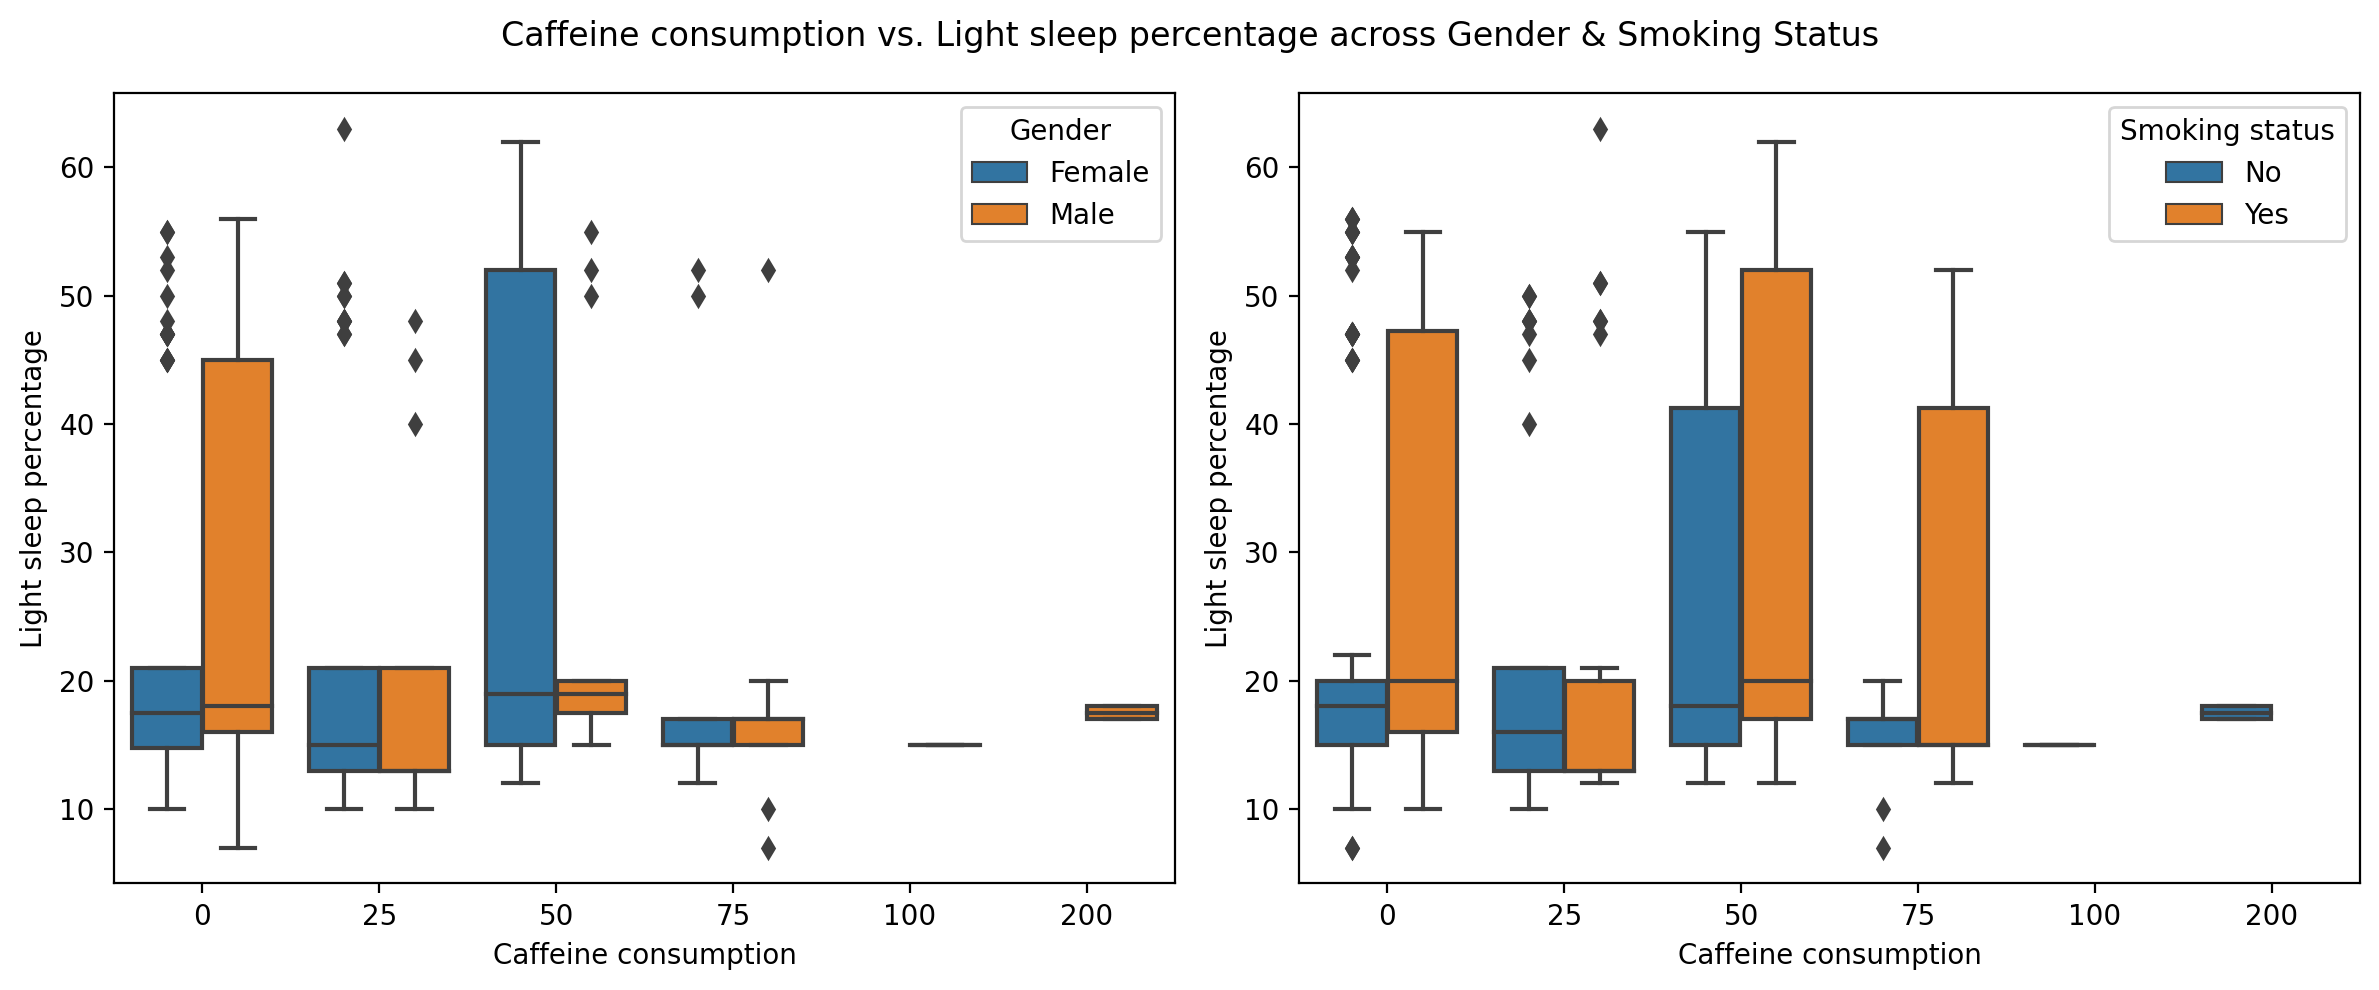

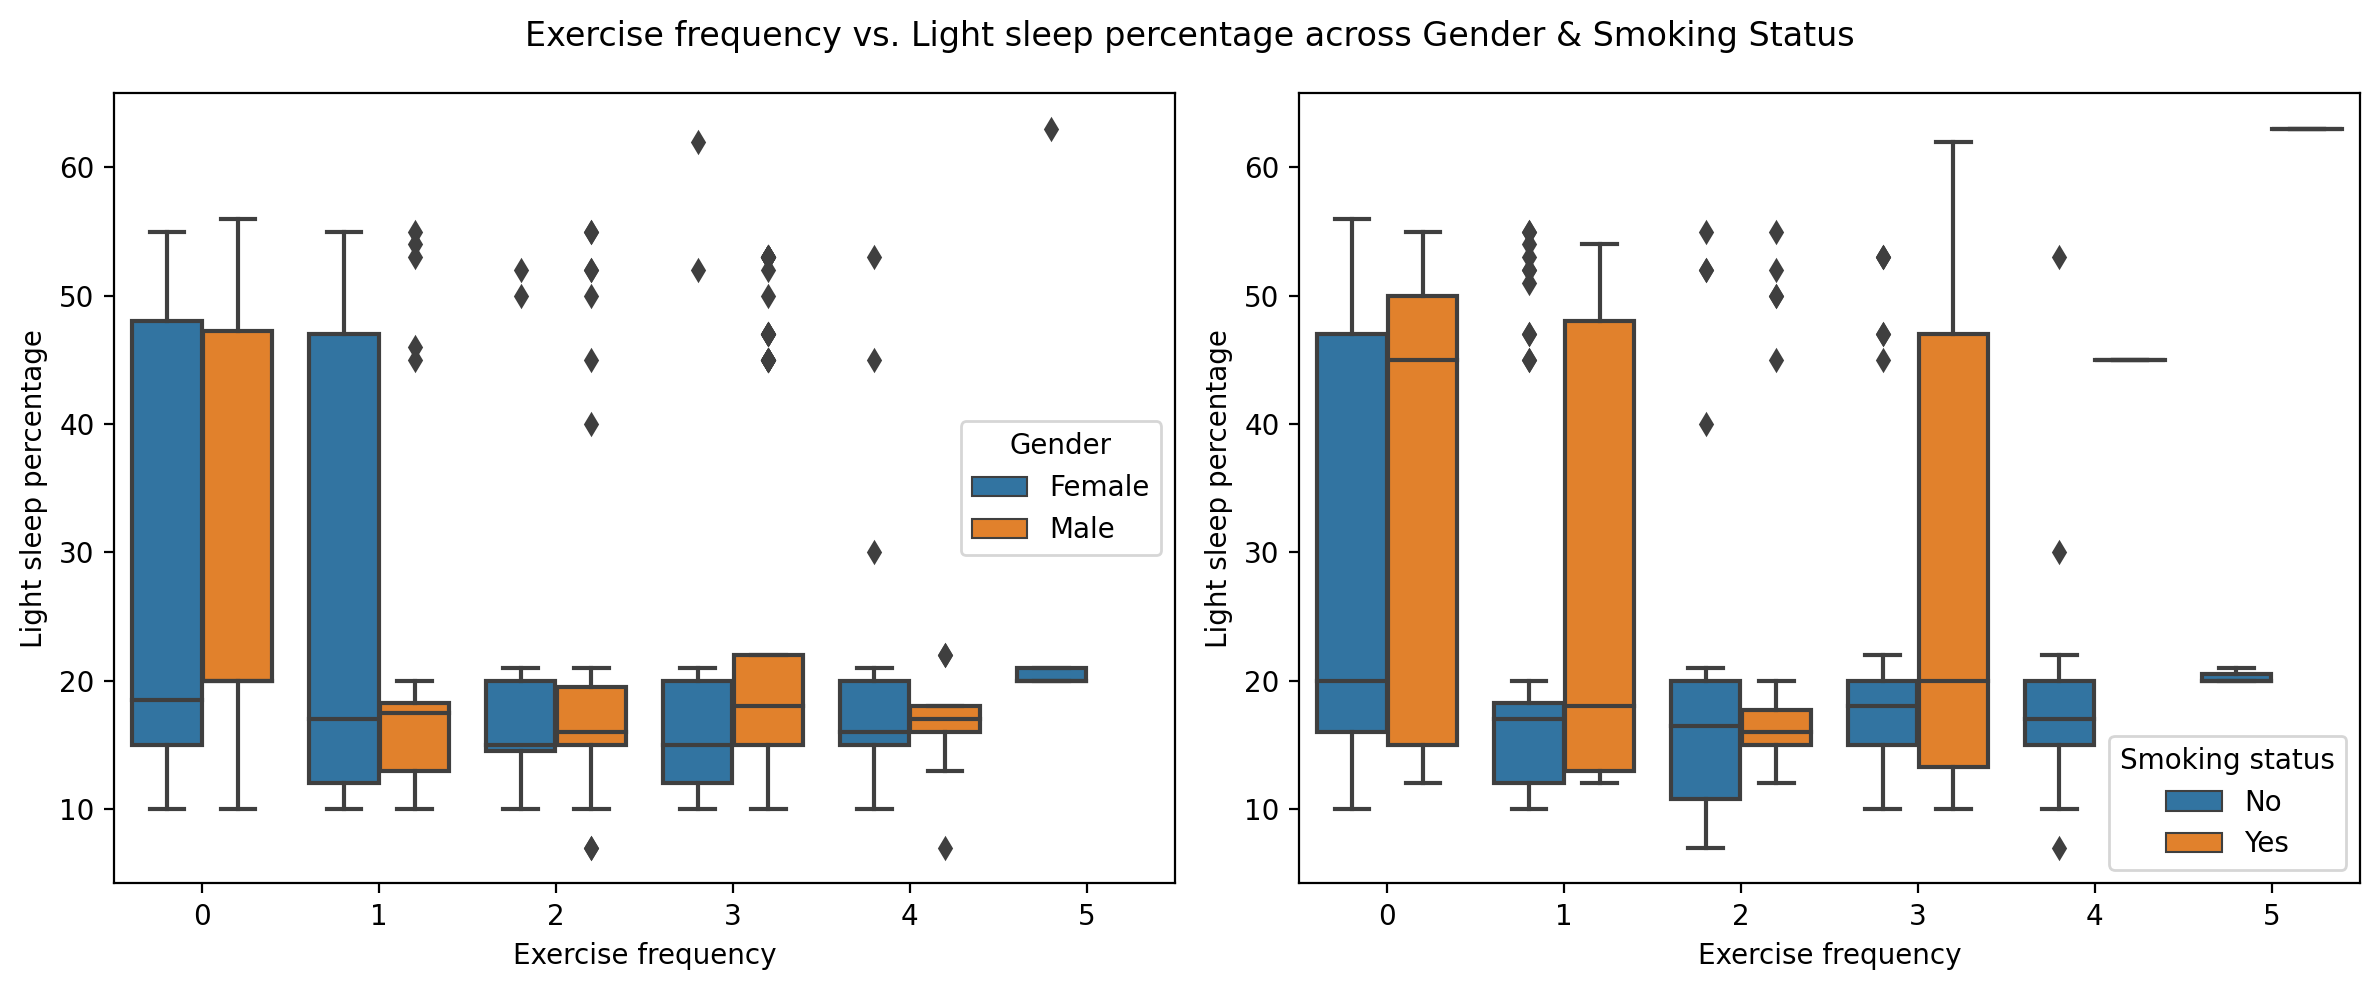

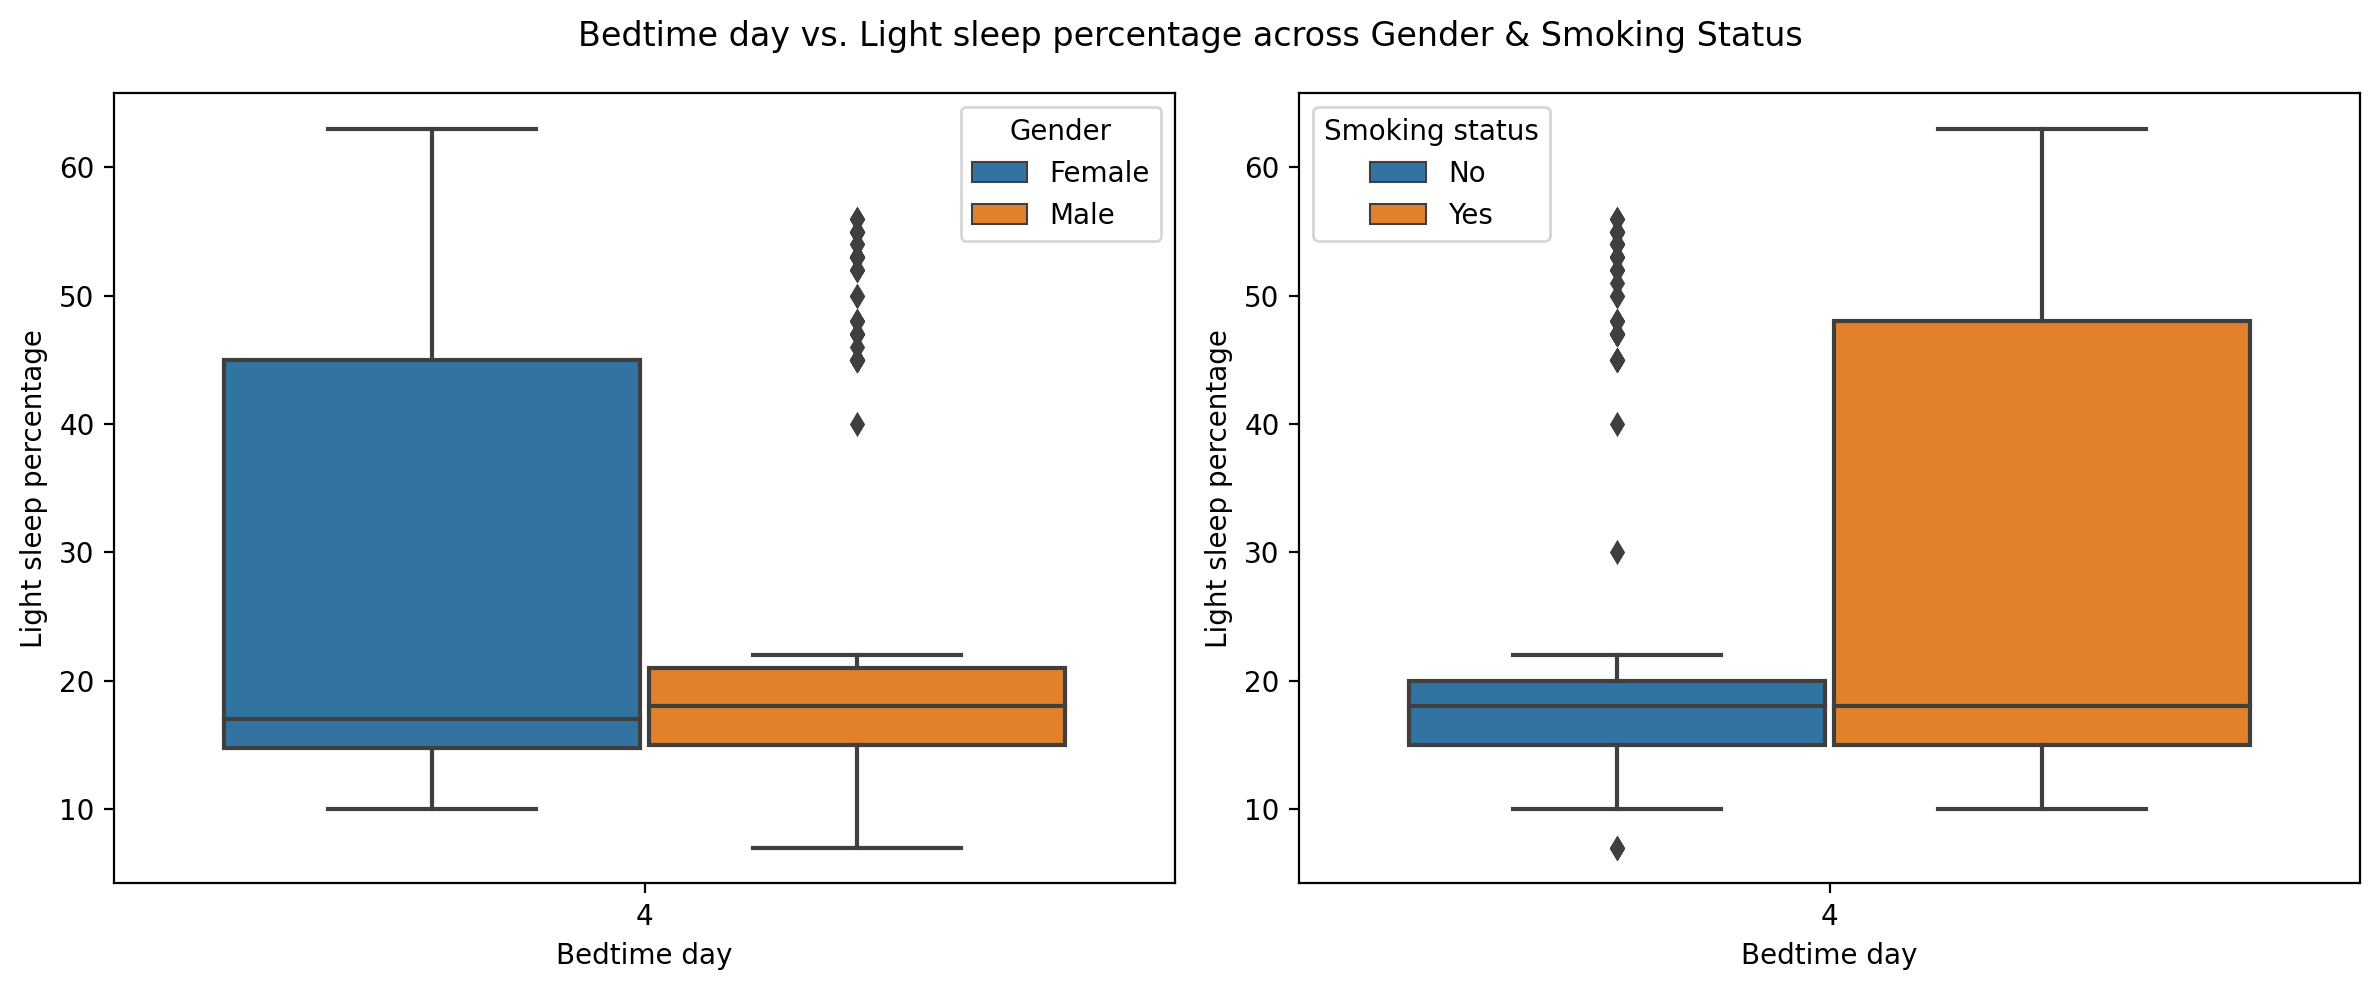

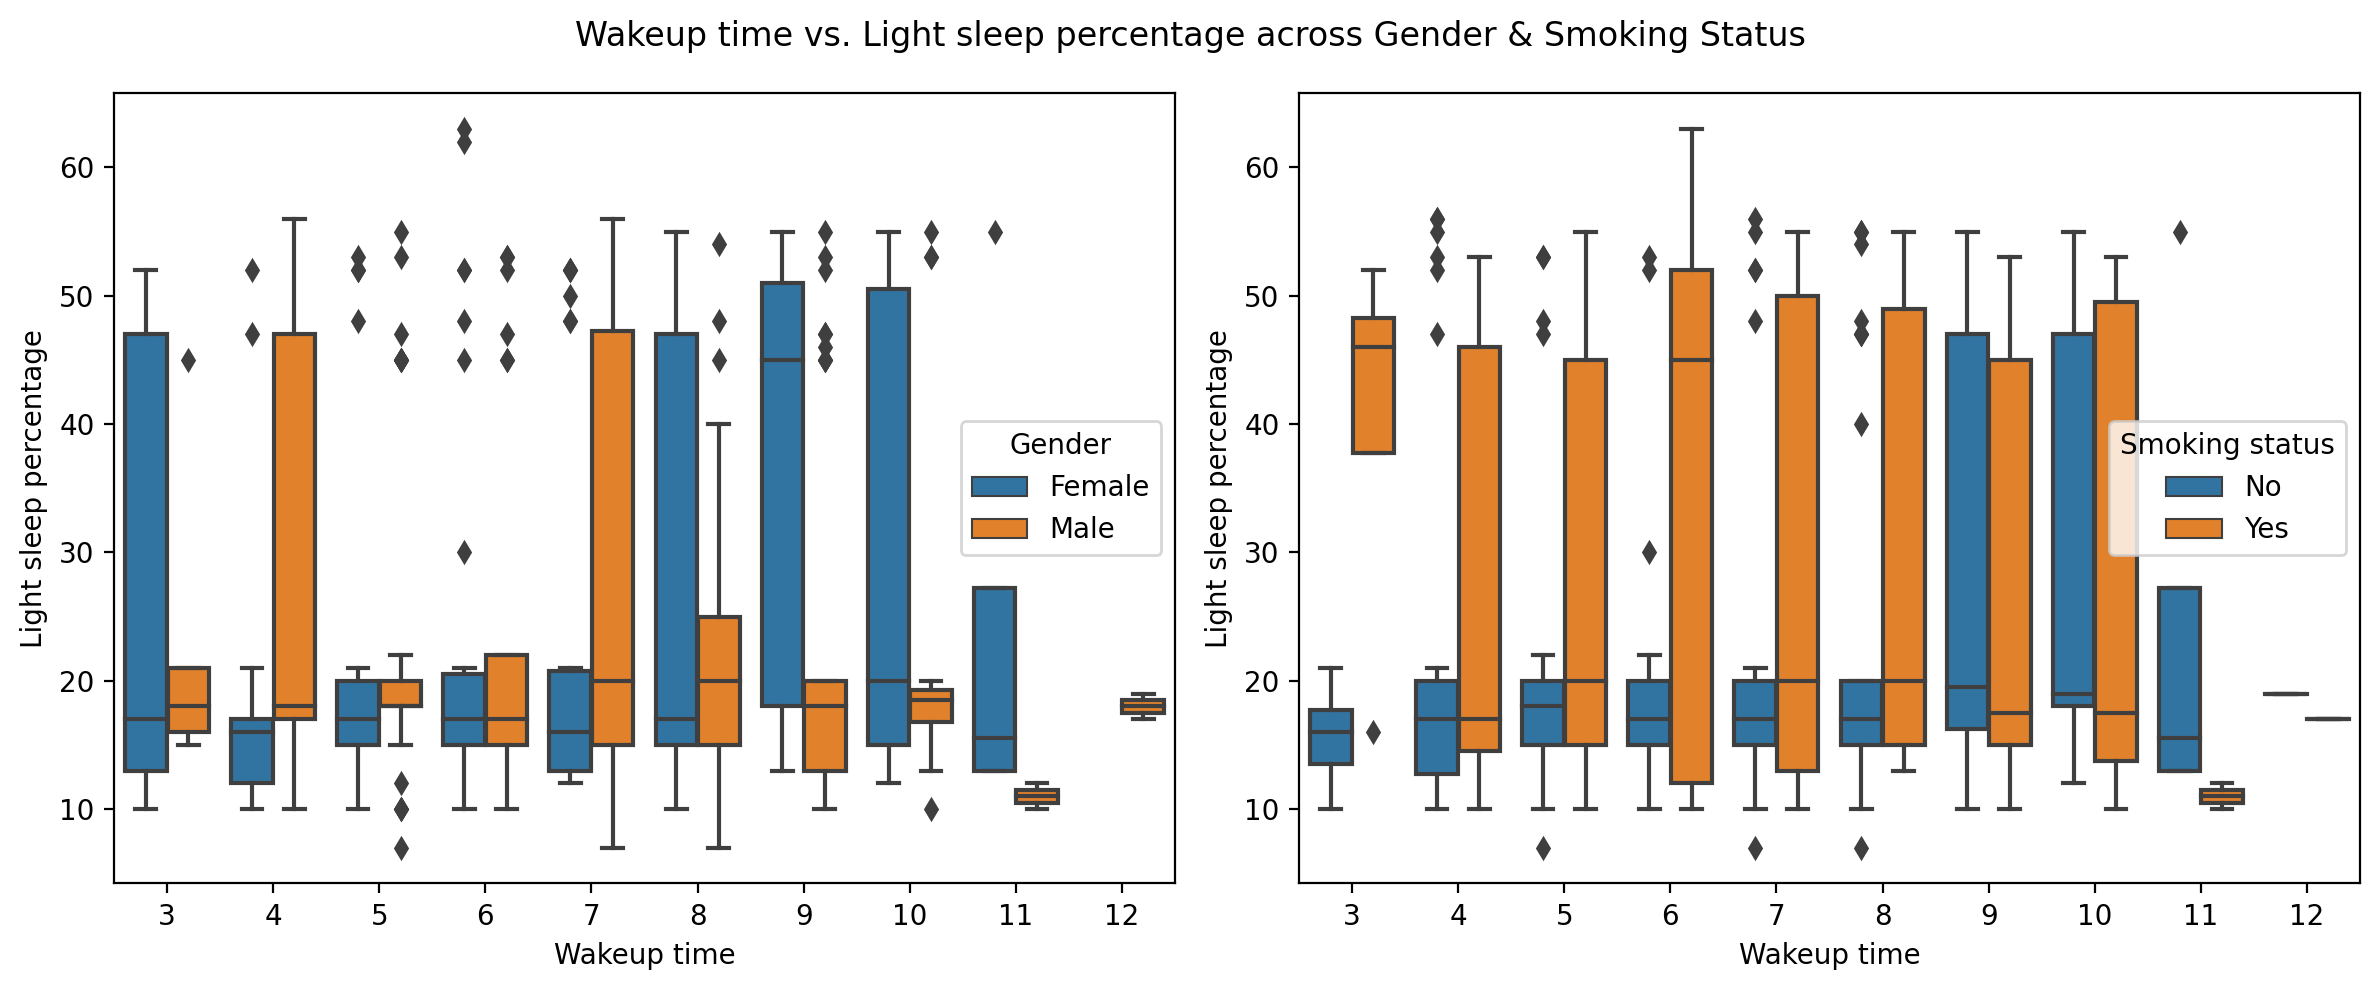

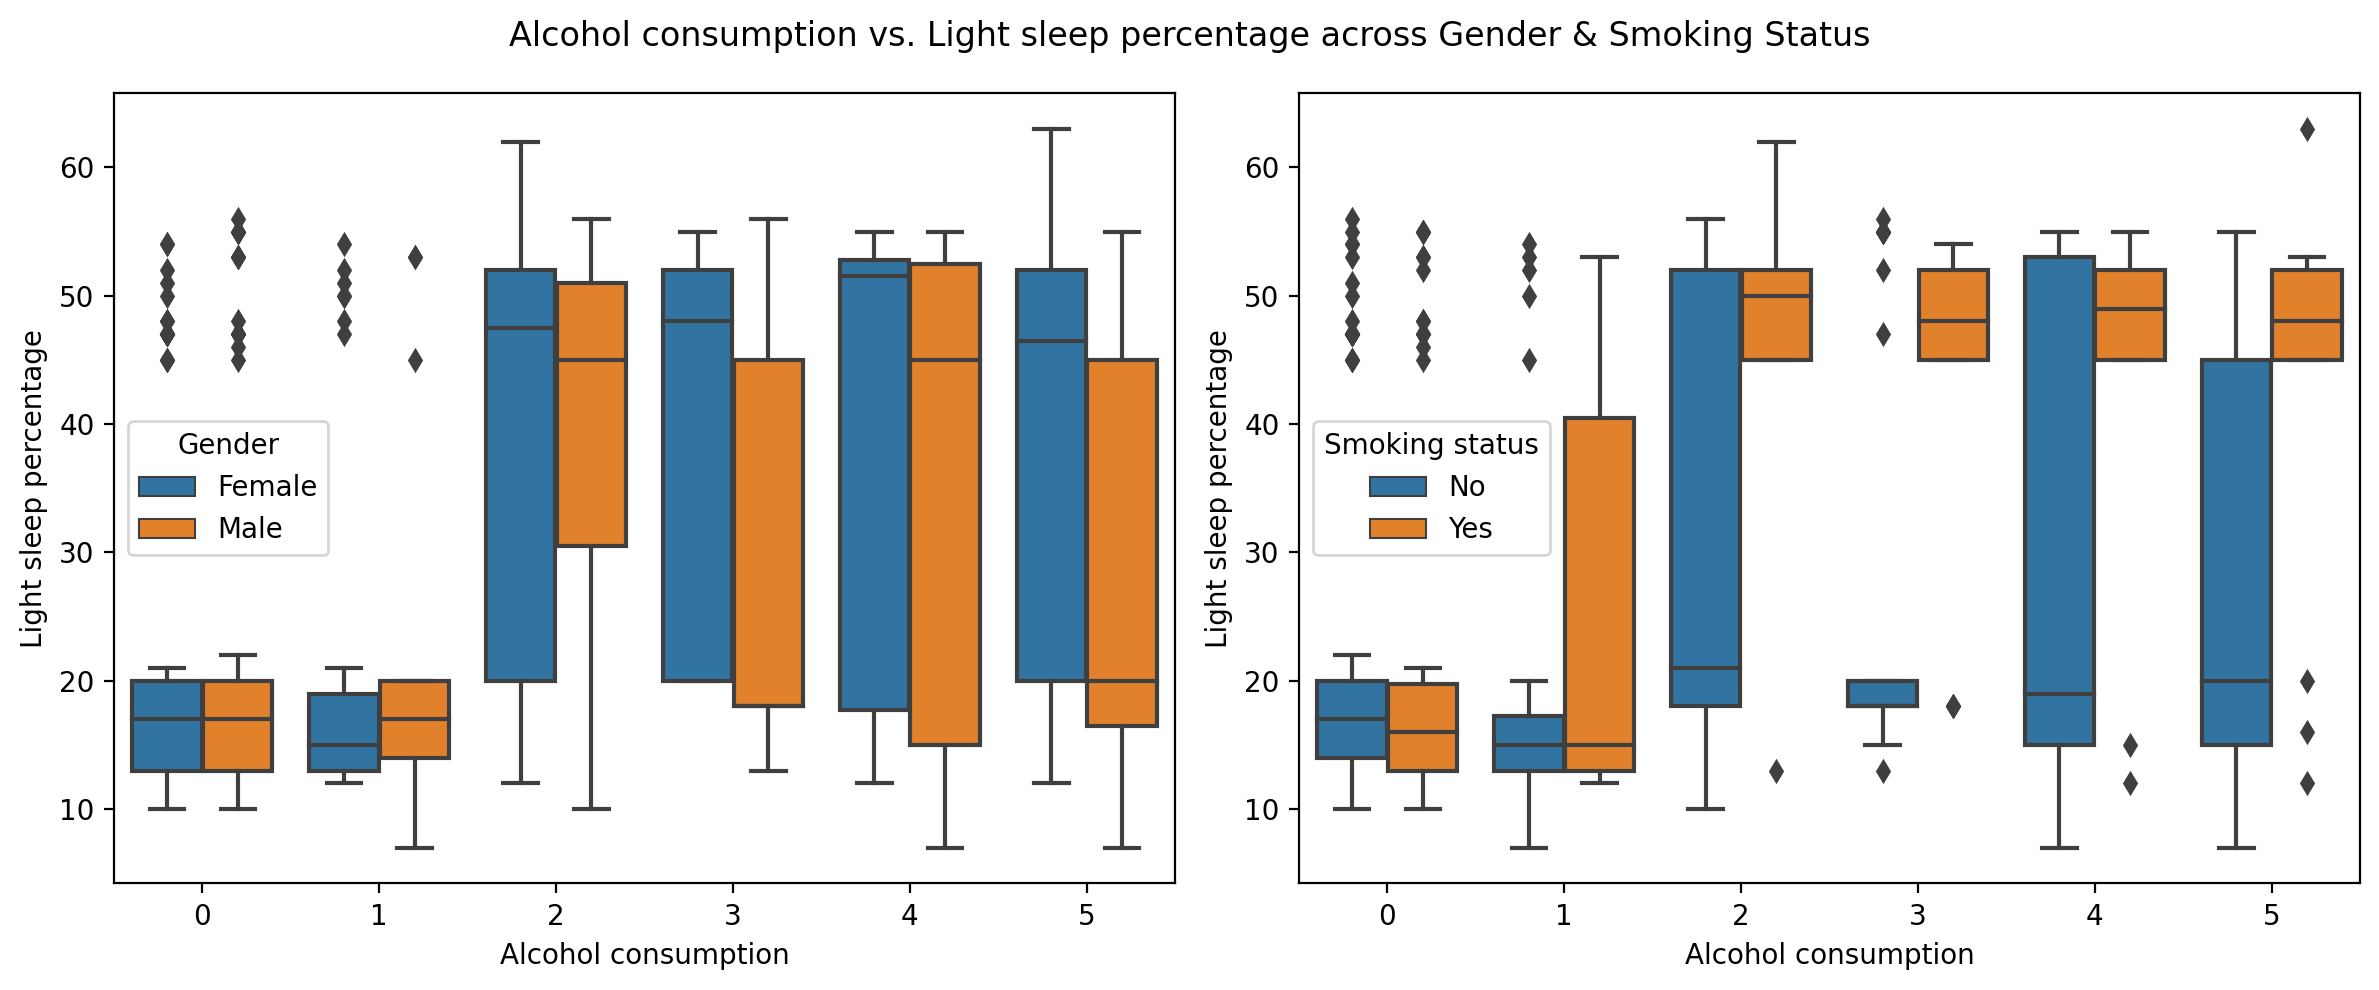

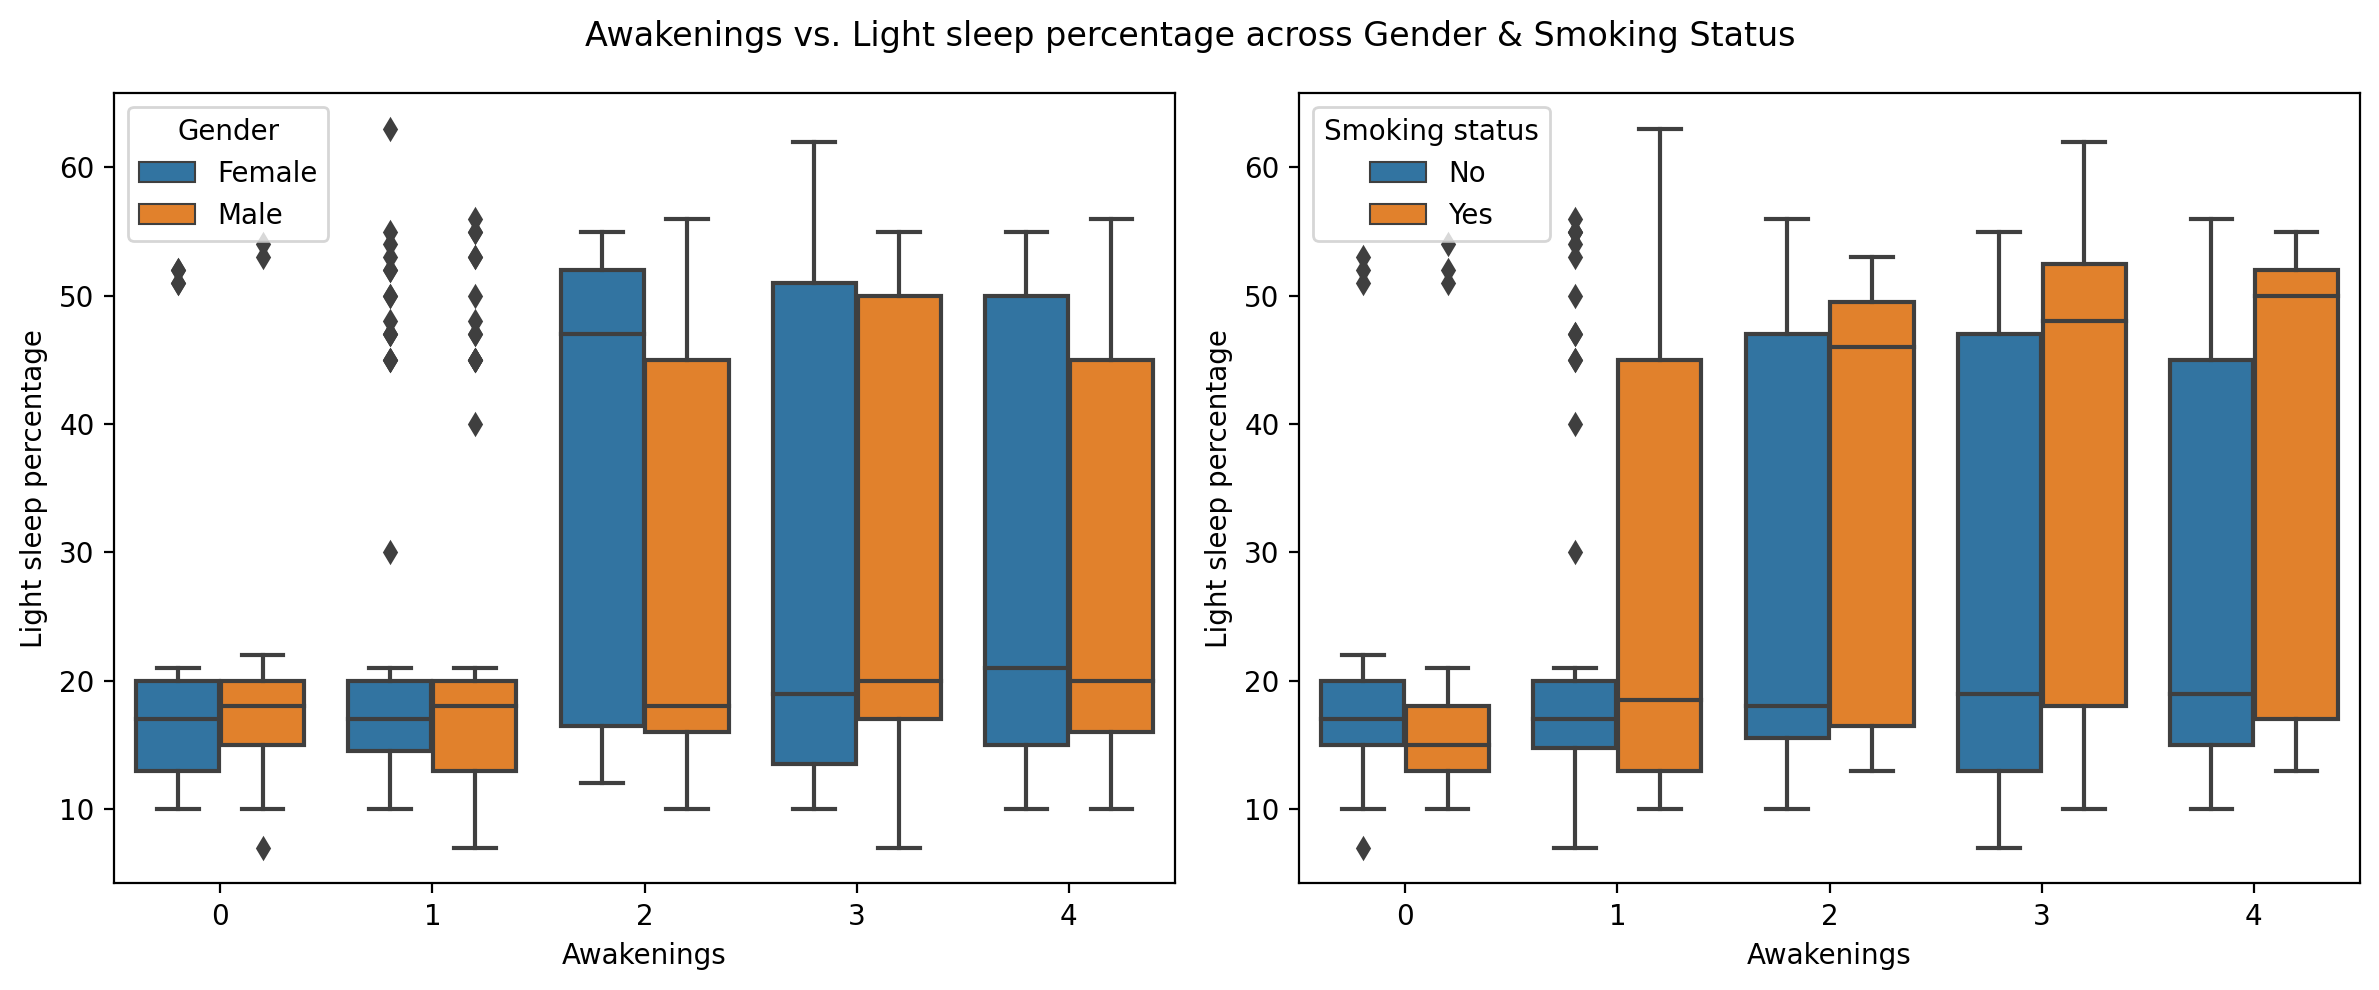

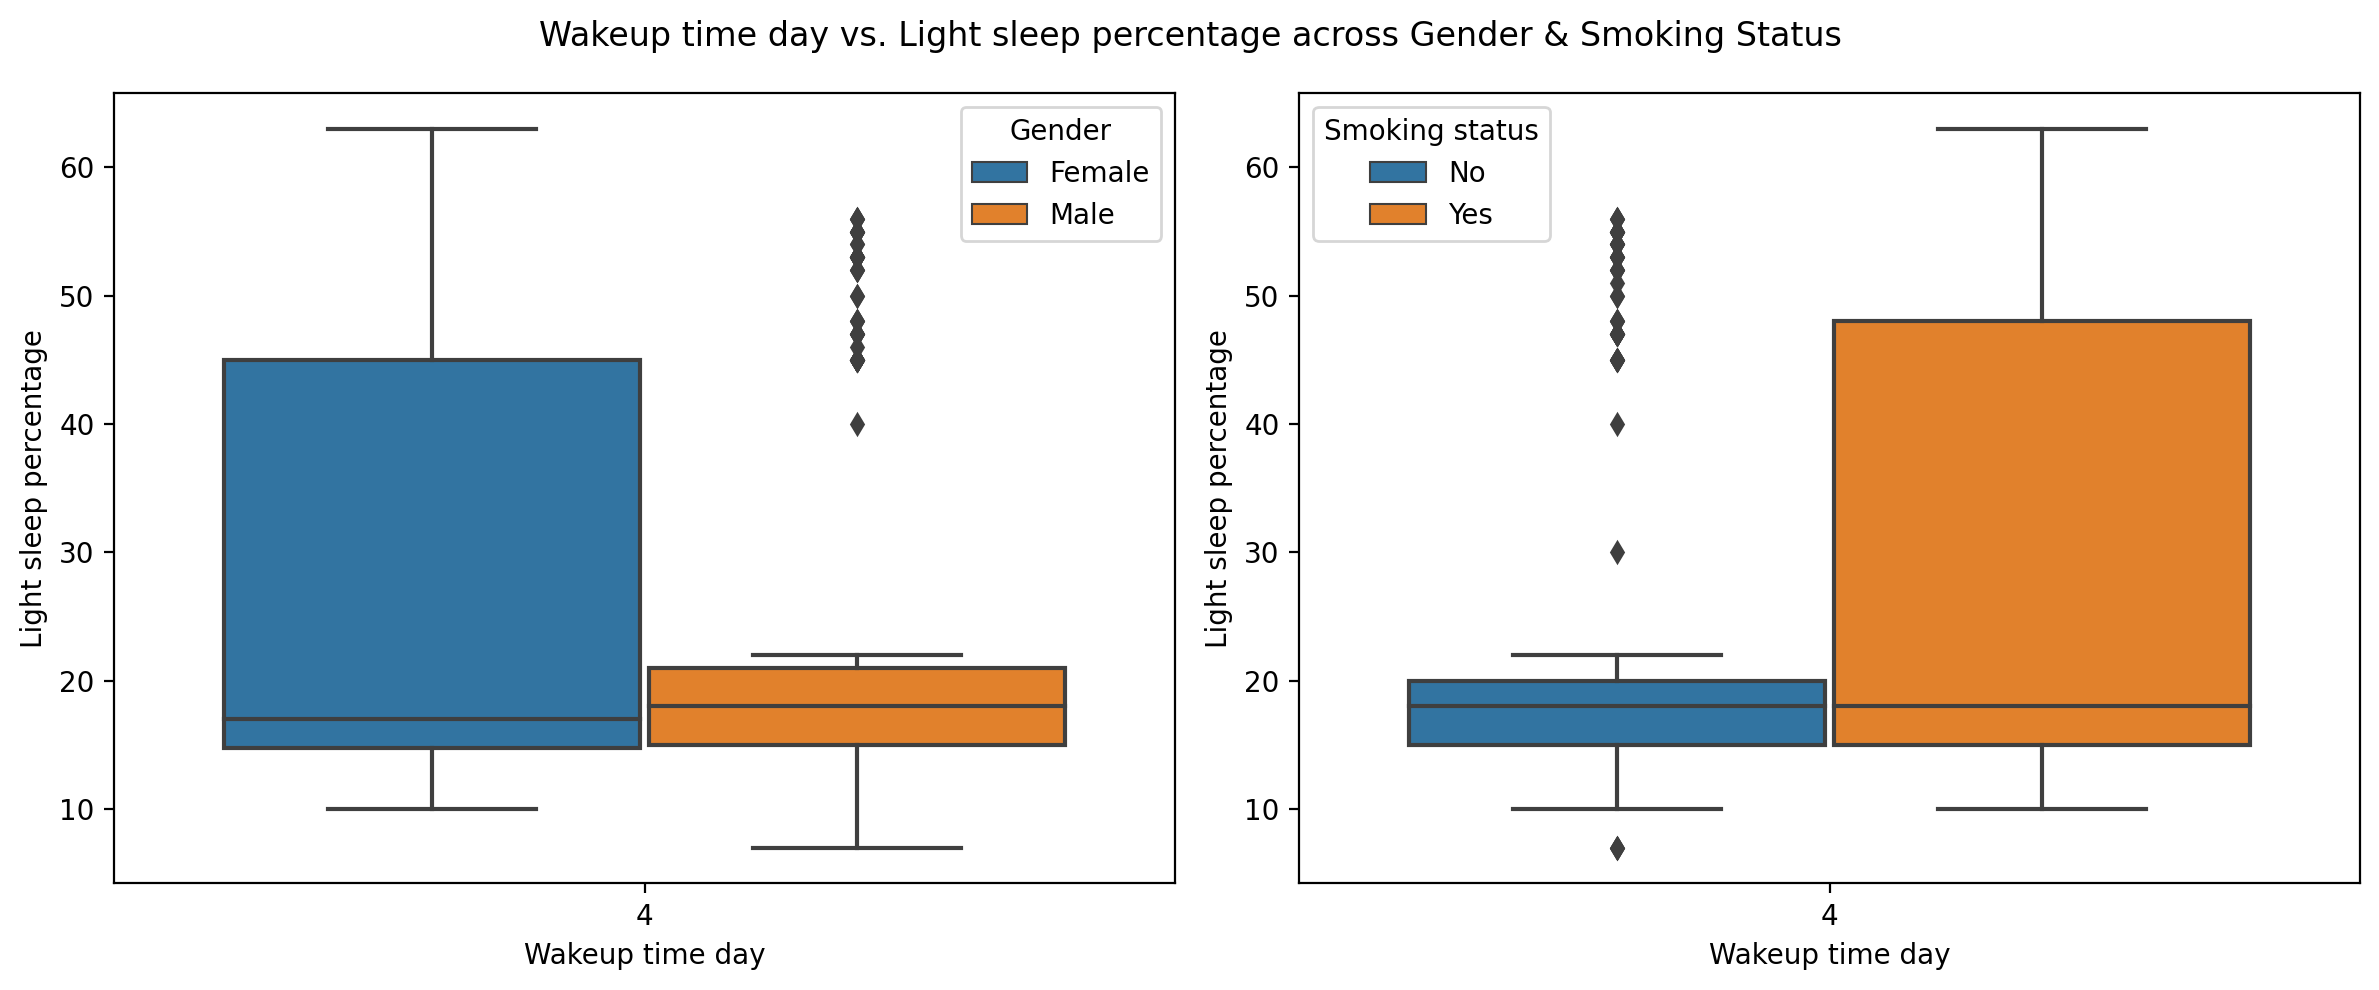

In [21]:
for numeric_c in numerical_cols[1:-1]: 
    print(f'{numeric_c}')
    print('------------------------------------------')
    for cat_c in categorical_cols:
        plot_numerical_categorical(df, cat_c, numeric_c)

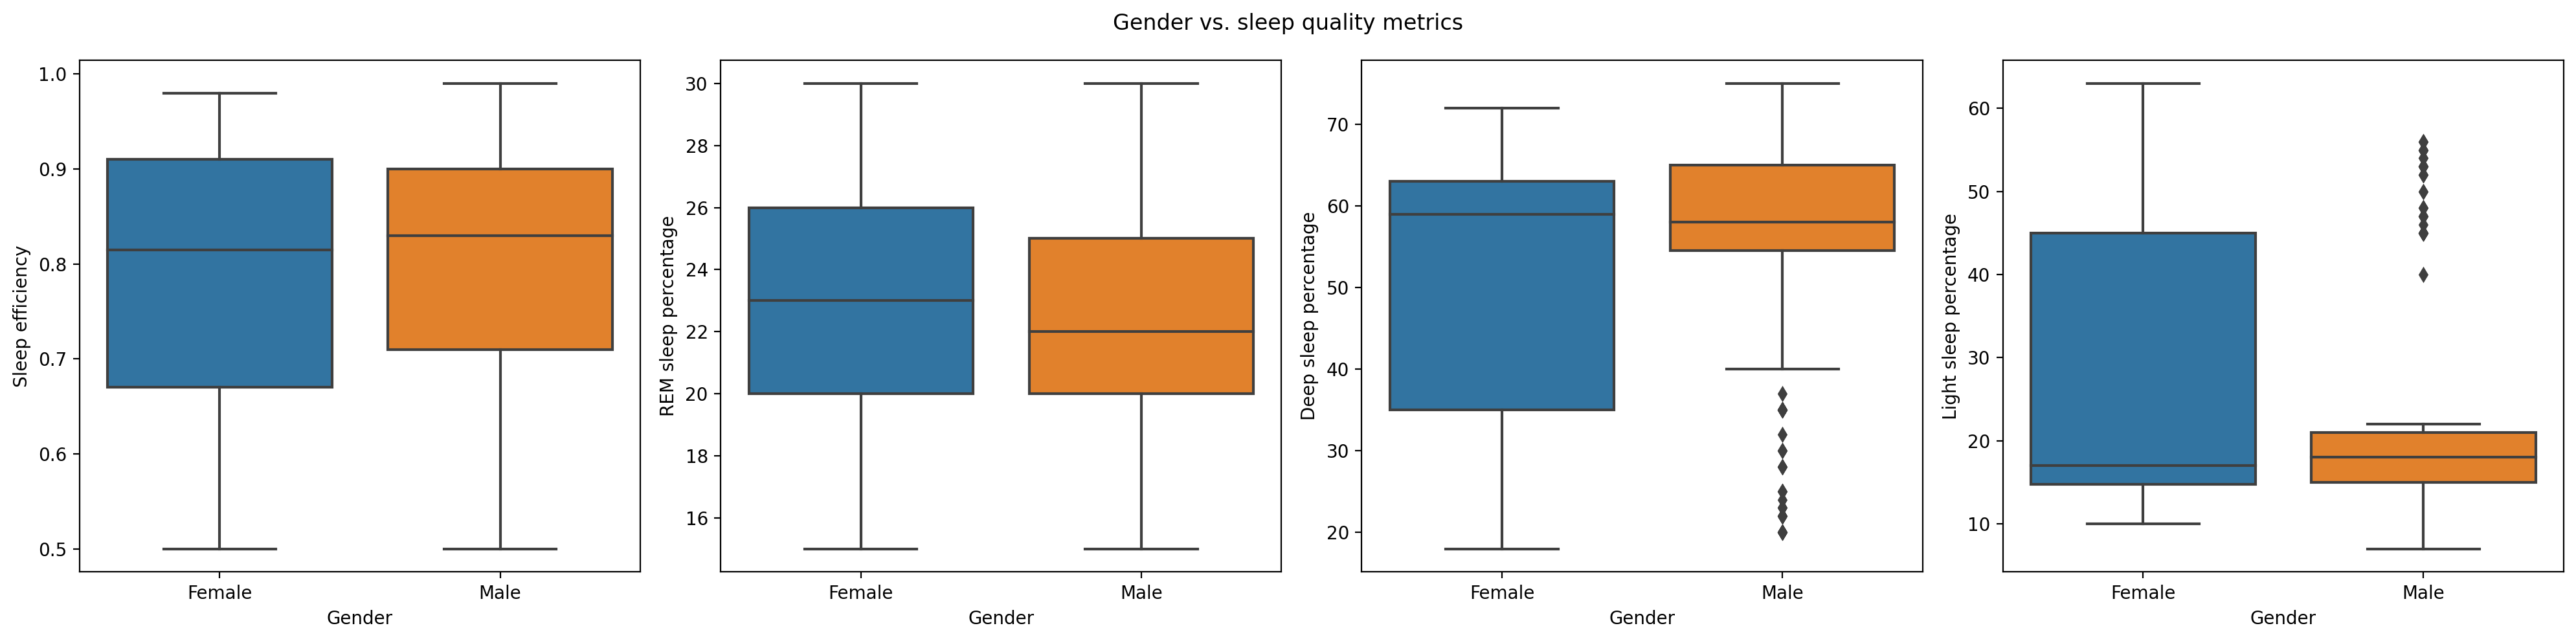

In [22]:
f, ax = plt.subplots(1,4, figsize=(20,5), dpi=200)

for i, numeric_c in enumerate(numerical_cols[1:-1]): 
    sns.boxplot(data=df, x='Gender', y=numeric_c, ax=ax[i])
plt.suptitle('Gender vs. sleep quality metrics')
plt.tight_layout()
plt.show();

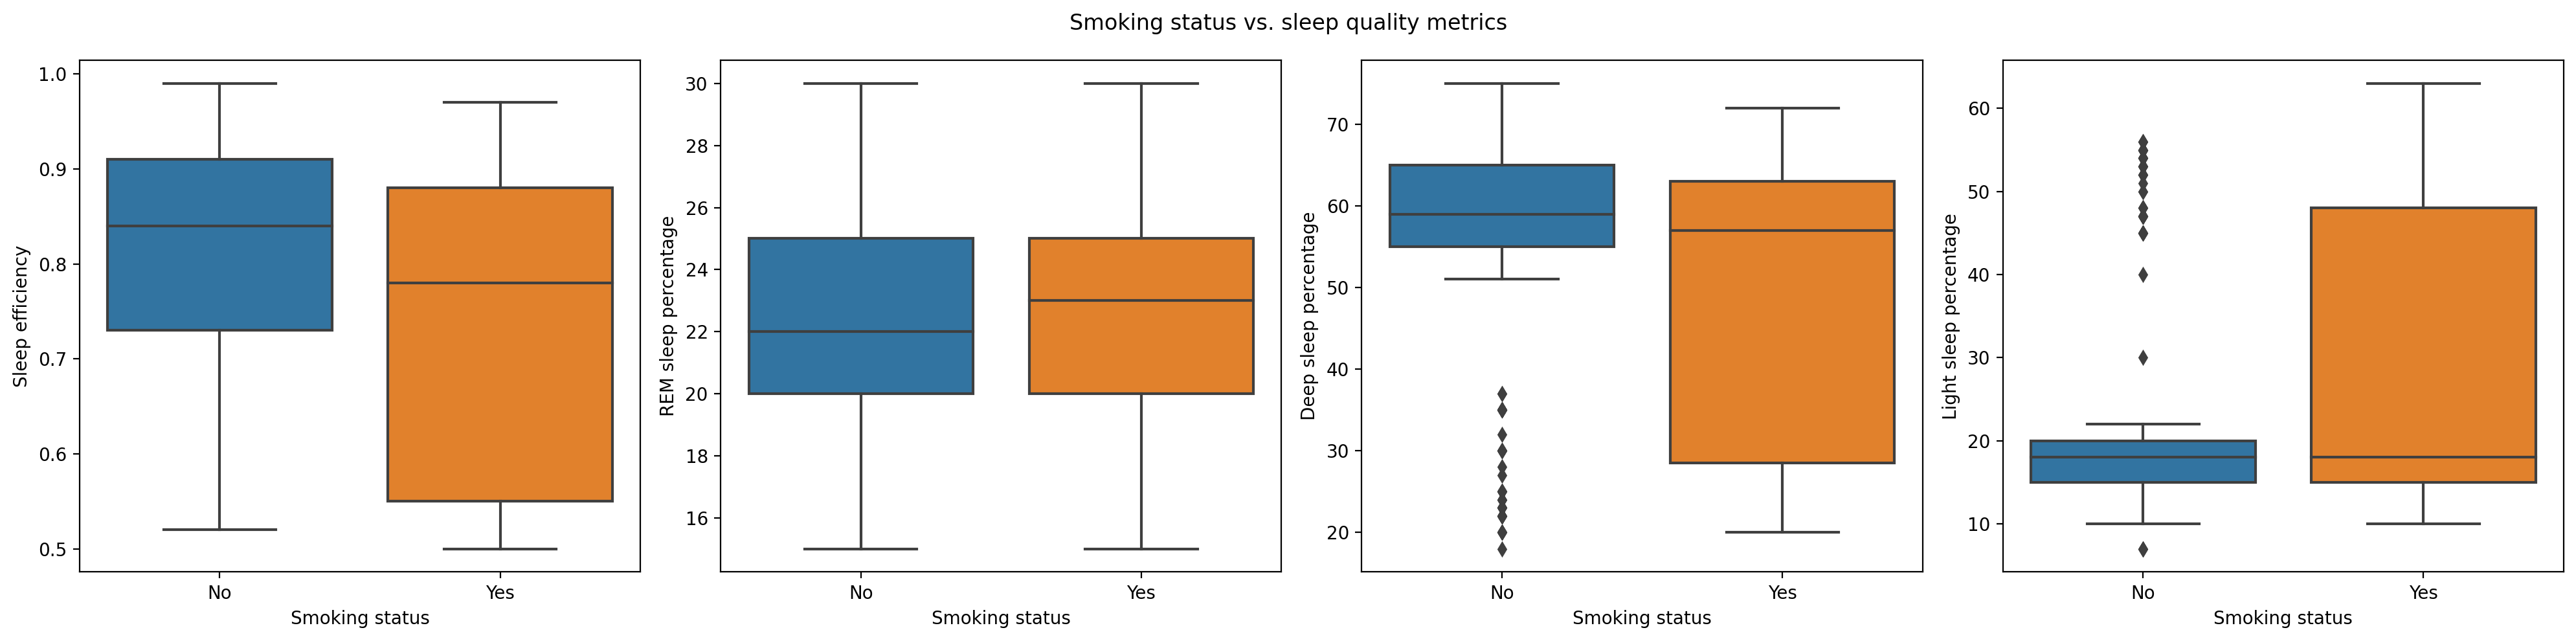

In [23]:
f, ax = plt.subplots(1,4, figsize=(20,5), dpi=200)

for i, numeric_c in enumerate(numerical_cols[1:-1]): 
    sns.boxplot(data=df, x='Smoking status', y=numeric_c, ax=ax[i])
plt.suptitle('Smoking status vs. sleep quality metrics')
plt.tight_layout()
plt.show();

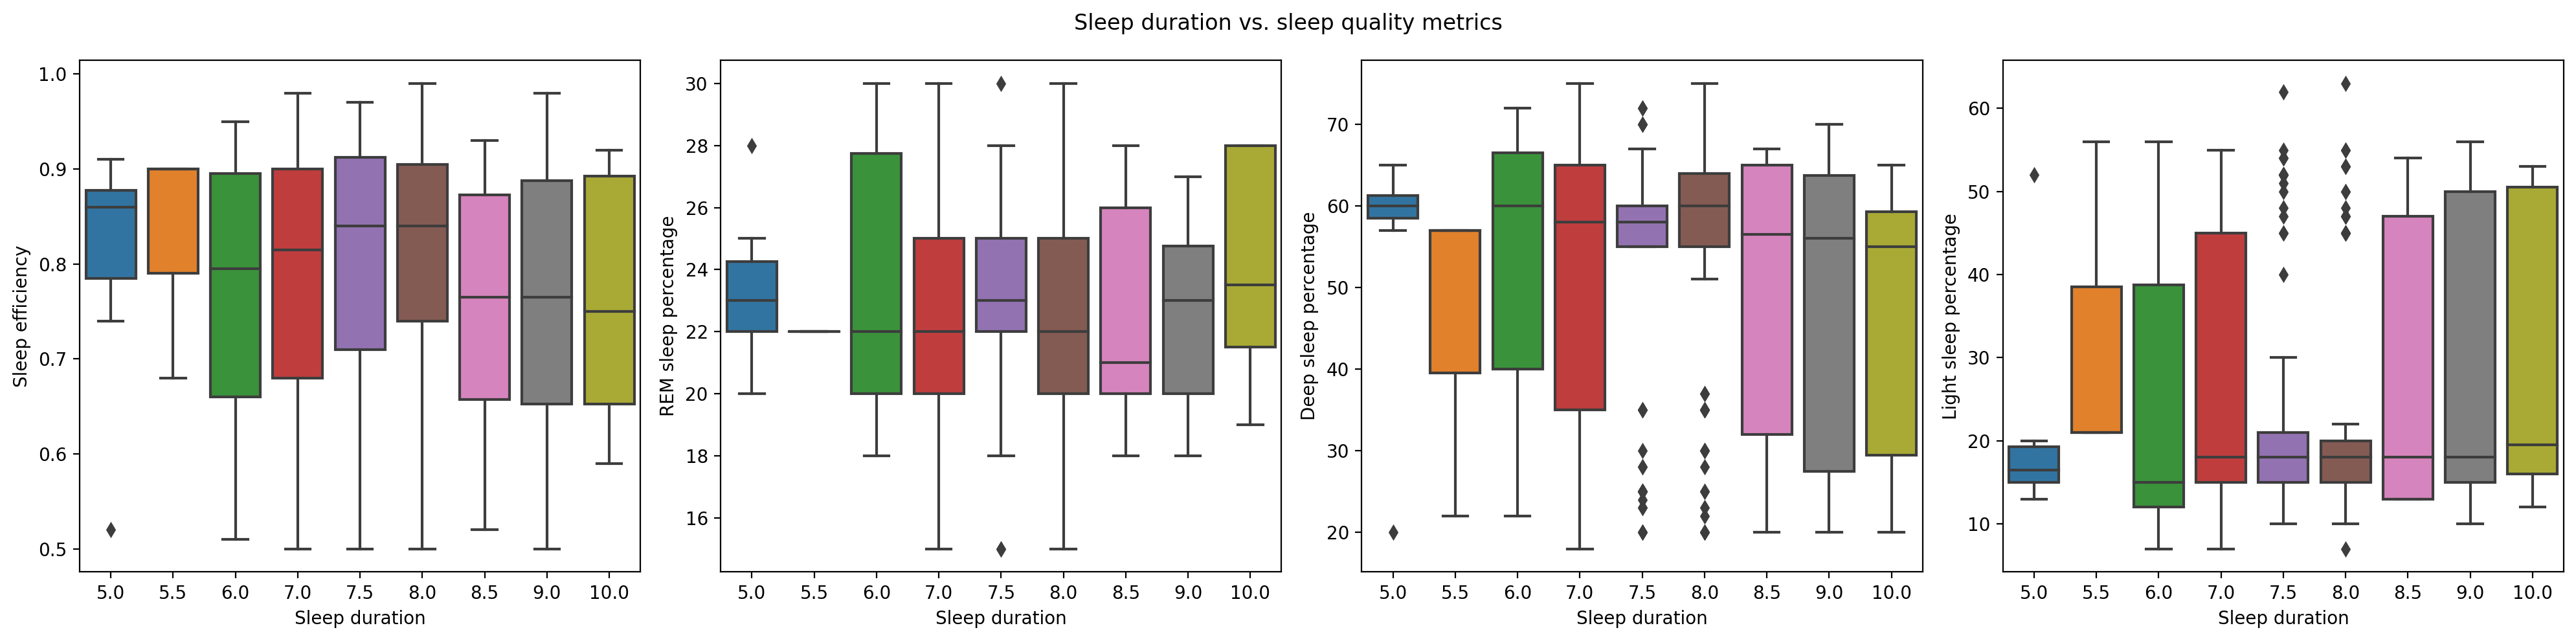

In [24]:
f, ax = plt.subplots(1,4, figsize=(20,5), dpi=200)

for i, numeric_c in enumerate(numerical_cols[1:-1]): 
    sns.boxplot(data=df, x='Sleep duration', y=numeric_c, ax=ax[i])
plt.suptitle('Sleep duration vs. sleep quality metrics')
plt.tight_layout()
plt.show();

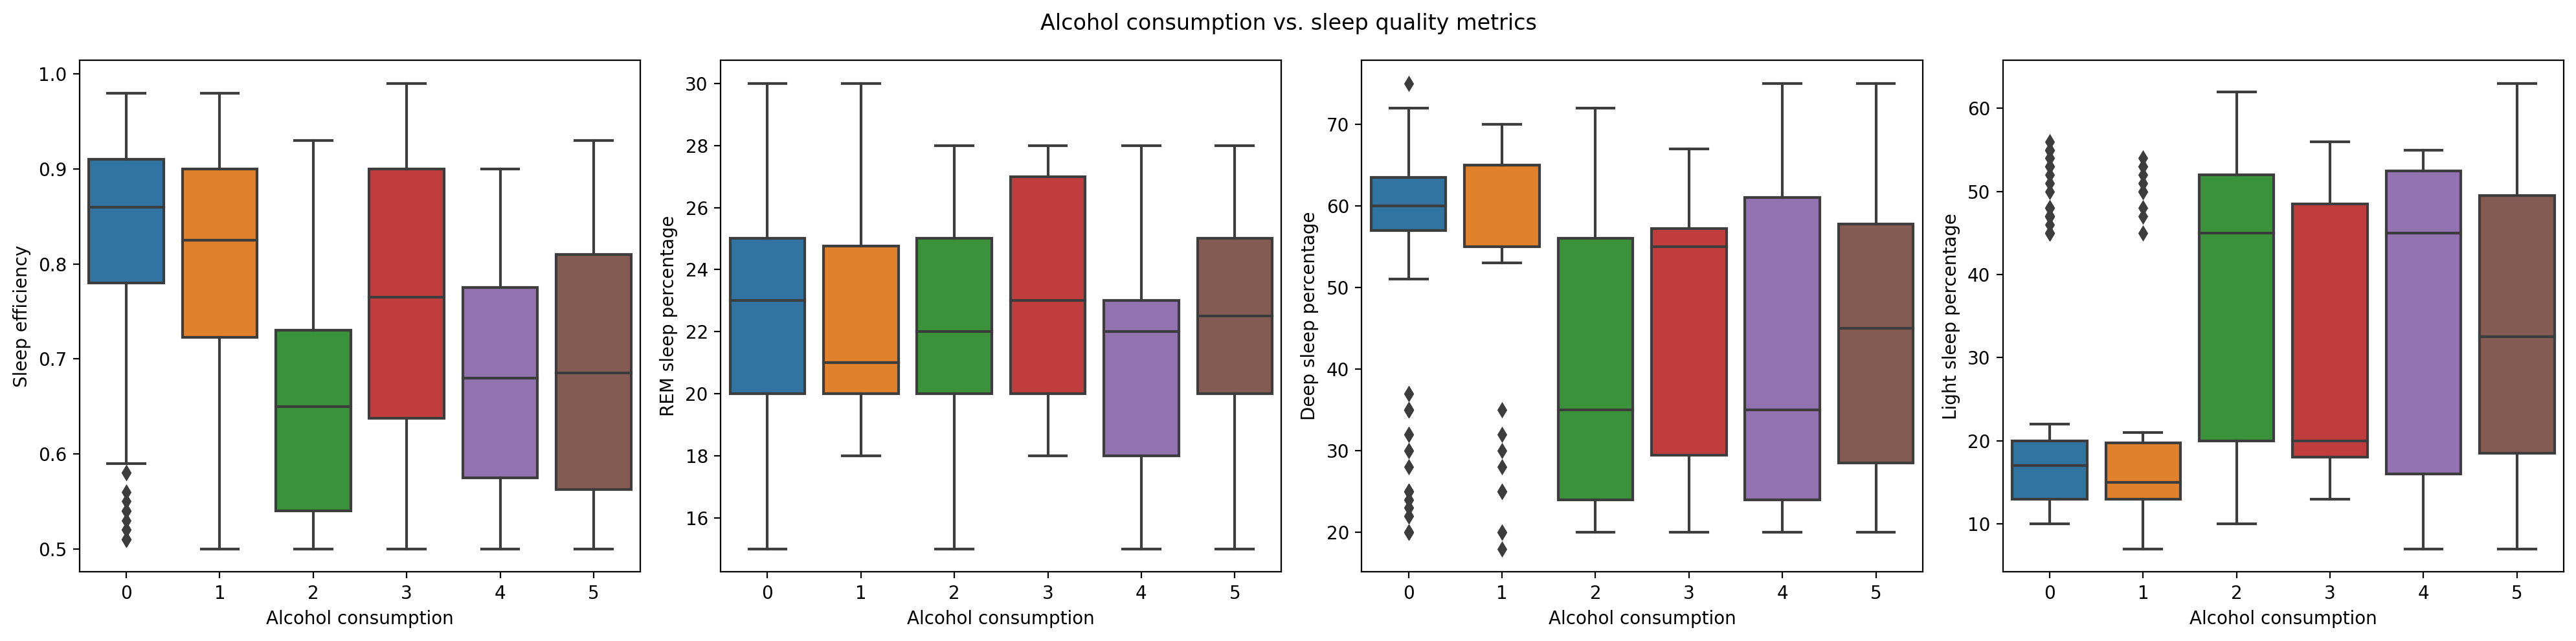

In [25]:
f, ax = plt.subplots(1,4, figsize=(20,5), dpi=200)

for i, numeric_c in enumerate(numerical_cols[1:-1]): 
    sns.boxplot(data=df, x='Alcohol consumption', y=numeric_c, ax=ax[i])
plt.suptitle(f'Alcohol consumption vs. sleep quality metrics')
plt.tight_layout()
plt.show();

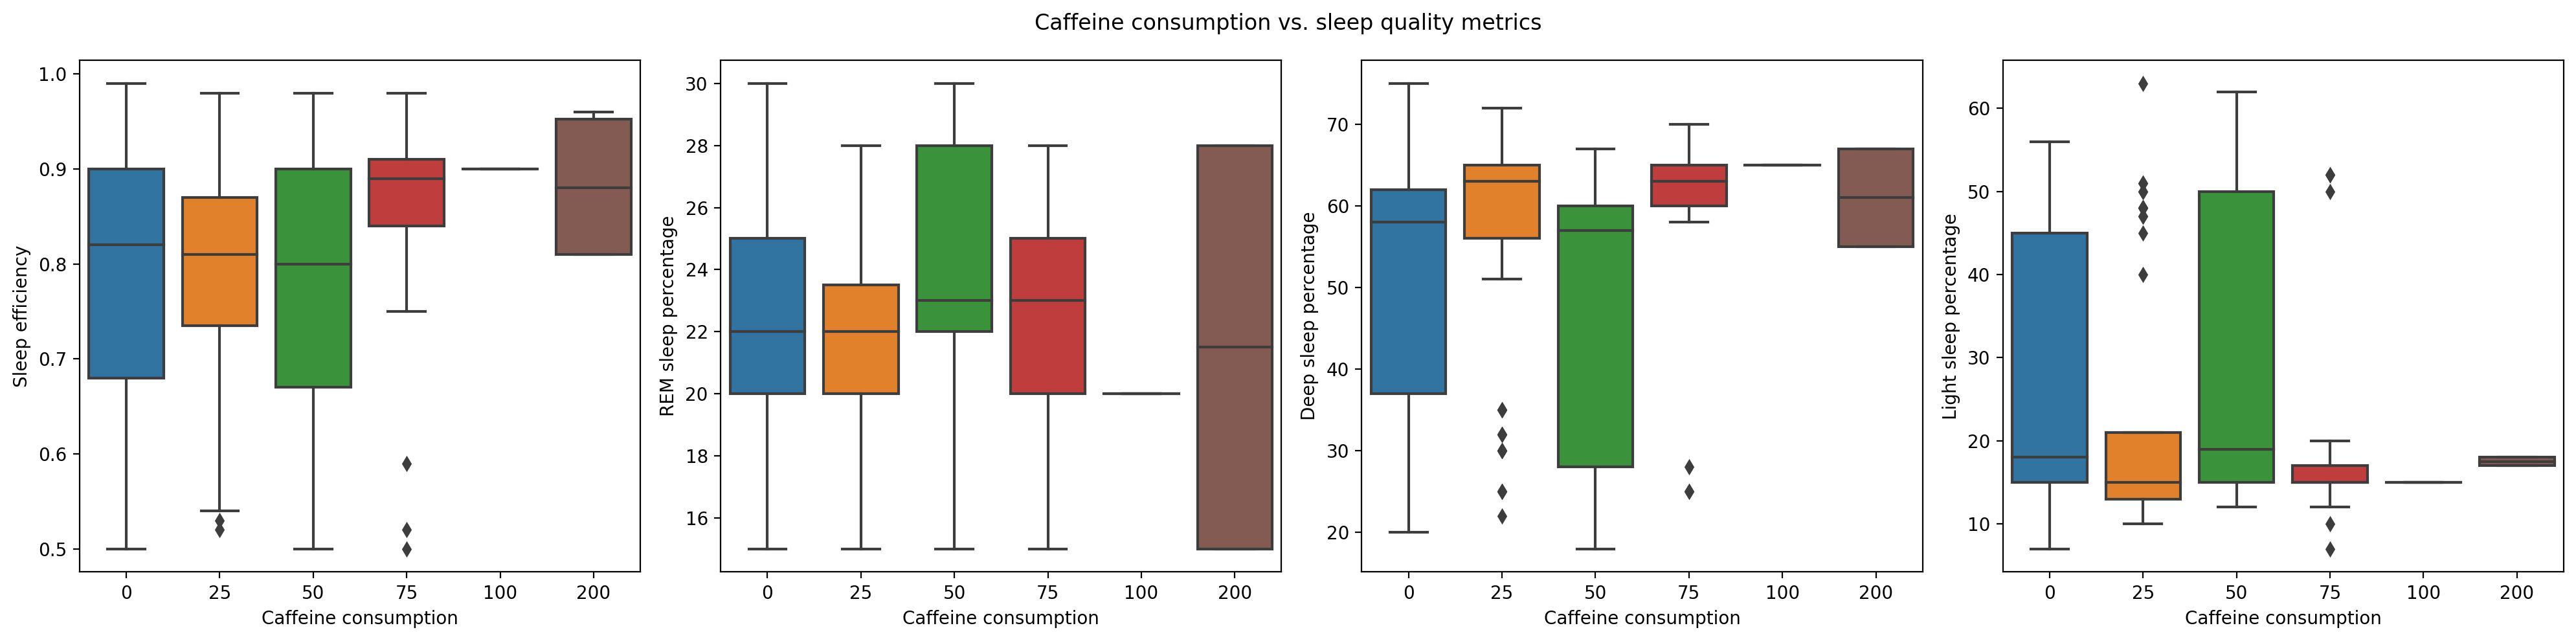

In [26]:
f, ax = plt.subplots(1,4, figsize=(20,5), dpi=200)

for i, numeric_c in enumerate(numerical_cols[1:-1]): 
    sns.boxplot(data=df, x='Caffeine consumption', y=numeric_c, ax=ax[i])
plt.suptitle(f'Caffeine consumption vs. sleep quality metrics')
plt.tight_layout()
plt.show();

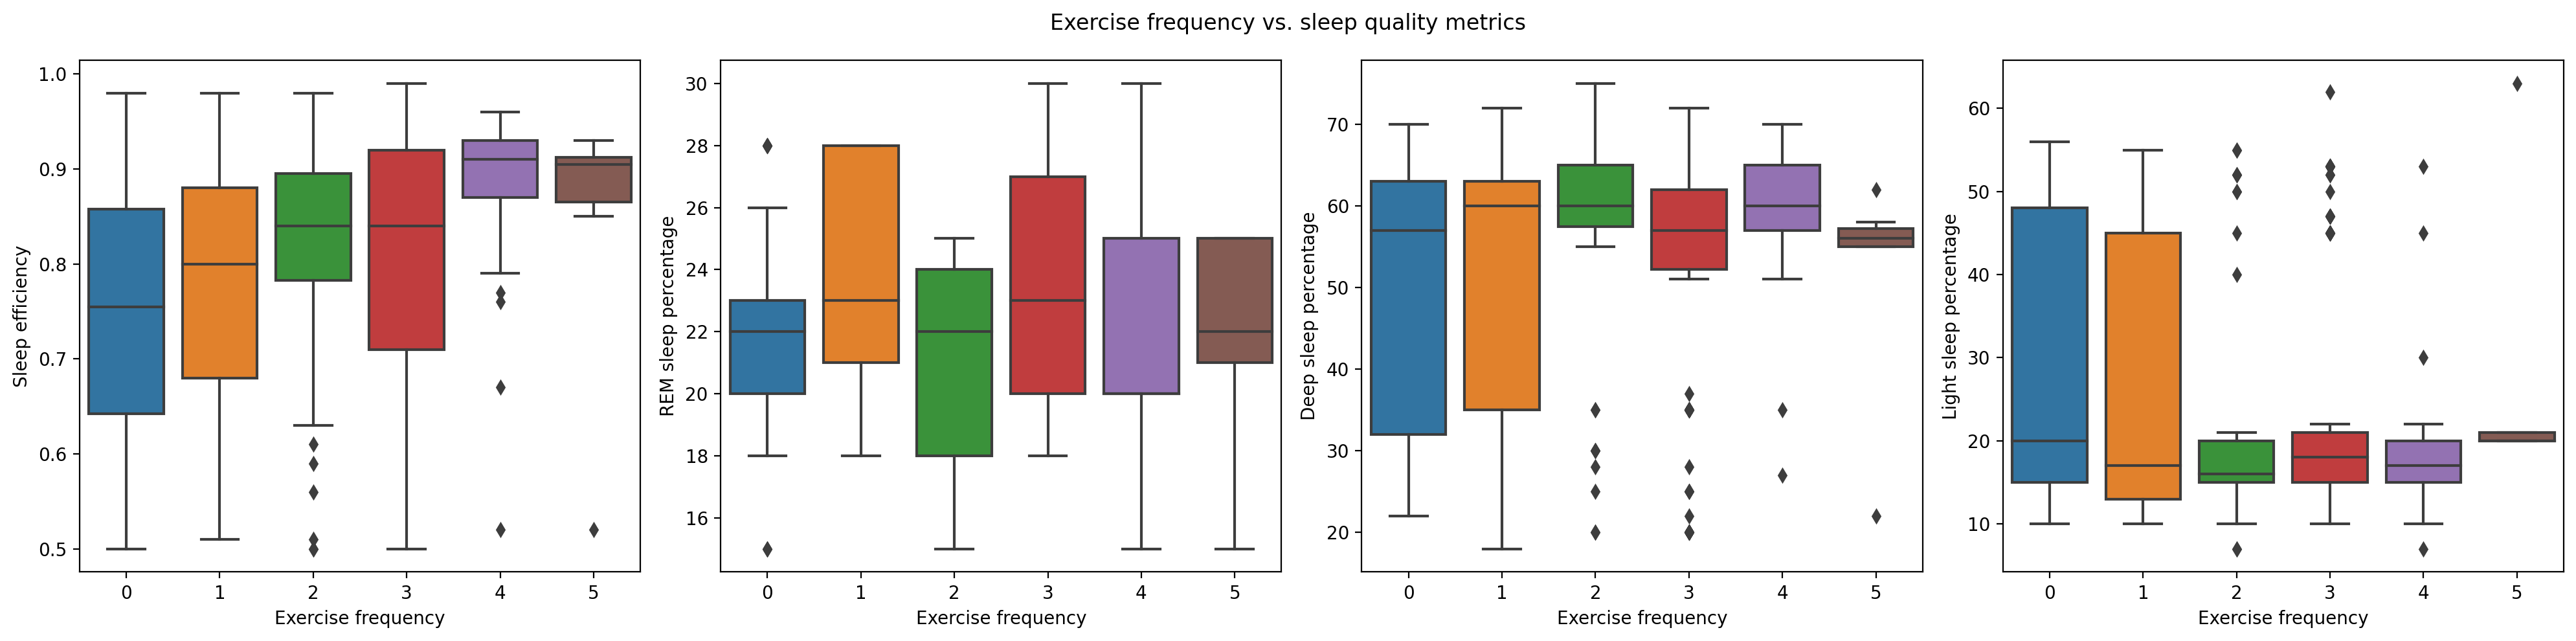

In [27]:
f, ax = plt.subplots(1,4, figsize=(20,5), dpi=200)

for i, numeric_c in enumerate(numerical_cols[1:-1]): 
    sns.boxplot(data=df, x='Exercise frequency', y=numeric_c, ax=ax[i])
plt.suptitle(f'Exercise frequency vs. sleep quality metrics')
plt.tight_layout()
plt.show();

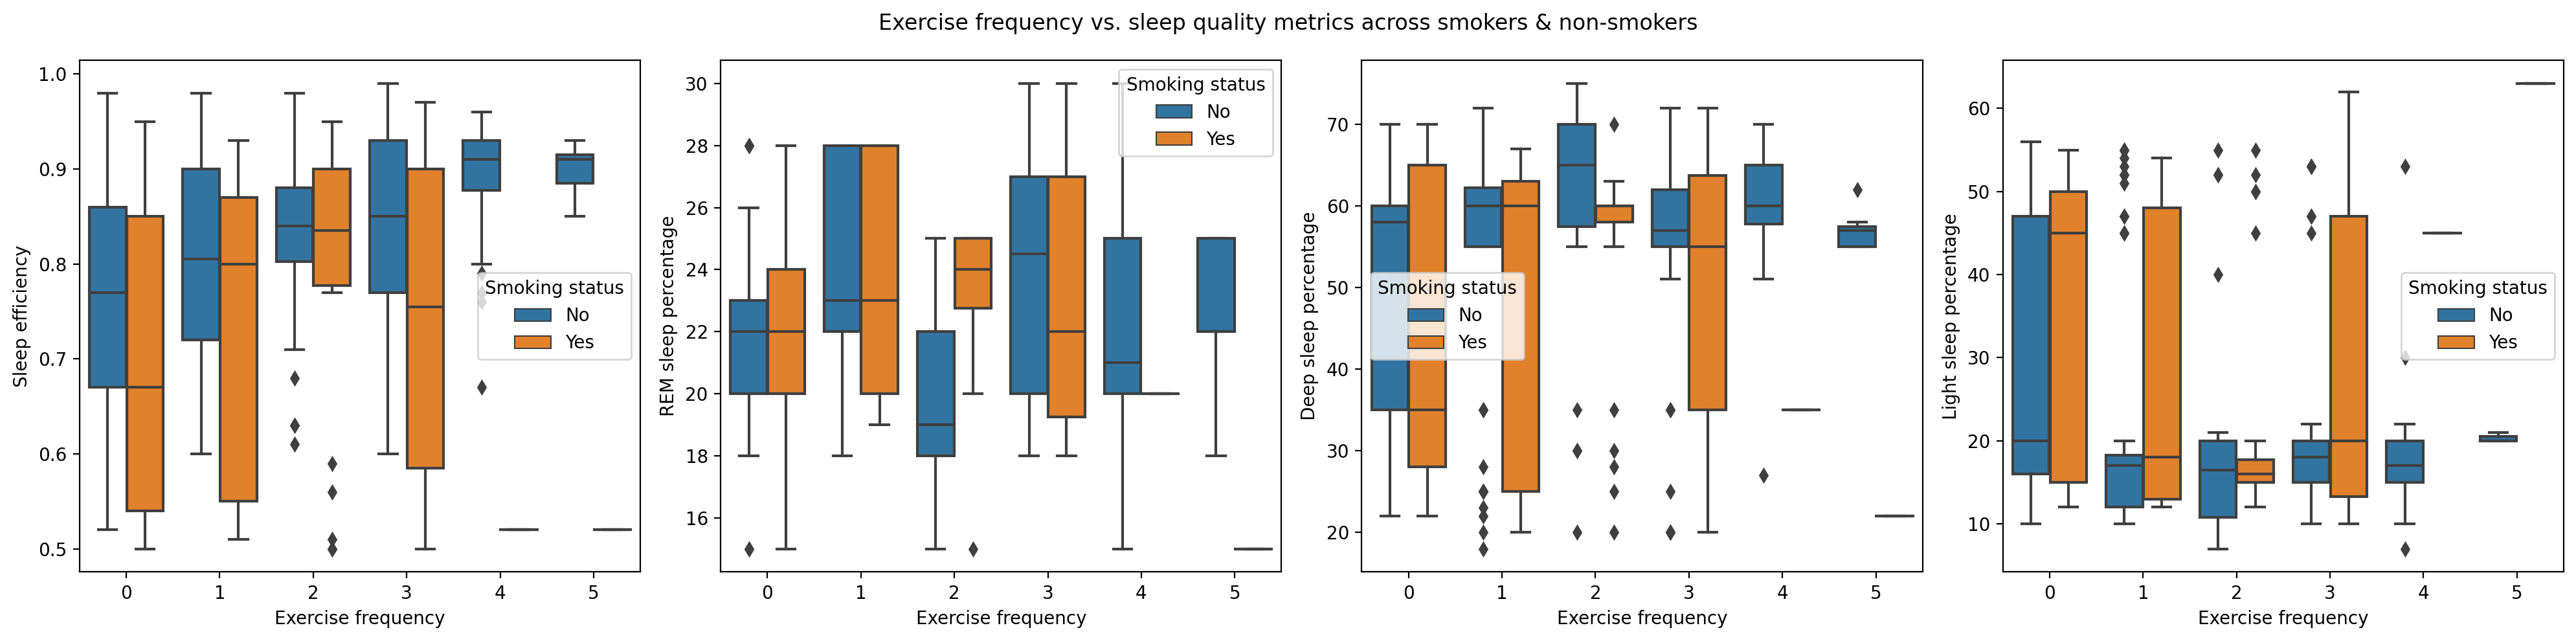

In [28]:
f, ax = plt.subplots(1,4, figsize=(20,5), dpi=200)

for i, numeric_c in enumerate(numerical_cols[1:-1]): 
    sns.boxplot(data=df, x='Exercise frequency', y=numeric_c, hue='Smoking status', ax=ax[i])
plt.suptitle(f'Exercise frequency vs. sleep quality metrics across smokers & non-smokers')
plt.tight_layout()
plt.show();

# Part B: Analytics and Models

## 1. How well can sleep duration, exercise frequency, smoking status, and gender predict one’s sleep efficiency?
- Target variable: Sleep efficiency
- Input variables: Sleep duration, exercise frequency, smoking status and gender

## 2. How well can one’s lifestyle and health choices predict sleep quality?
- Target variable: Deep sleep percentage
- Input variables: Caffeine consumption, Alcohol consumption, Smoking status, Exercise frequency, Daily steps

In [29]:
# Define the features and target for question 1
X1 = df[['Sleep duration', 'Exercise frequency', 'Smoking status', 'Gender']]
y1 = df['Sleep efficiency']

# Define the features and target for question 2
X2 = df[['Caffeine consumption', 'Alcohol consumption', 'Smoking status', 'Exercise frequency', 'Daily Steps']]
y2 = df['Deep sleep percentage']

In [30]:
# Define numerical and categorical features
categorical_features1 = ['Sleep duration', 'Exercise frequency', 'Smoking status', 'Gender']
numerical_features2 = ['Daily Steps']  
categorical_features2 = ['Caffeine consumption', 'Alcohol consumption', 'Smoking status', 'Exercise frequency']

numerical_pipeline = Pipeline([
    ('minmax_scaler', MinMaxScaler())
])
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine preprocessing steps
preprocessor1 = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, categorical_features1)
    ])
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features2),
        ('cat', categorical_pipeline, categorical_features2)
    ])


# Split the data into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Create the Linear Regression and Decision Tree models
dt1 = Pipeline(steps=[('preprocessor', preprocessor1),
                      ('regressor', DecisionTreeRegressor(max_depth=5,min_samples_leaf=20, min_samples_split=25, max_leaf_nodes=None, random_state=42))])
dt2 = Pipeline(steps=[('preprocessor', preprocessor2),
                      ('regressor', DecisionTreeRegressor(max_depth=5,min_samples_leaf=20, min_samples_split=25, max_leaf_nodes=None, random_state=42))])

# Manually preprocess the data for OLS
X1_train_preprocessed = preprocessor1.fit_transform(X1_train).toarray()
X1_test_preprocessed = preprocessor1.transform(X1_test).toarray()
X2_train_preprocessed = preprocessor2.fit_transform(X2_train).toarray()
X2_test_preprocessed = preprocessor2.transform(X2_test).toarray()

# Add a constant term to the predictors for OLS
X1_train_preprocessed = sm.add_constant(X1_train_preprocessed)
X1_test_preprocessed = sm.add_constant(X1_test_preprocessed)
X2_train_preprocessed = sm.add_constant(X2_train_preprocessed)
X2_test_preprocessed = sm.add_constant(X2_test_preprocessed)

In [31]:
# Train the models
ols1 = sm.OLS(y1_train, X1_train_preprocessed).fit()
dt1.fit(X1_train, y1_train)

ols2 = sm.OLS(y2_train, X2_train_preprocessed).fit()
dt2.fit(X2_train, y2_train)

# Predict
y1_train_pred_lr = ols1.predict(X1_train_preprocessed)
y1_test_pred_lr = ols1.predict(X1_test_preprocessed)
y1_train_pred_dt = dt1.predict(X1_train)
y1_test_pred_dt = dt1.predict(X1_test)

y2_train_pred_lr = ols2.predict(X2_train_preprocessed)
y2_test_pred_lr = ols2.predict(X2_test_preprocessed)
y2_train_pred_dt = dt2.predict(X2_train)
y2_test_pred_dt = dt2.predict(X2_test)

In [32]:
print('Question 1 - Linear Regression Metrics on Test Set:')
print('MAE:', mean_absolute_error(y1_test, y1_test_pred_lr))
print('MSE:', mean_squared_error(y1_test, y1_test_pred_lr))
print('RMSE:', np.sqrt(mean_squared_error(y1_test, y1_test_pred_lr)))
print('R2:', r2_score(y1_test, y1_test_pred_lr))

print('\nQuestion 1 - Decision Tree Metrics on Test Set:')
print('MAE:', mean_absolute_error(y1_test, y1_test_pred_dt))
print('MSE:', mean_squared_error(y1_test, y1_test_pred_dt))
print('RMSE:', np.sqrt(mean_squared_error(y1_test, y1_test_pred_dt)))
print('R2:', r2_score(y1_test, y1_test_pred_dt))

# Calculate and print the metrics for both models on the test set for question 2
print('\nQuestion 2 - Linear Regression Metrics on Test Set:')
print('MAE:', mean_absolute_error(y2_test, y2_test_pred_lr))
print('MSE:', mean_squared_error(y2_test, y2_test_pred_lr))
print('RMSE:', np.sqrt(mean_squared_error(y2_test, y2_test_pred_lr)))
print('R2:', r2_score(y2_test, y2_test_pred_lr))

print('\nQuestion 2 - Decision Tree Metrics on Test Set:')
print('MAE:', mean_absolute_error(y2_test, y2_test_pred_dt))
print('MSE:', mean_squared_error(y2_test, y2_test_pred_dt))
print('RMSE:', np.sqrt(mean_squared_error(y2_test, y2_test_pred_dt)))
print('R2:', r2_score(y2_test, y2_test_pred_dt))

Question 1 - Linear Regression Metrics on Test Set:
MAE: 0.10928734676299862
MSE: 0.016449161438425567
RMSE: 0.12825428428877364
R2: 0.11649459597783507

Question 1 - Decision Tree Metrics on Test Set:
MAE: 0.10873776284629269
MSE: 0.016431574393717993
RMSE: 0.12818570276640837
R2: 0.11743921854100259

Question 2 - Linear Regression Metrics on Test Set:
MAE: 10.332726063589314
MSE: 187.5163545084085
RMSE: 13.693661106819041
R2: 0.23222143632786407

Question 2 - Decision Tree Metrics on Test Set:
MAE: 11.428736847013777
MSE: 220.63751872006392
RMSE: 14.8538721793364
R2: 0.09660809234920098


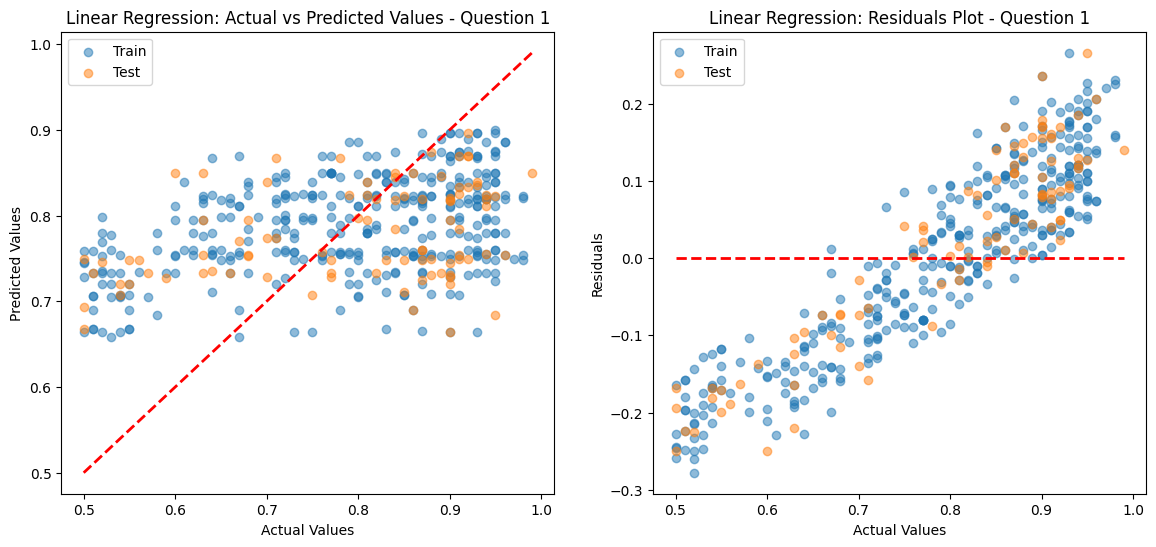

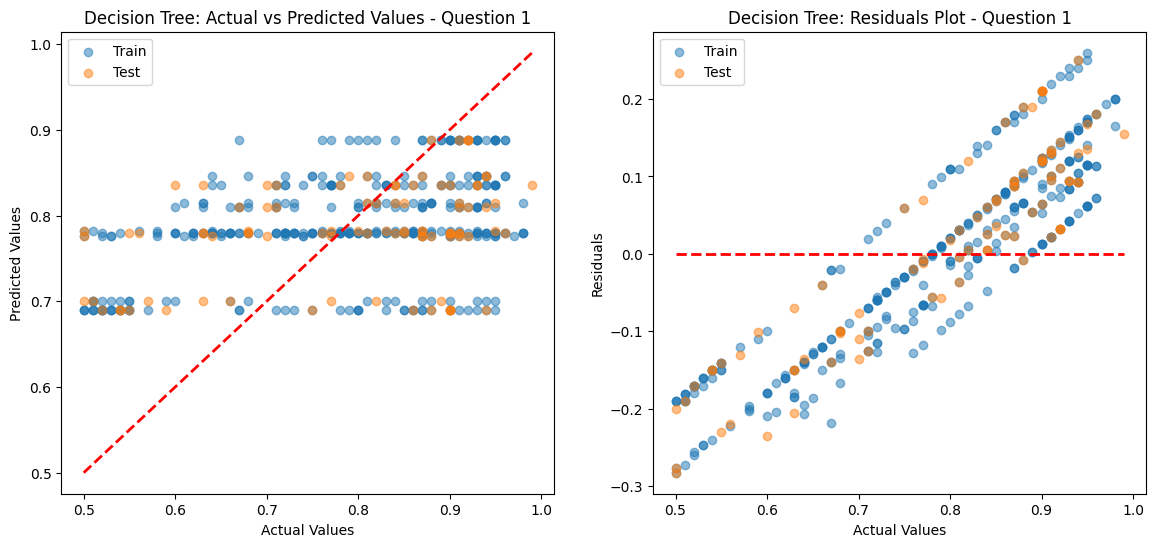

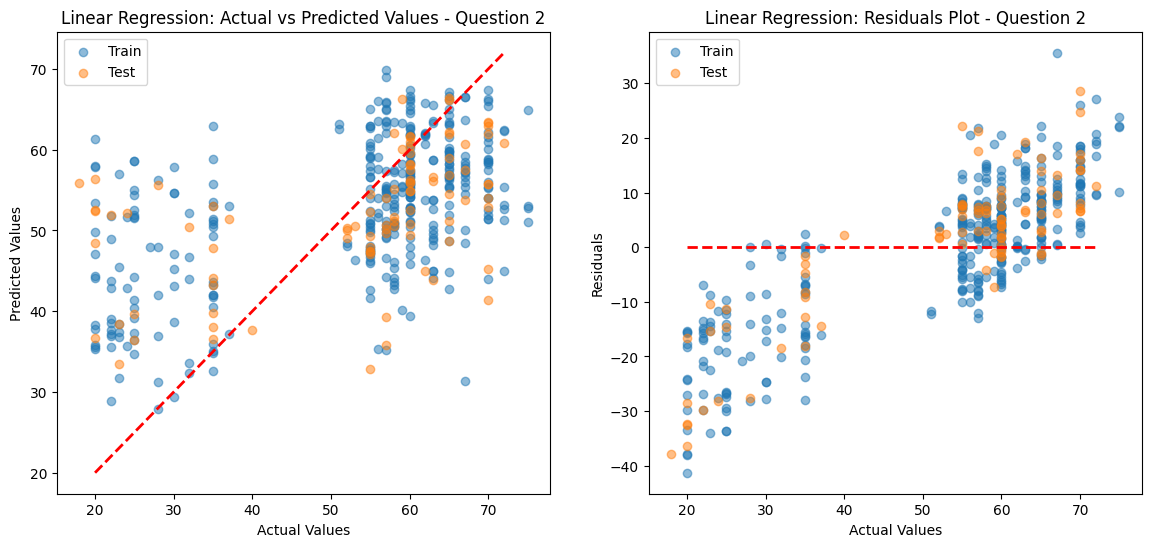

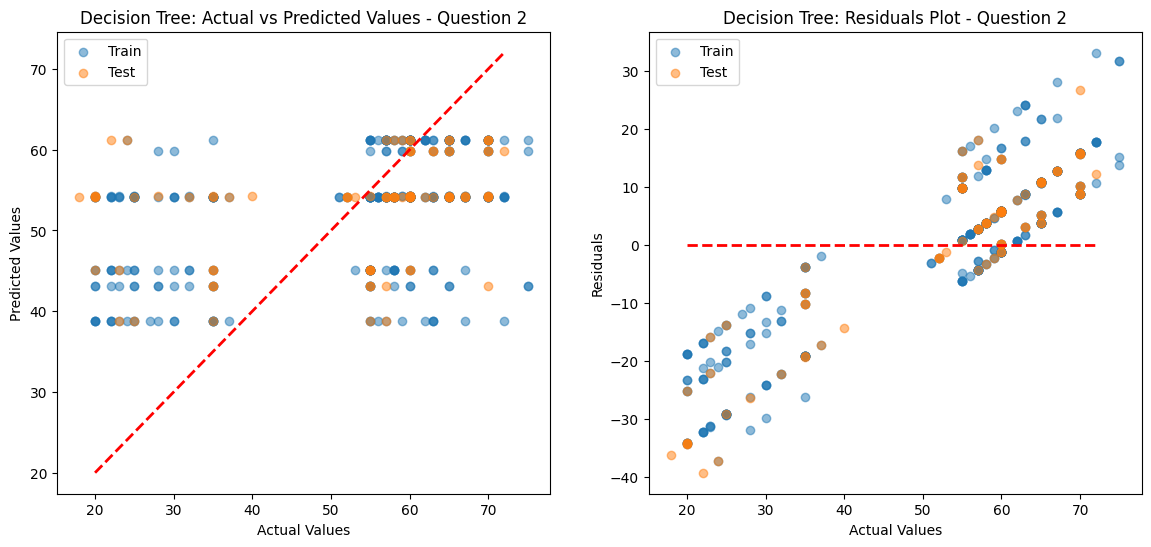

In [33]:
def plot_actual_vs_predicted_residuals(y_train, y_train_pred, y_test, y_test_pred, model_name, question_number):
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred

    plt.figure(figsize=(14, 6))

    # Actual vs. Predicted plot
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, label='Train', alpha=0.5)
    plt.scatter(y_test, y_test_pred, label='Test', alpha=0.5)
    plt.plot([y_train.min(), y_test.max()], [y_train.min(), y_test.max()], '--r', linewidth=2)
    plt.title(f'{model_name}: Actual vs Predicted Values - Question {question_number}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()

    # Residuals plot
    plt.subplot(1, 2, 2)
    plt.scatter(y_train, residuals_train, label='Train', alpha=0.5)
    plt.scatter(y_test, residuals_test, label='Test', alpha=0.5)
    plt.hlines(y=0, xmin=y_train.min(), xmax=y_test.max(), colors='red', linestyles='--', linewidth=2)
    plt.title(f'{model_name}: Residuals Plot - Question {question_number}')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')
    plt.legend()

    plt.show()

# Call the plotting function for both models and questions
plot_actual_vs_predicted_residuals(y1_train, y1_train_pred_lr, y1_test, y1_test_pred_lr, 'Linear Regression', 1)
plot_actual_vs_predicted_residuals(y1_train, y1_train_pred_dt, y1_test, y1_test_pred_dt, 'Decision Tree', 1)
plot_actual_vs_predicted_residuals(y2_train, y2_train_pred_lr, y2_test, y2_test_pred_lr, 'Linear Regression', 2)
plot_actual_vs_predicted_residuals(y2_train, y2_train_pred_dt, y2_test, y2_test_pred_dt, 'Decision Tree', 2)

In [34]:
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:       Sleep efficiency   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     4.829
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           1.55e-08
Time:                        17:26:36   Log-Likelihood:                 245.81
No. Observations:                 361   AIC:                            -459.6
Df Residuals:                     345   BIC:                            -397.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8187      0.049     16.621      0.0

In [35]:
feature_names1 = preprocessor1.named_transformers_['cat'].get_feature_names_out(categorical_features1)
for i in range(len(feature_names1)):
    feature_names1[i] = f'x{i+1}--'+feature_names1[i]
new_feature_names1 = np.insert(feature_names1, 0, 'const')
coef_dict1 = dict(zip(new_feature_names1, ols1.params))
coef_dict1

{'const': 0.8186890746262985,
 'x1--Sleep duration_5.5': 0.012164442230998107,
 'x2--Sleep duration_6.0': -0.06294253764957823,
 'x3--Sleep duration_7.0': -0.06466928271905556,
 'x4--Sleep duration_7.5': -0.04875761972371141,
 'x5--Sleep duration_8.0': -0.03874564019865239,
 'x6--Sleep duration_8.5': -0.02067382502212222,
 'x7--Sleep duration_9.0': -0.07000166856154588,
 'x8--Sleep duration_10.0': -0.04264408839901637,
 'x9--Exercise frequency_1': 0.04084921980320405,
 'x10--Exercise frequency_2': 0.06491065120856883,
 'x11--Exercise frequency_3': 0.06560562378299588,
 'x12--Exercise frequency_4': 0.11587552376782981,
 'x13--Exercise frequency_5': 0.06327793164713624,
 'x14--Smoking status_Yes': -0.09015922880339358,
 'x15--Gender_Male': 0.003997684816168884}

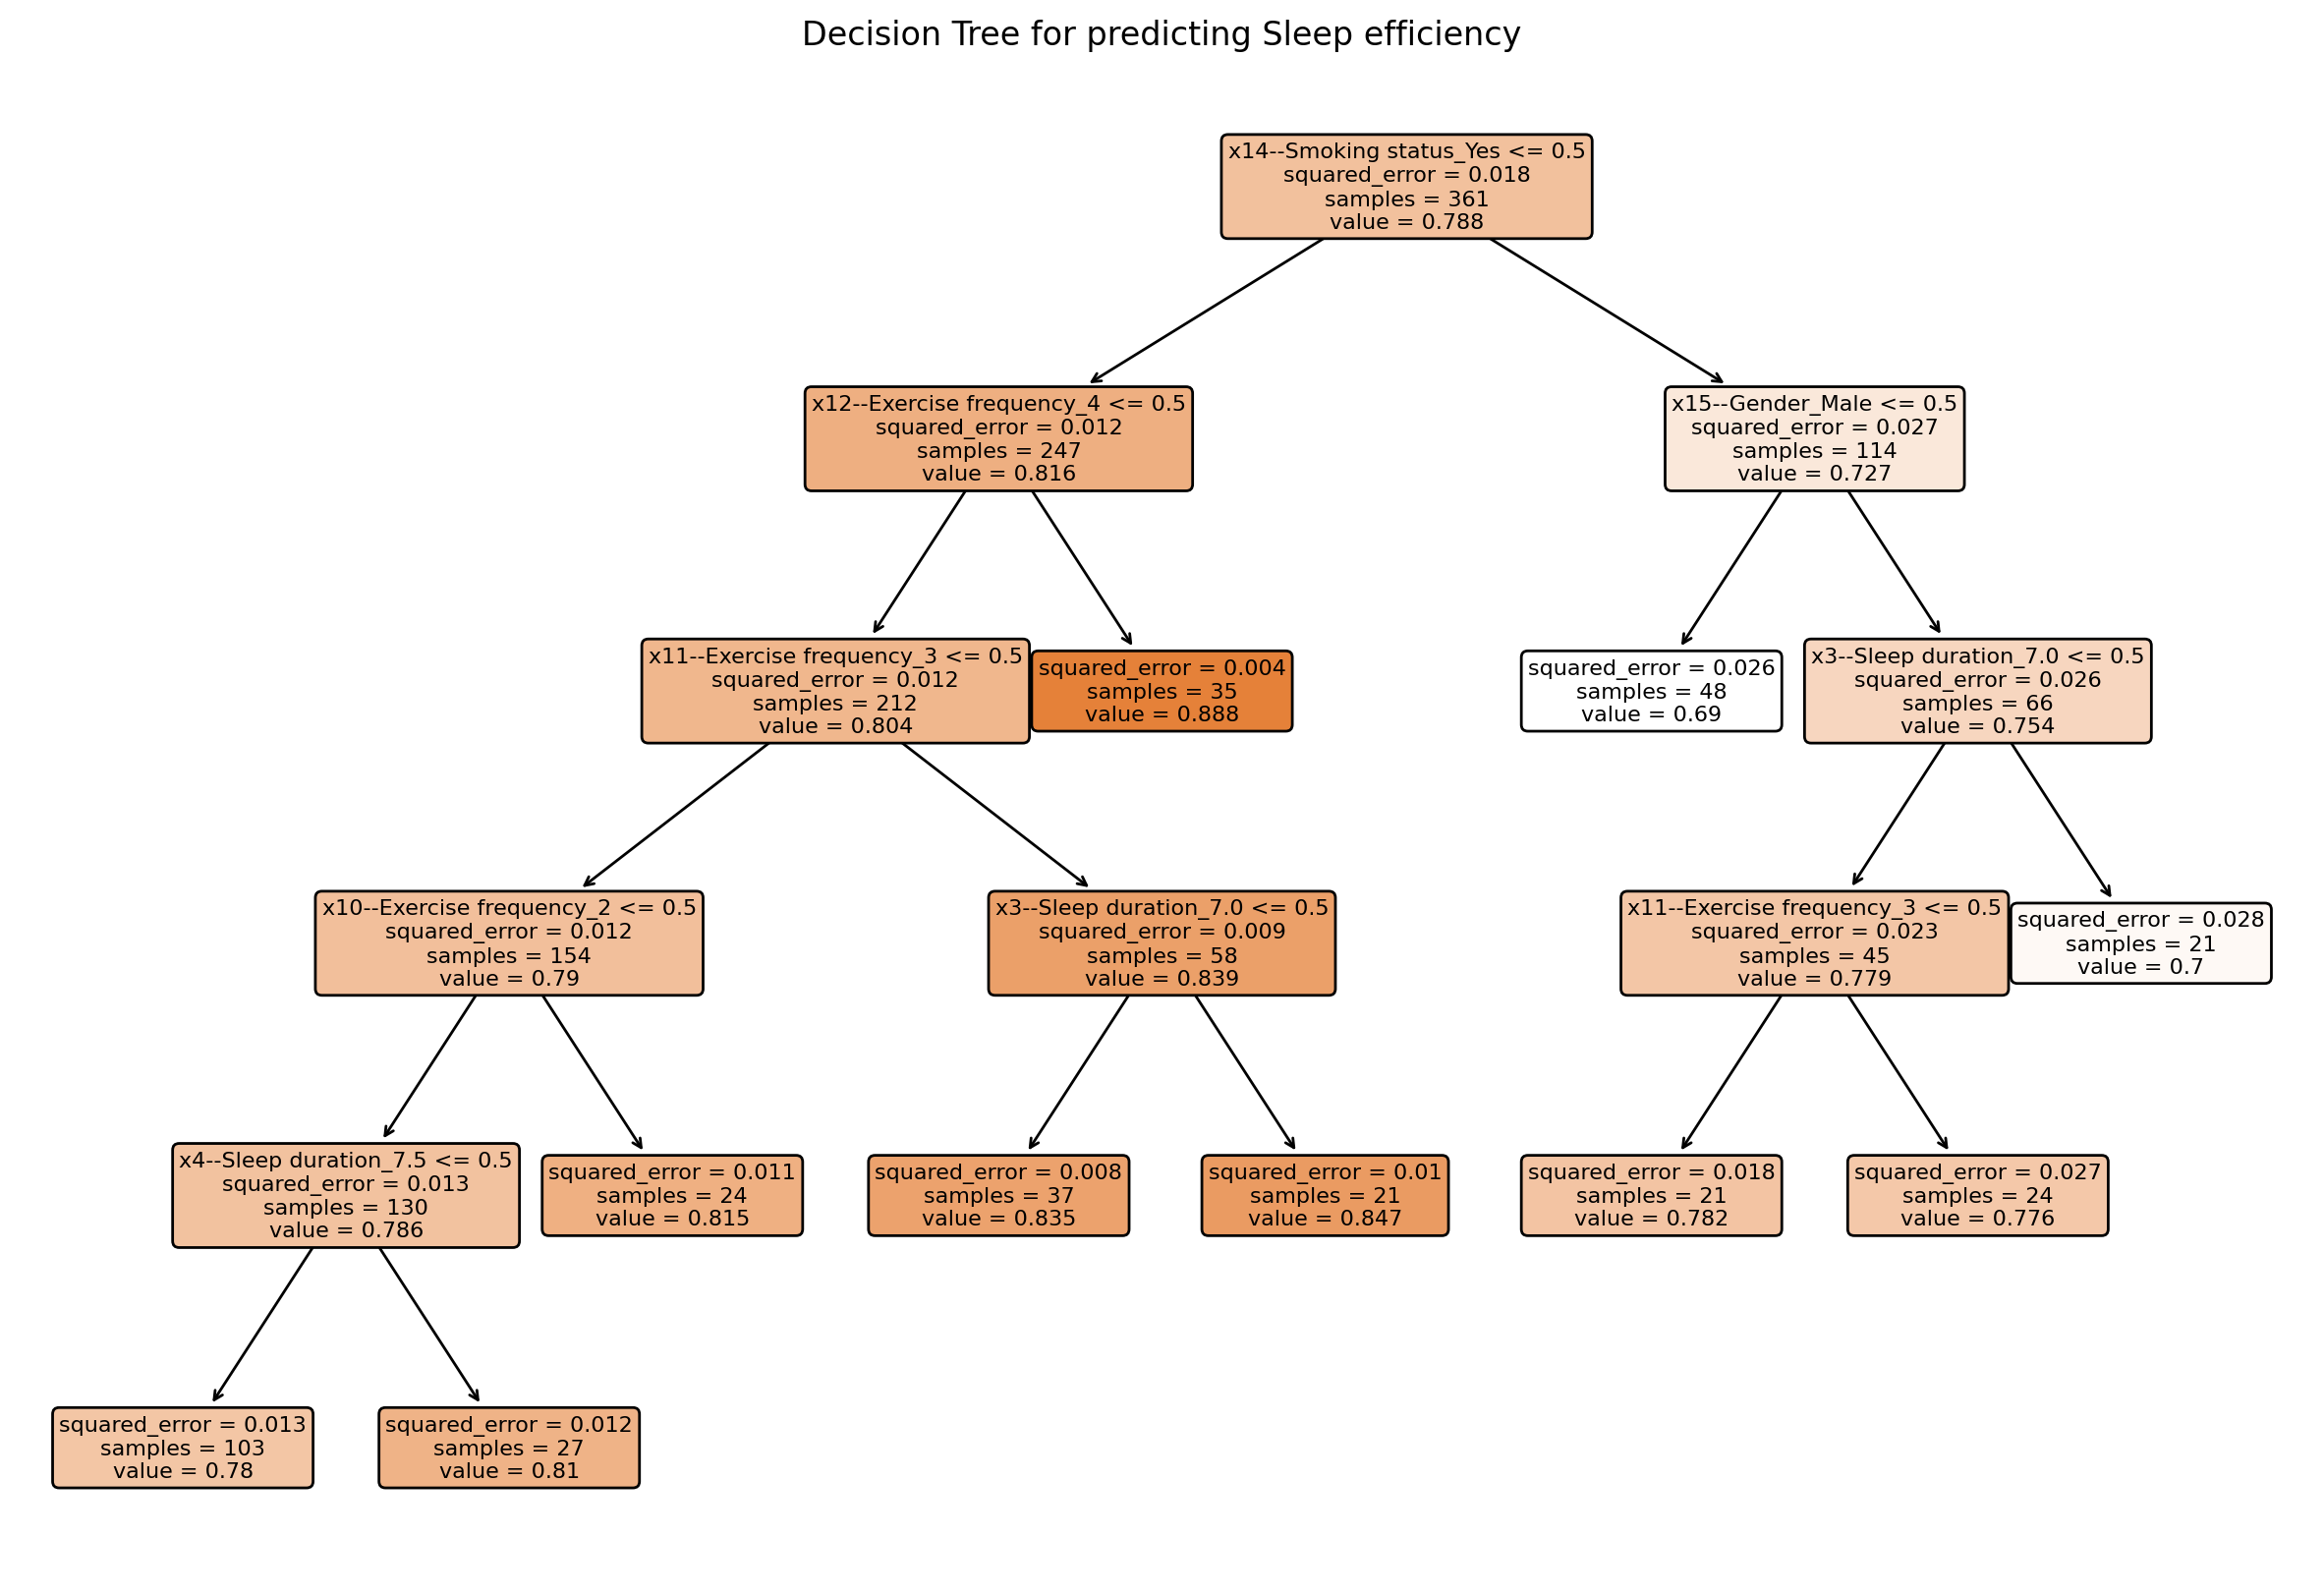

In [46]:
plt.figure(figsize=(15, 10), dpi=200)
plot_tree(dt1['regressor'], feature_names=feature_names1, filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree for predicting Sleep efficiency")
plt.show()

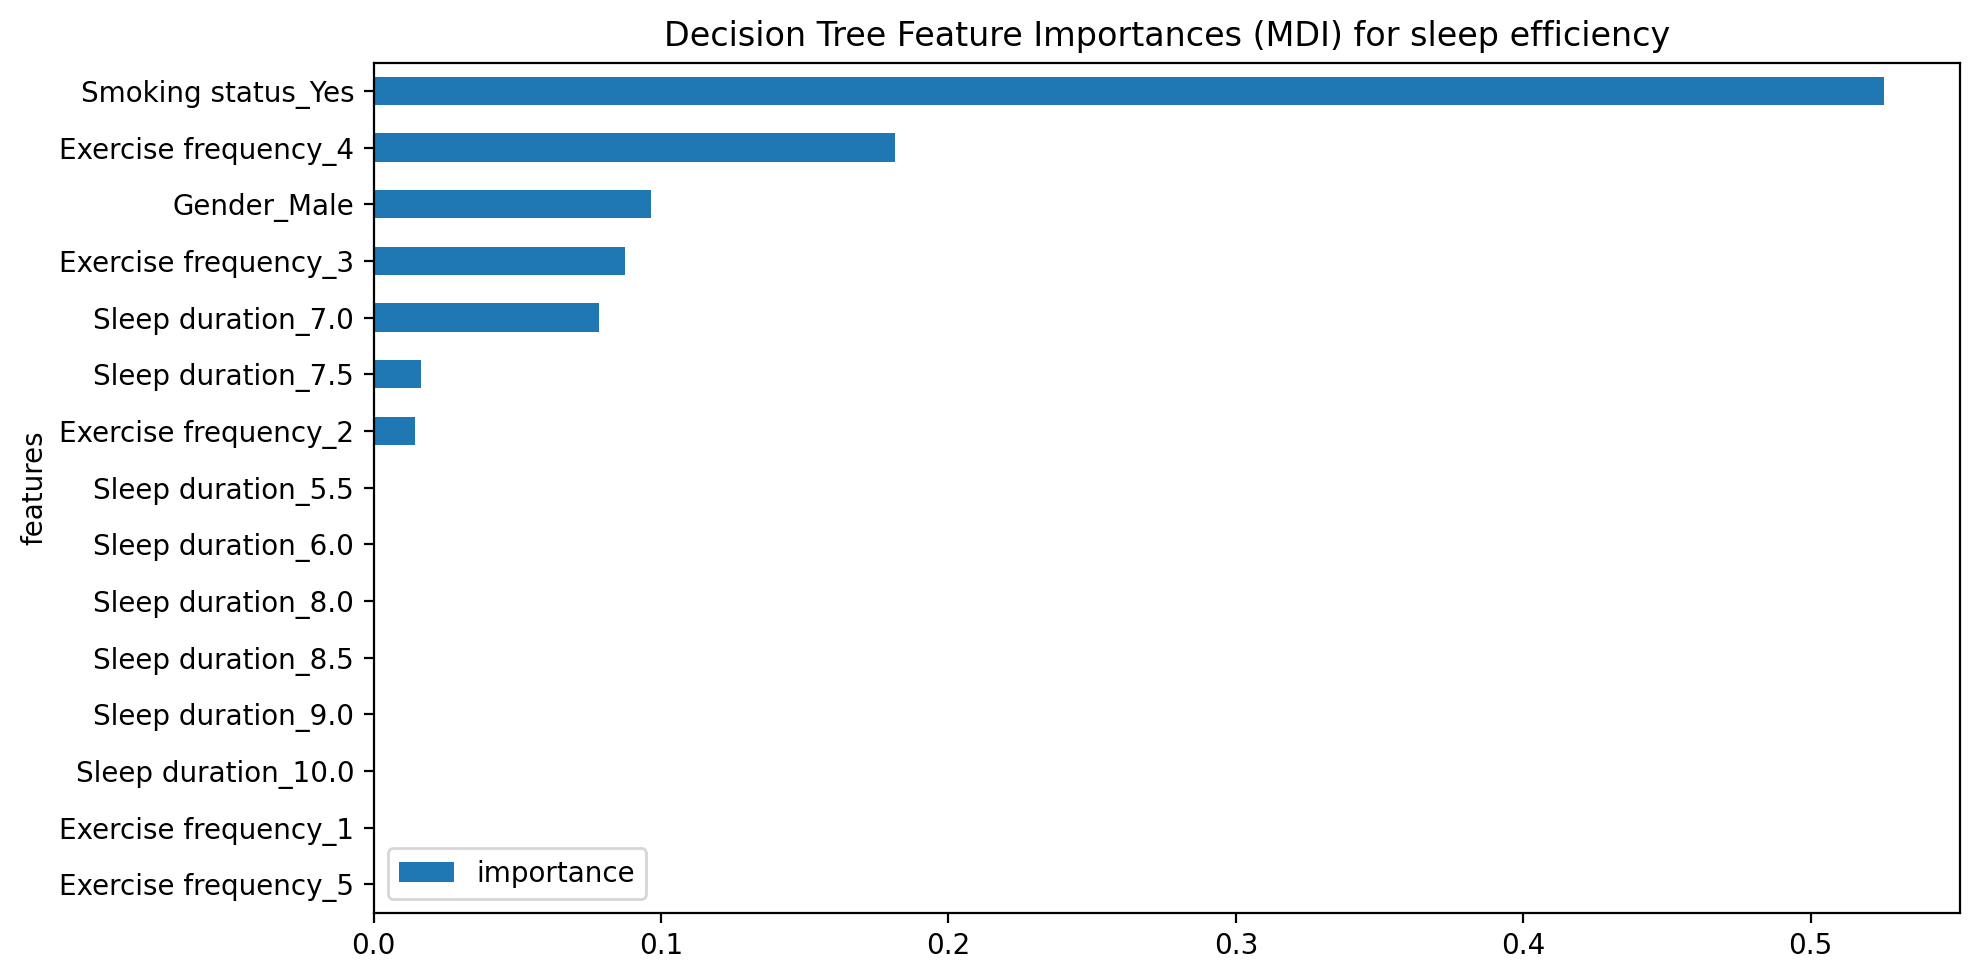

In [72]:
dt_importances = pd.DataFrame({'importance': dt1['regressor'].feature_importances_, 
                               'features': preprocessor1.named_transformers_['cat'].get_feature_names_out(categorical_features1)})
dt_importances = dt_importances.sort_values(by='importance', ascending=False)

# Plot feature importances
f, ax = plt.subplots(figsize=(10, 5), dpi=200)
dt_importances.plot.barh(x='features', y='importance', ax=ax)
plt.gca().invert_yaxis()
plt.title(f'Decision Tree Feature Importances (MDI) for sleep efficiency')
plt.tight_layout()
plt.show()

In [73]:
print(ols2.summary())

                              OLS Regression Results                             
Dep. Variable:     Deep sleep percentage   R-squared:                       0.306
Model:                               OLS   Adj. R-squared:                  0.272
Method:                    Least Squares   F-statistic:                     8.903
Date:                   Sun, 21 Apr 2024   Prob (F-statistic):           4.51e-19
Time:                           17:56:19   Log-Likelihood:                -1438.9
No. Observations:                    361   AIC:                             2914.
Df Residuals:                        343   BIC:                             2984.
Df Model:                             17                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.8391 

In [78]:
feature_names2 = preprocessor2.named_transformers_['cat'].get_feature_names_out(categorical_features2)
feature_names2 = np.append(feature_names2, preprocessor2.named_transformers_['num'].get_feature_names_out(numerical_features2))

for i in range(len(feature_names2)):
    feature_names2[i] = f'x{i+1}--'+feature_names2[i]
new_feature_names2 = np.insert(feature_names2, 0, 'const')
coef_dict2 = dict(zip(new_feature_names2, ols2.params))
coef_dict2

{'const': 55.83909868064489,
 'x1--Caffeine consumption_25': -5.388506187606215,
 'x2--Caffeine consumption_50': 3.655390024874709,
 'x3--Caffeine consumption_75': -2.931583481957632,
 'x4--Caffeine consumption_100': 0.37270845148542975,
 'x5--Caffeine consumption_200': 3.4265975828157202,
 'x6--Alcohol consumption_1': 1.6190468234012911,
 'x7--Alcohol consumption_2': 0.8682150114143354,
 'x8--Alcohol consumption_3': -15.998500766761477,
 'x9--Alcohol consumption_4': -11.423699639559743,
 'x10--Alcohol consumption_5': -10.032783762839808,
 'x11--Smoking status_Yes': -11.671992495483977,
 'x12--Exercise frequency_1': -6.8599800655341205,
 'x13--Exercise frequency_2': 6.6013551309606795,
 'x14--Exercise frequency_3': 9.626889894801728,
 'x15--Exercise frequency_4': 7.119919613352339,
 'x16--Exercise frequency_5': 11.009581288378495,
 'x17--Daily Steps': -1.1162918476320023}

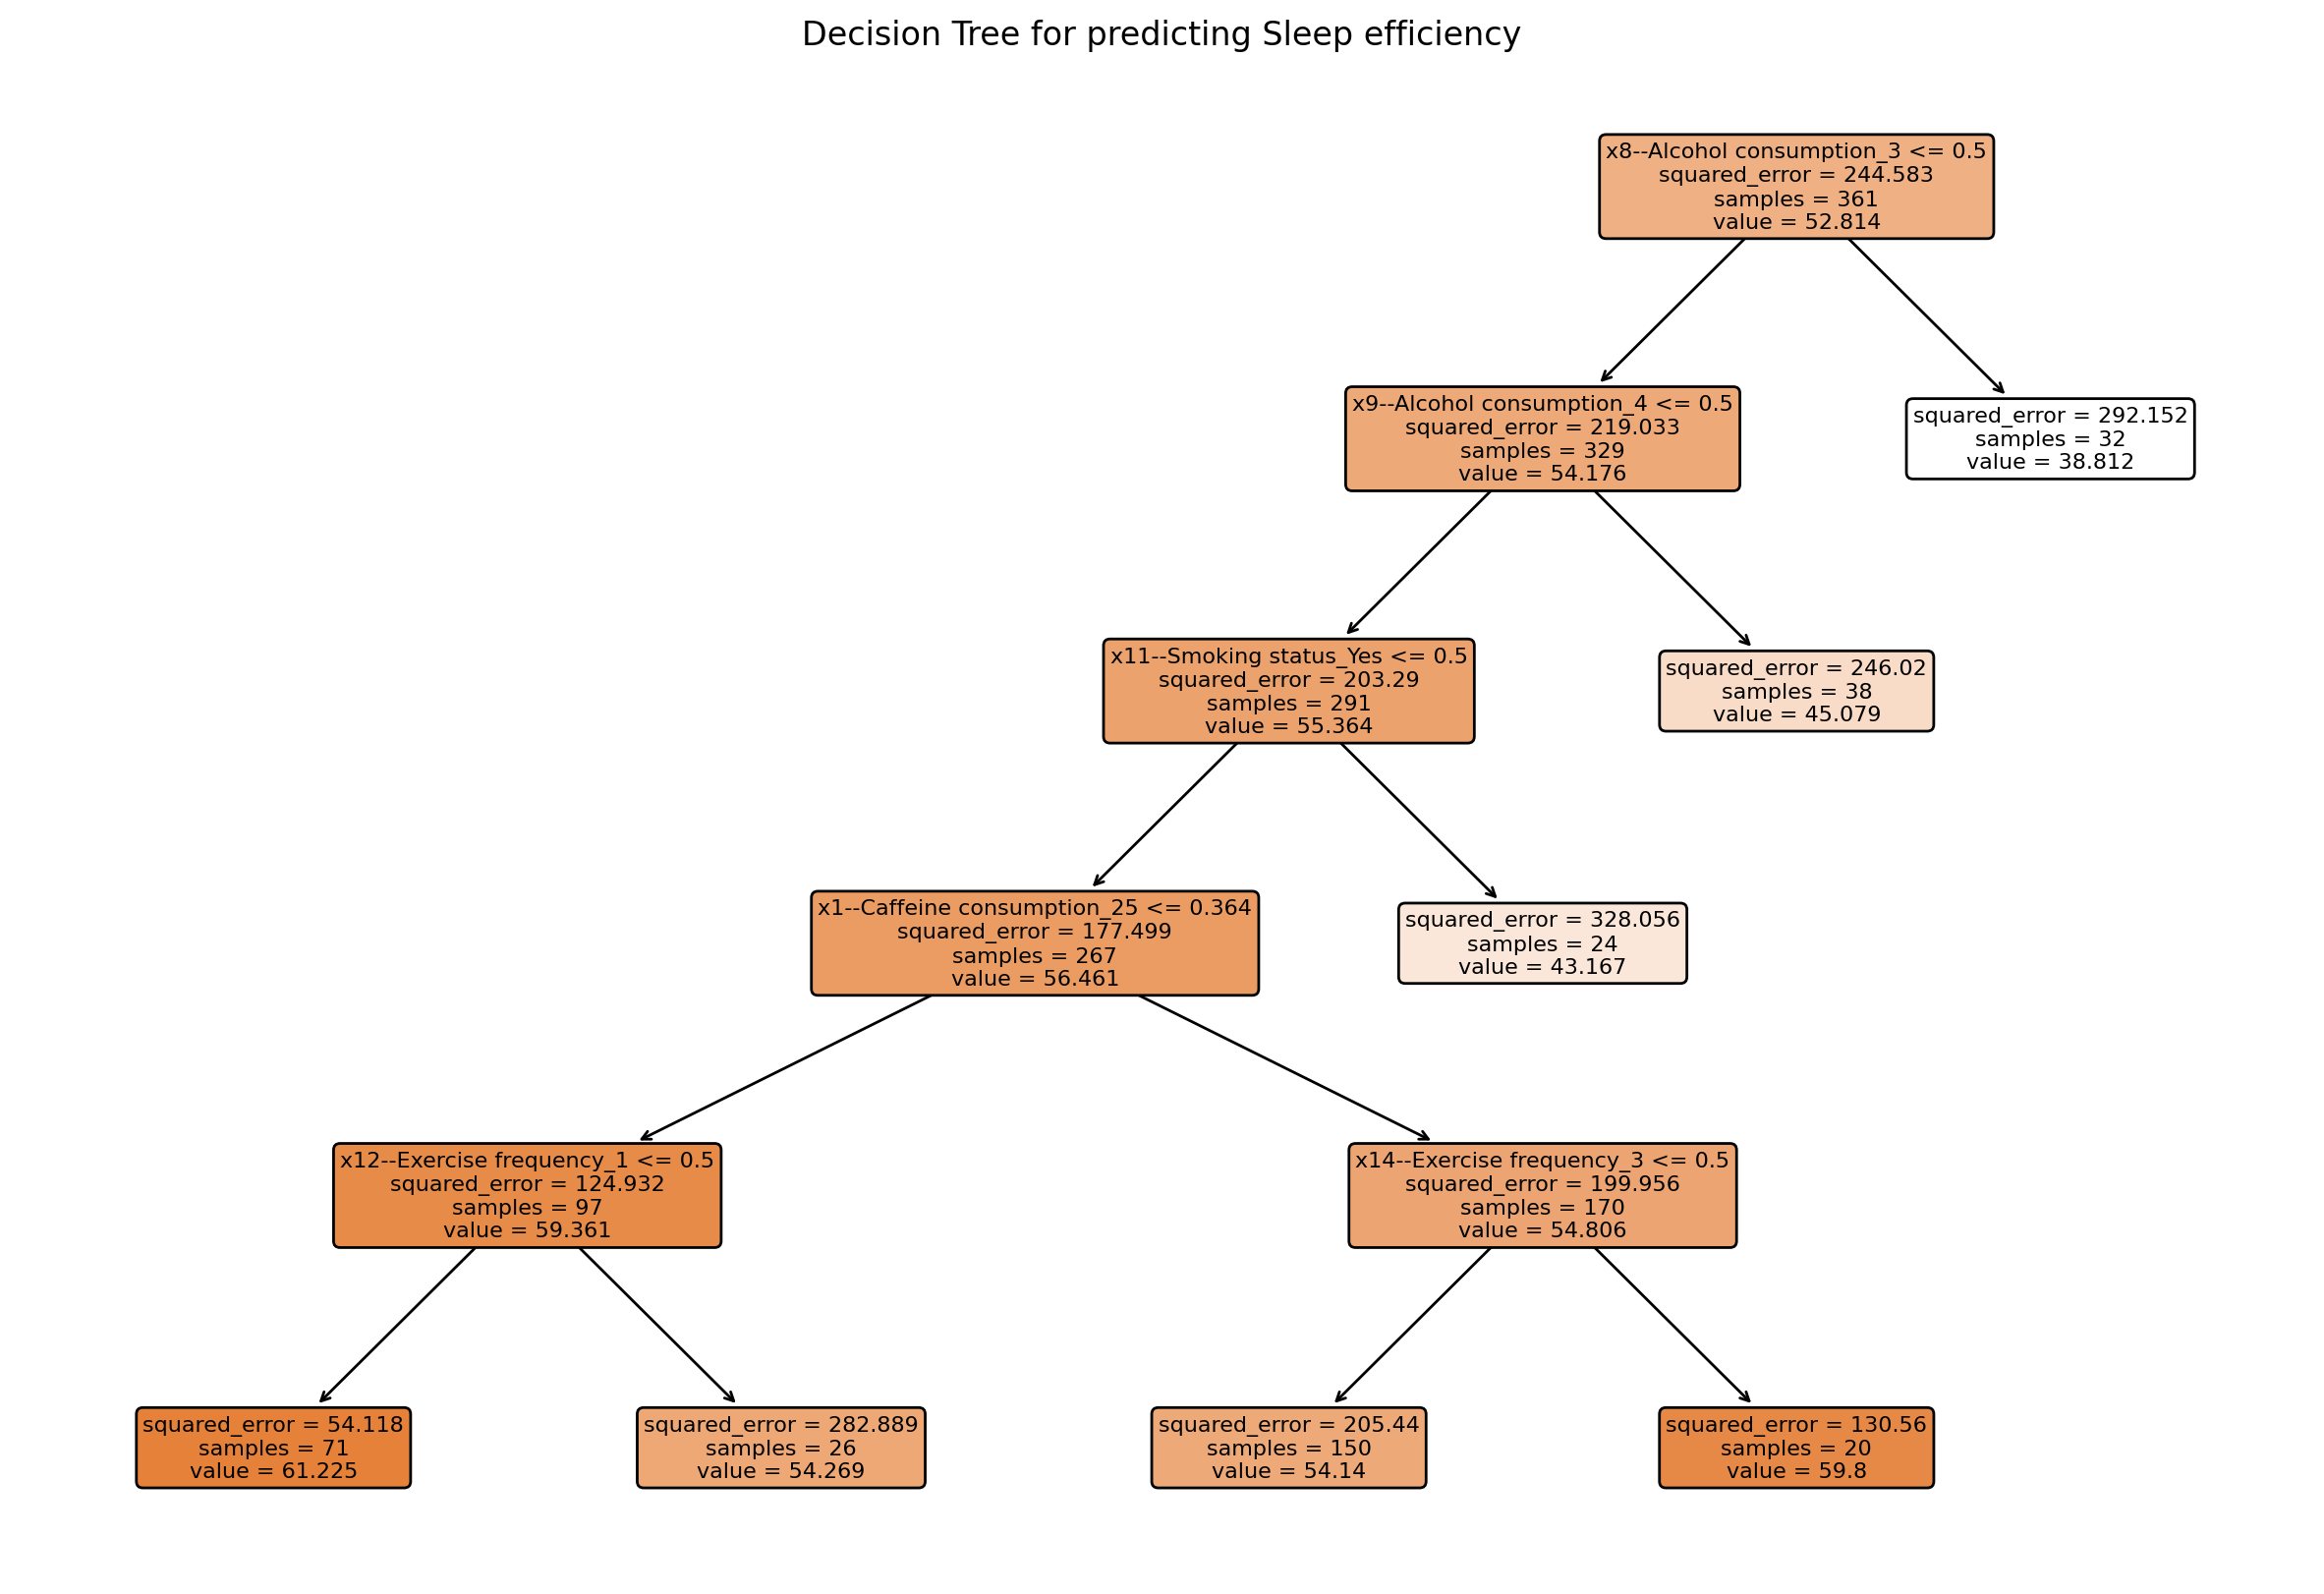

In [79]:
plt.figure(figsize=(15, 10), dpi=200)
plot_tree(dt2['regressor'], feature_names=feature_names2, filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree for predicting Sleep efficiency")
plt.show()

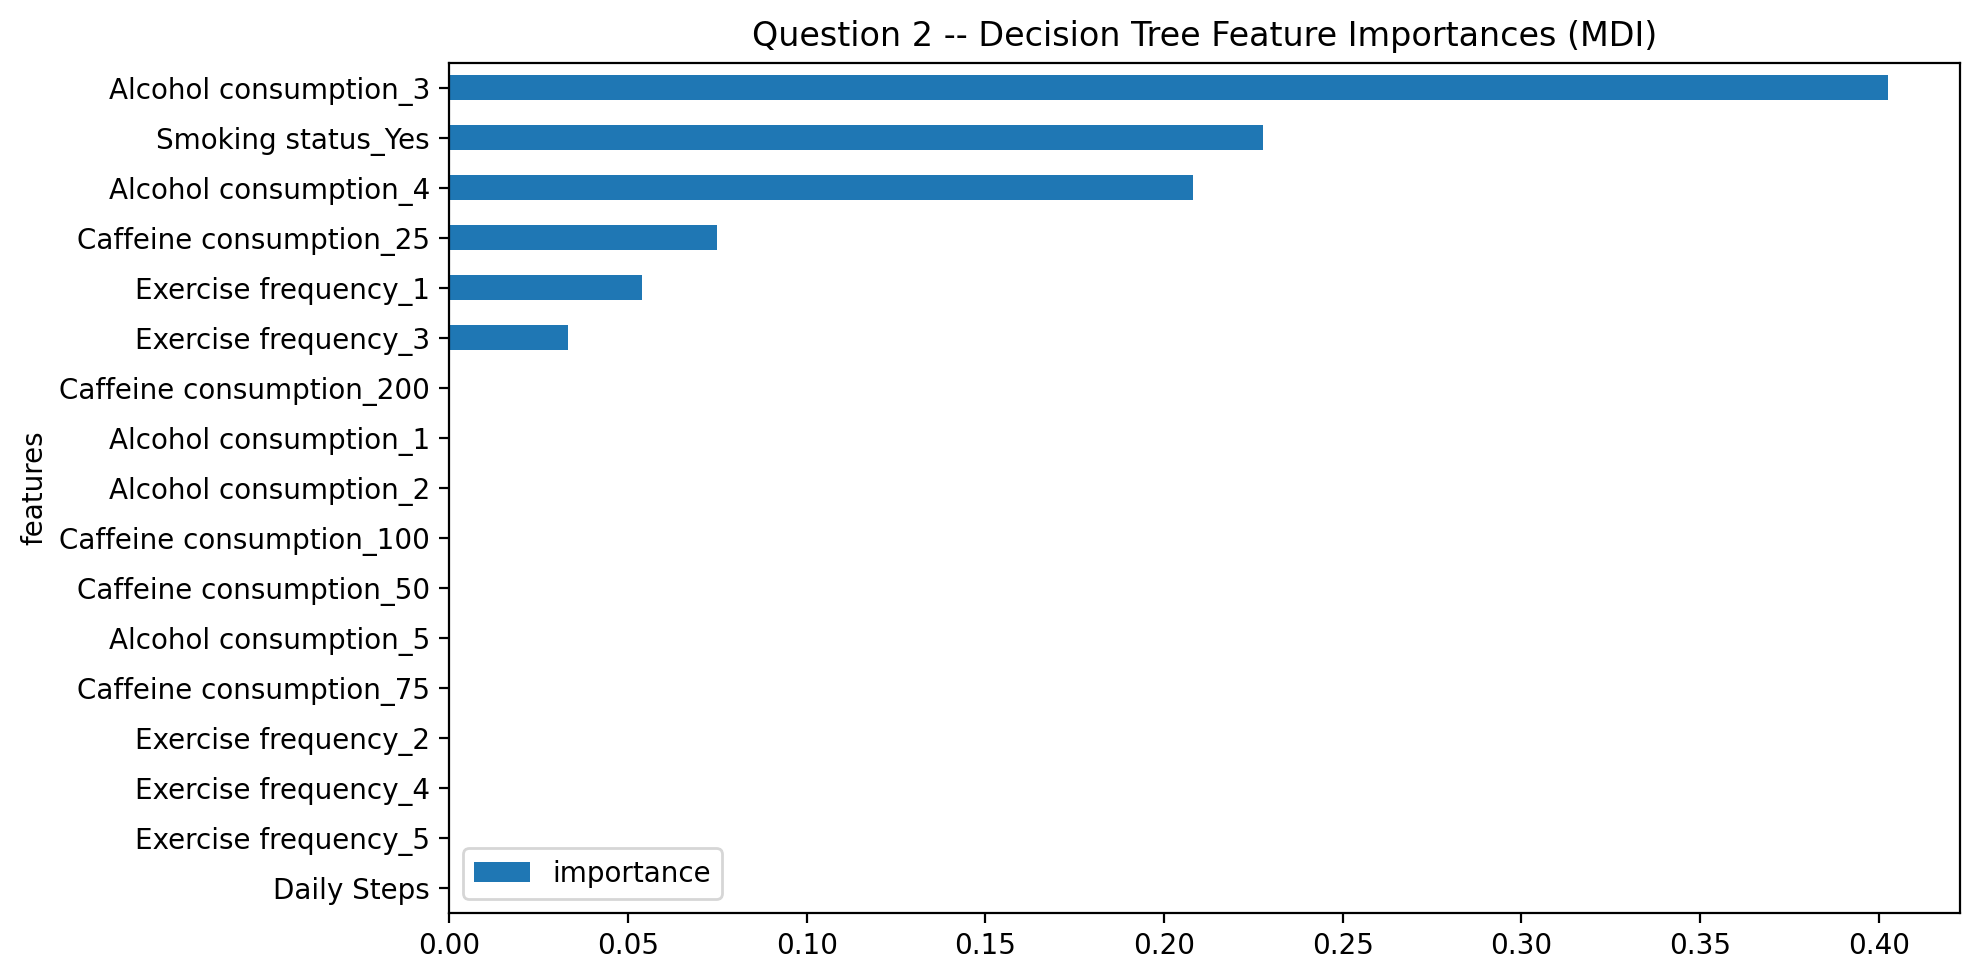

In [82]:
feature_names2 = preprocessor2.named_transformers_['cat'].get_feature_names_out(categorical_features2)
feature_names2 = np.append(feature_names2, preprocessor2.named_transformers_['num'].get_feature_names_out(numerical_features2))

dt_importances = pd.DataFrame({'importance': dt2['regressor'].feature_importances_, 
                               'features': feature_names2})
dt_importances = dt_importances.sort_values(by='importance', ascending=False)

# Plot feature importances
f, ax = plt.subplots(figsize=(10, 5), dpi=200)
dt_importances.plot.barh(x='features', y='importance', ax=ax)
plt.gca().invert_yaxis()
plt.title(f'Question 2 -- Decision Tree Feature Importances (MDI)')
plt.tight_layout()
plt.show()